# Limpeza dos dados

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df_selic = pd.read_csv("./SELIC.csv")
df_selic.head()

Data selic_meta
0  01.04.2013       7,25
1  02.04.2013       7,25
2  03.04.2013       7,25
3  04.04.2013       7,25
4  05.04.2013       7,25

In [4]:
df_selic["Data"] = pd.to_datetime(df_selic["Data"], format="%d.%m.%Y")
df_selic.set_index("Data", inplace=True)
df_selic.head()

selic_meta
Data                 
2013-04-01       7,25
2013-04-02       7,25
2013-04-03       7,25
2013-04-04       7,25
2013-04-05       7,25

In [5]:
df_selic["selic_meta"] = df_selic["selic_meta"].str.replace(".", "").str.replace(",", ".").astype(float)
df_selic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4226 entries, 2013-04-01 to 2024-10-25
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   selic_meta  4226 non-null   float64
dtypes: float64(1)
memory usage: 66.0 KB


In [6]:
df_bbrc = pd.read_csv("./BBRC11 Dados Históricos.csv")
df_bbrc.head()

Data  Último Abertura  Máxima  Mínima   Vol.    Var%
0  01.04.2013  107,20   107,15  107,20  107,15  0,23K  -1,24%
1  02.04.2013  107,58   109,48  109,48  106,61  1,10K   0,35%
2  03.04.2013  107,09   107,09  107,09  106,61  1,49K  -0,46%
3  04.04.2013  106,61   107,09  108,54  106,61  1,34K  -0,45%
4  05.04.2013  105,74   106,71  106,71  105,64  4,83K  -0,82%

In [7]:
df_bbrc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2871 entries, 0 to 2870
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      2871 non-null   object
 1   Último    2871 non-null   object
 2   Abertura  2871 non-null   object
 3   Máxima    2871 non-null   object
 4   Mínima    2871 non-null   object
 5   Vol.      2866 non-null   object
 6   Var%      2871 non-null   object
dtypes: object(7)
memory usage: 157.1+ KB


In [8]:
df_bbrc.columns = ["Data", "Ultimo", "Abertura", "Max", "Min", "Vol", "Var"]

In [9]:
df_bbrc.columns

Index(['Data', 'Ultimo', 'Abertura', 'Max', 'Min', 'Vol', 'Var'], dtype='object')

In [10]:
df_bbrc["Data"] = pd.to_datetime(df_bbrc["Data"], format="%d.%m.%Y")
df_bbrc.set_index("Data", inplace=True)
df_bbrc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ultimo    2871 non-null   object
 1   Abertura  2871 non-null   object
 2   Max       2871 non-null   object
 3   Min       2871 non-null   object
 4   Vol       2866 non-null   object
 5   Var       2871 non-null   object
dtypes: object(6)
memory usage: 157.0+ KB


In [11]:
df_bbrc.head()

Ultimo Abertura     Max     Min    Vol     Var
Data                                                      
2013-04-01  107,20   107,15  107,20  107,15  0,23K  -1,24%
2013-04-02  107,58   109,48  109,48  106,61  1,10K   0,35%
2013-04-03  107,09   107,09  107,09  106,61  1,49K  -0,46%
2013-04-04  106,61   107,09  108,54  106,61  1,34K  -0,45%
2013-04-05  105,74   106,71  106,71  105,64  4,83K  -0,82%

In [12]:
for coluna in ["Ultimo", "Abertura", "Max", "Min"]:
    df_bbrc[coluna] = df_bbrc[coluna].str.replace(".", "").str.replace(",", ".").astype(float)

df_bbrc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2871 non-null   float64
 1   Abertura  2871 non-null   float64
 2   Max       2871 non-null   float64
 3   Min       2871 non-null   float64
 4   Vol       2866 non-null   object 
 5   Var       2871 non-null   object 
dtypes: float64(4), object(2)
memory usage: 157.0+ KB


In [13]:
df_bbrc.head()

Ultimo  Abertura     Max     Min    Vol     Var
Data                                                       
2013-04-01  107.20    107.15  107.20  107.15  0,23K  -1,24%
2013-04-02  107.58    109.48  109.48  106.61  1,10K   0,35%
2013-04-03  107.09    107.09  107.09  106.61  1,49K  -0,46%
2013-04-04  106.61    107.09  108.54  106.61  1,34K  -0,45%
2013-04-05  105.74    106.71  106.71  105.64  4,83K  -0,82%

In [14]:
df_bbrc["Vol"] = df_bbrc["Vol"].apply(lambda x: pd.eval(x.replace(",", ".").replace("K", "*1e3").replace("M", "*1e6")) if pd.notnull(x) else None)
df_bbrc["Vol"] = df_bbrc["Vol"].fillna(df_bbrc["Vol"].rolling(window=5, min_periods=1).mean())
df_bbrc.head()

Ultimo  Abertura     Max     Min     Vol     Var
Data                                                        
2013-04-01  107.20    107.15  107.20  107.15   230.0  -1,24%
2013-04-02  107.58    109.48  109.48  106.61  1100.0   0,35%
2013-04-03  107.09    107.09  107.09  106.61  1490.0  -0,46%
2013-04-04  106.61    107.09  108.54  106.61  1340.0  -0,45%
2013-04-05  105.74    106.71  106.71  105.64  4830.0  -0,82%

In [15]:
df_bbrc["Var"] = df_bbrc["Var"].str.replace("%", "").str.replace(".", "").str.replace(",", ".").astype(float) / 100
df_bbrc.head()

Ultimo  Abertura     Max     Min     Vol     Var
Data                                                        
2013-04-01  107.20    107.15  107.20  107.15   230.0 -0.0124
2013-04-02  107.58    109.48  109.48  106.61  1100.0  0.0035
2013-04-03  107.09    107.09  107.09  106.61  1490.0 -0.0046
2013-04-04  106.61    107.09  108.54  106.61  1340.0 -0.0045
2013-04-05  105.74    106.71  106.71  105.64  4830.0 -0.0082

In [16]:
df_bbrc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2871 non-null   float64
 1   Abertura  2871 non-null   float64
 2   Max       2871 non-null   float64
 3   Min       2871 non-null   float64
 4   Vol       2871 non-null   float64
 5   Var       2871 non-null   float64
dtypes: float64(6)
memory usage: 157.0 KB


In [17]:
df_bbrc.describe()

Ultimo     Abertura          Max          Min           Vol  \
count  2871.000000  2871.000000  2871.000000  2871.000000   2871.000000   
mean    104.255214   104.270003   105.029815   103.399269   1238.426506   
std      20.542757    20.535302    20.610453    20.393947   1266.323224   
min      60.700000    61.580000    62.240000    60.700000      0.000000   
25%      86.515000    86.590000    87.405000    85.960000    510.000000   
50%     102.260000   102.270000   103.000000   101.400000    910.000000   
75%     121.355000   121.195000   122.200000   119.985000   1530.000000   
max     161.800000   161.800000   162.990000   159.100000  23110.000000   

               Var  
count  2871.000000  
mean     -0.000142  
std       0.023998  
min      -0.991600  
25%      -0.004600  
50%       0.000000  
75%       0.004700  
max       0.184100

In [18]:
def limpar_dados(data_frame):
    data_frame.columns = ["Data", "Ultimo", "Abertura", "Max", "Min", "Vol", "Var"]
    data_frame["Data"] = pd.to_datetime(data_frame["Data"], format="%d.%m.%Y")
    data_frame.set_index("Data", inplace=True)
    for coluna in ["Ultimo", "Abertura", "Max", "Min"]:
        data_frame[coluna] = data_frame[coluna].str.replace(".", "").str.replace(",", ".").astype(float)
    data_frame["Vol"] = data_frame["Vol"].apply(lambda x: pd.eval(x.replace(",", ".").replace("K", "*1e3").replace("M", "*1e6")) if pd.notnull(x) else None)
    data_frame["Vol"] = data_frame["Vol"].fillna(data_frame["Vol"].rolling(window=5, min_periods=1).mean())
    data_frame["Var"] = data_frame["Var"].str.replace("%", "").str.replace(".", "").str.replace(",", ".").astype(float) / 100
    return data_frame

In [19]:
df_bova = pd.read_csv("./BOVA11 - Histórico.csv")
df_bova.head()

Data Último Abertura Máxima Mínima     Vol.    Var%
0  01.04.2013  54,80    54,90  55,21  54,79  775,66K  -0,54%
1  02.04.2013  53,75    54,92  55,05  53,73    1,05M  -1,92%
2  03.04.2013  54,45    53,80  54,45  53,65    1,22M   1,30%
3  04.04.2013  53,50    54,46  54,46  53,33    2,74M  -1,74%
4  05.04.2013  54,08    53,01  54,14  52,79    2,64M   1,08%

In [20]:
df_bova = limpar_dados(df_bova)
df_bova.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2878 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2878 non-null   float64
 1   Abertura  2878 non-null   float64
 2   Max       2878 non-null   float64
 3   Min       2878 non-null   float64
 4   Vol       2878 non-null   float64
 5   Var       2878 non-null   float64
dtypes: float64(6)
memory usage: 157.4 KB


In [21]:
df_bova.describe()

Ultimo     Abertura          Max          Min           Vol  \
count  2878.000000  2878.000000  2878.000000  2878.000000  2.878000e+03   
mean     82.867790    82.908026    83.573798    82.168885  4.975614e+06   
std      27.441019    27.437748    27.555482    27.307514  3.872774e+06   
min      36.450000    36.320000    36.610000    36.010000  3.635500e+05   
25%      54.152500    54.247500    54.722500    53.672500  2.270000e+06   
50%      83.210000    83.540000    84.205000    82.550000  4.030000e+06   
75%     107.530000   107.600000   108.625000   106.685000  6.597500e+06   
max     133.620000   133.290000   133.780000   132.930000  4.590000e+07   

               Var  
count  2878.000000  
mean      0.000408  
std       0.015351  
min      -0.145700  
25%      -0.007700  
50%       0.000700  
75%       0.008900  
max       0.134000

In [22]:
df_rbvo = pd.read_csv("./RBVO11 Dados Históricos.csv")
df_rbvo.head()

Data Último Abertura Máxima Mínima   Vol.    Var%
0  01.04.2013  87,79    87,87  87,96  87,79  1,71K  -0,49%
1  02.04.2013  88,05    88,62  88,62  88,04  0,13K   0,30%
2  03.04.2013  87,44    86,95  88,22  86,95  0,09K  -0,69%
3  04.04.2013  87,79    87,79  88,13  87,79  0,44K   0,40%
4  05.04.2013  87,40    87,96  87,96  86,05  0,99K  -0,44%

In [23]:
df_rbvo = limpar_dados(df_rbvo)
df_rbvo.head()

Ultimo  Abertura    Max    Min     Vol     Var
Data                                                      
2013-04-01   87.79     87.87  87.96  87.79  1710.0 -0.0049
2013-04-02   88.05     88.62  88.62  88.04   130.0  0.0030
2013-04-03   87.44     86.95  88.22  86.95    90.0 -0.0069
2013-04-04   87.79     87.79  88.13  87.79   440.0  0.0040
2013-04-05   87.40     87.96  87.96  86.05   990.0 -0.0044

In [24]:
df_rbvo.describe()

Ultimo     Abertura         Max          Min           Vol  \
count  2695.000000  2695.000000  2695.00000  2695.000000   2695.000000   
mean     39.502223    39.524004    39.84964    39.122197   1267.030612   
std      29.456825    29.458841    29.57069    29.337406   3675.536273   
min       4.150000     4.150000     4.33000     4.010000      0.000000   
25%      10.175000    10.210000    10.36500     9.935000    120.000000   
50%      42.190000    42.240000    42.50000    41.970000    300.000000   
75%      69.405000    69.510000    69.88000    69.000000    780.000000   
max      93.610000    93.610000    95.19000    93.610000  51420.000000   

               Var  
count  2695.000000  
mean      0.000175  
std       0.049144  
min      -0.492300  
25%      -0.009200  
50%       0.000000  
75%       0.008400  
max       0.904100

In [25]:
df_abcp = pd.read_csv("./ABCP11 Dados Históricos.csv")
df_abcp.head()

Data Último Abertura Máxima Mínima   Vol.    Var%
0  01.04.2013  33,14    33,14  33,14  33,14  0,20K  -0,99%
1  02.04.2013  32,84    32,84  33,47  32,84  0,03K  -0,91%
2  03.04.2013  33,47    33,44  33,47  33,44  0,04K   1,92%
3  04.04.2013  33,37    33,47  33,47  33,37  0,83K  -0,30%
4  05.04.2013  32,94    33,14  33,14  32,94  0,04K  -1,29%

In [26]:
df_abcp = limpar_dados(df_abcp)
df_abcp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2731 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2731 non-null   float64
 1   Abertura  2731 non-null   float64
 2   Max       2731 non-null   float64
 3   Min       2731 non-null   float64
 4   Vol       2731 non-null   float64
 5   Var       2731 non-null   float64
dtypes: float64(6)
memory usage: 149.4 KB


In [27]:
df_abcp.describe()

Ultimo     Abertura          Max          Min           Vol  \
count  2731.000000  2731.000000  2731.000000  2731.000000  2.731000e+03   
mean     63.603328    63.645368    64.191282    63.026294  3.066321e+03   
std      19.437672    19.415780    19.580001    19.239599  4.148104e+04   
min      28.550000    29.190000    30.130000    28.550000  0.000000e+00   
25%      47.520000    47.700000    49.575000    47.170000  1.200000e+02   
50%      64.130000    64.250000    64.760000    63.440000  8.900000e+02   
75%      74.045000    74.060000    74.510000    73.410000  2.470000e+03   
max     109.500000   110.390000   110.390000   109.000000  2.050000e+06   

               Var  
count  2731.000000  
mean      0.000571  
std       0.023110  
min      -0.322700  
25%      -0.005100  
50%       0.000000  
75%       0.006250  
max       0.231300

In [28]:
df_jsre = pd.read_csv("./JSRE11 Dados Históricos.csv")
df_jsre.head()

Data  Último Abertura  Máxima  Mínima   Vol.    Var%
0  01.04.2013  115,00   111,60  115,00  111,60  0,68K  -0,95%
1  02.04.2013  115,00   111,60  115,00  111,60  0,38K   0,00%
2  03.04.2013  112,01   115,00  115,00  112,01  0,41K  -2,60%
3  04.04.2013  112,05   112,00  112,80  112,00  0,57K   0,04%
4  05.04.2013  115,88   113,80  115,88  113,00  1,23K   3,42%

In [29]:
df_jsre = limpar_dados(df_jsre)
df_jsre.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2862 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2862 non-null   float64
 1   Abertura  2862 non-null   float64
 2   Max       2862 non-null   float64
 3   Min       2862 non-null   float64
 4   Vol       2862 non-null   float64
 5   Var       2862 non-null   float64
dtypes: float64(6)
memory usage: 156.5 KB


In [30]:
df_jsre.describe()

Ultimo     Abertura          Max          Min            Vol  \
count  2862.000000  2862.000000  2862.000000  2862.000000    2862.000000   
mean     81.993131    82.007921    82.670590    81.254752   20998.009259   
std      12.481561    12.442991    12.545851    12.355441   21213.004634   
min      53.790000    53.880000    54.180000    53.110000      10.000000   
25%      72.375000    72.445000    73.010000    71.950000    5982.500000   
50%      83.940000    83.940000    84.560000    83.300000   16255.000000   
75%      89.485000    89.427500    90.000000    88.585000   29647.500000   
max     122.040000   122.200000   124.440000   121.390000  364650.000000   

               Var  
count  2862.000000  
mean     -0.000360  
std       0.021839  
min      -0.917300  
25%      -0.005500  
50%       0.000000  
75%       0.005500  
max       0.124100

In [31]:
df_kncr = pd.read_csv("./KNCR11 Dados Históricos.csv")
df_kncr.head()

Data Último Abertura Máxima Mínima   Vol.    Var%
0  01.04.2013  97,01    95,75  97,01  95,74  5,20K   1,79%
1  02.04.2013  96,72    97,01  97,54  95,75  4,05K  -0,30%
2  03.04.2013  96,65    96,65  97,10  96,65  2,75K  -0,07%
3  04.04.2013  96,20    96,20  96,20  96,20  2,13K  -0,47%
4  05.04.2013  96,56    96,20  96,56  93,50  3,35K   0,37%

In [32]:
df_kncr = limpar_dados(df_kncr)
df_kncr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2878 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2878 non-null   float64
 1   Abertura  2878 non-null   float64
 2   Max       2878 non-null   float64
 3   Min       2878 non-null   float64
 4   Vol       2878 non-null   float64
 5   Var       2878 non-null   float64
dtypes: float64(6)
memory usage: 157.4 KB


In [33]:
df_kncr.describe()

Ultimo     Abertura          Max          Min           Vol  \
count  2878.000000  2878.000000  2878.000000  2878.000000  2.878000e+03   
mean     93.284104    93.264517    93.767436    92.667272  5.119705e+04   
std      10.645188    10.653086    10.676373    10.614263  5.512662e+04   
min      72.310000    71.520000    73.240000    57.410000  1.000000e+02   
25%      82.742500    82.700000    83.262500    82.170000  1.431500e+04   
50%      94.205000    94.220000    94.715000    93.500000  3.510500e+04   
75%     102.497500   102.440000   102.870000   102.037500  7.648000e+04   
max     117.000000   116.980000   117.400000   115.580000  1.160000e+06   

               Var  
count  2878.000000  
mean      0.000106  
std       0.012218  
min      -0.176300  
25%      -0.002900  
50%       0.000100  
75%       0.003800  
max       0.193400

In [34]:
df_knri = pd.read_csv("./KNRI11 Dados Históricos.csv")
df_knri.head()

Data  Último Abertura  Máxima  Mínima    Vol.    Var%
0  01.04.2013  174,94   170,45  180,42  170,45  11,30K   2,21%
1  02.04.2013  171,70   170,45  180,42  170,45   5,44K  -1,85%
2  03.04.2013  173,04   173,94  174,24  170,65   4,48K   0,78%
3  04.04.2013  174,34   174,44  174,44  173,05   3,51K   0,75%
4  05.04.2013  172,45   174,33  174,34  172,45   4,77K  -1,09%

In [35]:
df_knri = limpar_dados(df_knri)
df_knri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2879 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2879 non-null   float64
 1   Abertura  2879 non-null   float64
 2   Max       2879 non-null   float64
 3   Min       2879 non-null   float64
 4   Vol       2879 non-null   float64
 5   Var       2879 non-null   float64
dtypes: float64(6)
memory usage: 157.4 KB


In [36]:
df_knri.describe()

Ultimo     Abertura          Max          Min            Vol  \
count  2879.000000  2879.000000  2879.000000  2879.000000    2879.000000   
mean    135.370295   135.424019   136.433553   134.283654   21729.450330   
std      19.947930    20.002511    20.046934    19.858813   23023.538882   
min      88.600000    88.880000    89.740000    88.260000     310.000000   
25%     120.925000   120.910000   121.945000   119.945000   10715.000000   
50%     135.420000   135.470000   136.560000   134.170000   18930.000000   
75%     150.210000   150.465000   151.500000   149.335000   27105.000000   
max     199.600000   199.500000   200.000000   199.010000  639040.000000   

               Var  
count  2879.000000  
mean     -0.000266  
std       0.021282  
min      -0.900300  
25%      -0.004900  
50%       0.000000  
75%       0.005100  
max       0.108600

In [37]:
df_mxrf = pd.read_csv("./MXRF11 Dados Históricos.csv")
df_mxrf.head()

Data Último Abertura Máxima Mínima    Vol.    Var%
0  01.04.2013   4,46     4,45   4,48   4,41  52,29K  -0,89%
1  02.04.2013   4,39     4,45   4,45   4,39  49,18K  -1,57%
2  03.04.2013   4,40     4,40   4,43   4,37  31,60K   0,23%
3  04.04.2013   4,38     4,37   4,42   4,34  83,81K  -0,45%
4  05.04.2013   4,39     4,38   4,40   4,33  56,89K   0,23%

In [38]:
df_mxrf = limpar_dados(df_mxrf)
df_mxrf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2879 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2879 non-null   float64
 1   Abertura  2879 non-null   float64
 2   Max       2879 non-null   float64
 3   Min       2879 non-null   float64
 4   Vol       2879 non-null   float64
 5   Var       2879 non-null   float64
dtypes: float64(6)
memory usage: 157.4 KB


In [39]:
df_mxrf.describe()

Ultimo     Abertura          Max          Min           Vol  \
count  2879.000000  2879.000000  2879.000000  2879.000000  2.879000e+03   
mean      6.879052     6.881511     6.915620     6.842136  3.799421e+05   
std       2.235135     2.235297     2.241865     2.230890  4.837810e+05   
min       2.940000     2.940000     2.950000     2.910000  3.390000e+03   
25%       4.470000     4.470000     4.500000     4.430000  4.597000e+04   
50%       7.250000     7.250000     7.320000     7.180000  1.089000e+05   
75%       8.870000     8.870000     8.910000     8.840000  6.289150e+05   
max      11.630000    11.680000    12.000000    11.310000  8.670000e+06   

               Var  
count  2879.000000  
mean      0.000333  
std       0.012011  
min      -0.175700  
25%      -0.002800  
50%       0.000000  
75%       0.004000  
max       0.195200

In [40]:
df_sptw = pd.read_csv("./SPTW11 Dados Históricos.csv")
df_sptw.head()

Data Último Abertura Máxima Mínima    Vol.    Var%
0  01.04.2013  80,31    83,80  84,68  80,02   4,74K  -1,29%
1  02.04.2013  79,45    79,96  80,43  79,45   3,94K  -1,07%
2  03.04.2013  79,43    79,44  80,23  78,13   5,57K  -0,03%
3  04.04.2013  79,32    78,22  79,88  76,06  13,33K  -0,14%
4  05.04.2013  76,83    79,44  79,79  76,82  10,37K  -3,14%

In [41]:
df_sptw = limpar_dados(df_sptw)
df_sptw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2879 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2879 non-null   float64
 1   Abertura  2879 non-null   float64
 2   Max       2879 non-null   float64
 3   Min       2879 non-null   float64
 4   Vol       2879 non-null   float64
 5   Var       2879 non-null   float64
dtypes: float64(6)
memory usage: 157.4 KB


In [42]:
df_sptw.describe()

Ultimo     Abertura          Max          Min            Vol  \
count  2879.000000  2879.000000  2879.000000  2879.000000    2879.000000   
mean     59.761855    59.829166    60.313939    59.166850    3460.593956   
std      17.505344    17.532301    17.670301    17.299833    4690.603718   
min      30.730000    31.350000    31.490000    30.730000       0.000000   
25%      41.435000    41.465000    41.935000    41.080000    1460.000000   
50%      63.680000    63.800000    64.090000    63.000000    2540.000000   
75%      72.230000    72.235000    72.685000    71.560000    4190.000000   
max     121.180000   122.390000   122.700000   116.320000  149330.000000   

               Var  
count  2879.000000  
mean     -0.000076  
std       0.019162  
min      -0.417300  
25%      -0.005100  
50%       0.000200  
75%       0.006000  
max       0.197800

In [43]:
df_vrta = pd.read_csv("./VRTA11 Dados Históricos.csv")
df_vrta.head()

Data  Último Abertura  Máxima  Mínima   Vol.    Var%
0  01.04.2013  104,79   107,33  107,33  104,79  1,13K  -2,45%
1  02.04.2013  104,79   104,79  104,79  103,14  0,89K   0,00%
2  03.04.2013  104,79   104,79  104,79  104,79  0,31K   0,00%
3  04.04.2013  103,03   105,27  105,27  103,03  0,46K  -1,68%
4  05.04.2013  103,91   104,79  104,79  103,06  0,40K   0,85%

In [44]:
df_vrta = limpar_dados(df_vrta)
df_vrta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2877 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2877 non-null   float64
 1   Abertura  2877 non-null   float64
 2   Max       2877 non-null   float64
 3   Min       2877 non-null   float64
 4   Vol       2877 non-null   float64
 5   Var       2877 non-null   float64
dtypes: float64(6)
memory usage: 157.3 KB


In [45]:
df_vrta.describe()

Ultimo     Abertura          Max          Min            Vol  \
count  2877.000000  2877.000000  2877.000000  2877.000000    2877.000000   
mean     95.883726    95.924011    96.472231    95.265520   12179.579423   
std      15.506895    15.492830    15.664538    15.282719   14448.817357   
min      68.790000    68.970000    69.140000    68.460000      10.000000   
25%      82.780000    82.790000    83.170000    82.460000    1680.000000   
50%      94.180000    94.220000    94.680000    93.720000    6790.000000   
75%     106.550000   106.560000   107.400000   105.630000   19730.000000   
max     146.300000   146.300000   146.500000   144.350000  239190.000000   

               Var  
count  2877.000000  
mean     -0.000002  
std       0.013338  
min      -0.220200  
25%      -0.003400  
50%       0.000100  
75%       0.004400  
max       0.165800

In [46]:
df_ifix = pd.read_csv("./IFIX Dados Históricos.csv")
df_ifix.head()

Data    Último  Abertura    Máxima    Mínima Vol.    Var%
0  01.04.2013  1.576,28  1.579,32  1.586,12  1.573,94  NaN  -0,19%
1  02.04.2013  1.571,77  1.576,27  1.577,82  1.570,81  NaN  -0,29%
2  03.04.2013  1.575,06  1.572,24  1.580,40  1.571,16  NaN   0,21%
3  04.04.2013  1.574,15  1.575,06  1.578,14  1.571,17  NaN  -0,06%
4  05.04.2013  1.570,41  1.574,16  1.576,35  1.570,21  NaN  -0,24%

In [47]:
df_ifix = limpar_dados(df_ifix)
df_ifix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2875 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2875 non-null   float64
 1   Abertura  2875 non-null   float64
 2   Max       2875 non-null   float64
 3   Min       2875 non-null   float64
 4   Vol       16 non-null     float64
 5   Var       2875 non-null   float64
dtypes: float64(6)
memory usage: 157.2 KB


In [48]:
df_ifix.describe()

Ultimo     Abertura          Max          Min   Vol          Var
count  2875.000000  2875.000000  2875.000000  2875.000000  16.0  2875.000000
mean   2299.995802  2299.447273  2305.705252  2294.551350   0.0     0.000257
std     669.930312   669.858166   671.168225   669.433763   0.0     0.005080
min    1231.300000  1231.180000  1235.960000  1229.940000   0.0    -0.132300
25%    1539.710000  1539.670000  1544.705000  1534.905000   0.0    -0.001500
50%    2388.020000  2387.980000  2391.410000  2384.400000   0.0     0.000300
75%    2813.070000  2812.965000  2819.835000  2809.095000   0.0     0.002200
max    3423.950000  3423.950000  3426.520000  3420.760000   0.0     0.058200

# Normalizando os dados

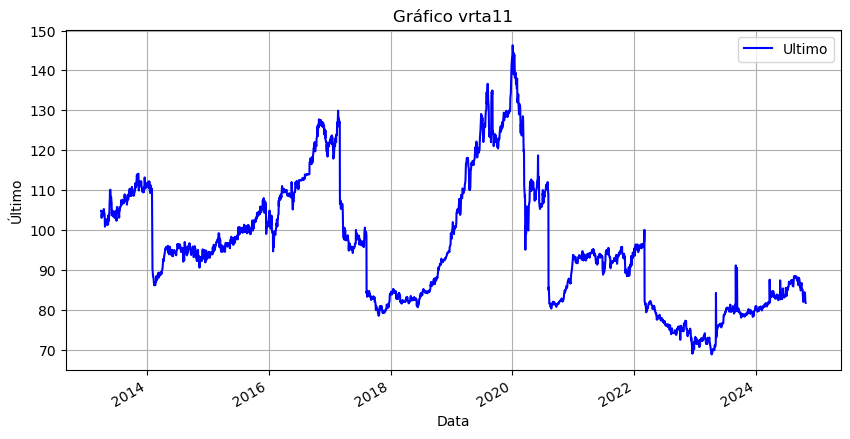

In [50]:
df_vrta["Ultimo"].plot(figsize=(10, 5), color="b", title="Gráfico vrta11") 
plt.xlabel("Data")
plt.ylabel("Último") 
plt.legend() 
plt.grid(True) 
plt.show()  

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_vrta["valor_padronizado"] = scaler.fit_transform(df_vrta[["Ultimo"]])

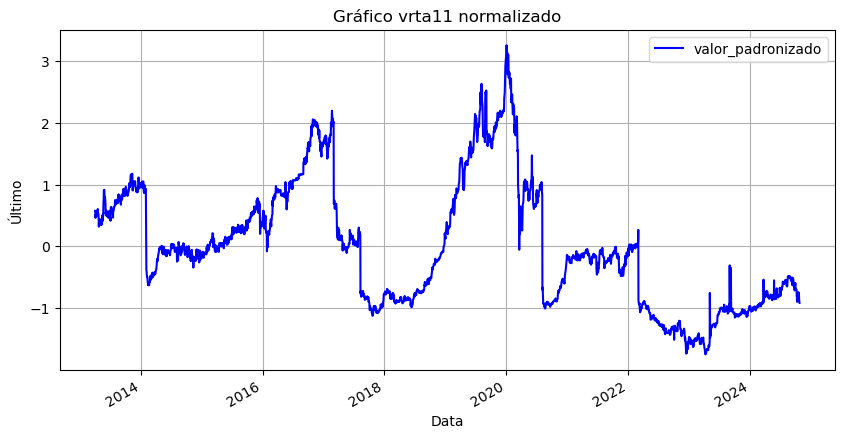

In [52]:
df_vrta["valor_padronizado"].plot(figsize=(10, 5), color="b", title="Gráfico vrta11 normalizado") 
plt.xlabel("Data")
plt.ylabel("Último") 
plt.legend() 
plt.grid(True) 
plt.show()  

In [53]:
df_bova["valor_padronizado"] = scaler.fit_transform(df_bova[["Ultimo"]])
df_ifix["valor_padronizado"] = scaler.fit_transform(df_ifix[["Ultimo"]])
df_selic["valor_padronizado"] = scaler.fit_transform(df_selic[["selic_meta"]])
df_abcp["valor_padronizado"] = scaler.fit_transform(df_abcp[["Ultimo"]])
df_bbrc["valor_padronizado"] = scaler.fit_transform(df_bbrc[["Ultimo"]])
df_jsre["valor_padronizado"] = scaler.fit_transform(df_jsre[["Ultimo"]])
df_kncr["valor_padronizado"] = scaler.fit_transform(df_kncr[["Ultimo"]])
df_knri["valor_padronizado"] = scaler.fit_transform(df_knri[["Ultimo"]])
df_mxrf["valor_padronizado"] = scaler.fit_transform(df_mxrf[["Ultimo"]])
df_rbvo["valor_padronizado"] = scaler.fit_transform(df_rbvo[["Ultimo"]])
df_sptw["valor_padronizado"] = scaler.fit_transform(df_sptw[["Ultimo"]])

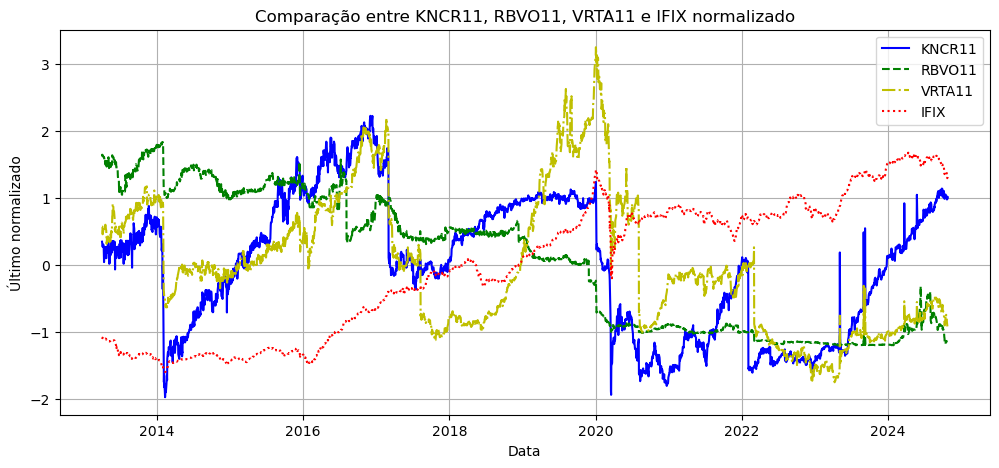

In [54]:
plt.figure(figsize=(12, 5))
plt.plot(df_kncr.index, df_kncr["valor_padronizado"], label="KNCR11", color="b", linestyle="-")
plt.plot(df_rbvo.index, df_rbvo["valor_padronizado"], label="RBVO11", color="g", linestyle="--")
plt.plot(df_vrta.index, df_vrta["valor_padronizado"], label="VRTA11", color="y", linestyle="-.")
plt.plot(df_ifix.index, df_ifix["valor_padronizado"], label="IFIX", color="r", linestyle=":")
plt.title("Comparação entre KNCR11, RBVO11, VRTA11 e IFIX normalizado")
plt.xlabel("Data")
plt.ylabel("Último normalizado") 
plt.legend() 
plt.grid(True) 
plt.show() 

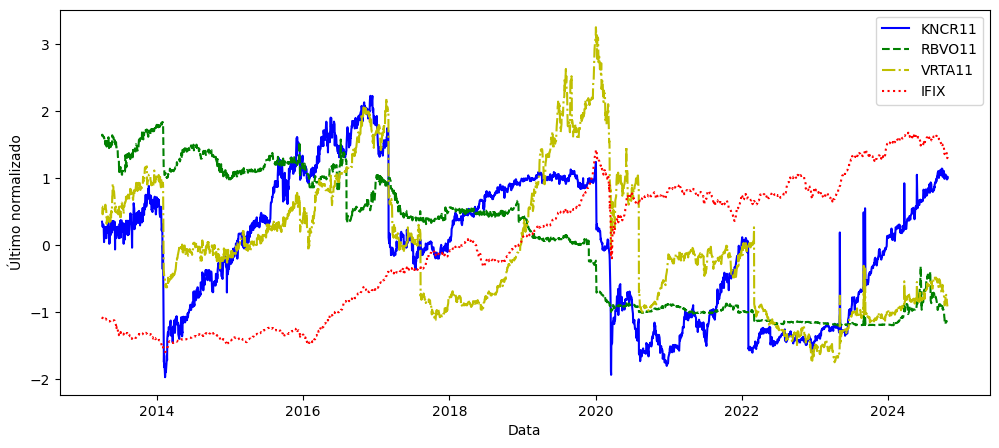

In [55]:
plt.figure(figsize=(12, 5))
plt.plot(df_kncr.index, df_kncr["valor_padronizado"], label="KNCR11", color="b", linestyle="-")
plt.plot(df_rbvo.index, df_rbvo["valor_padronizado"], label="RBVO11", color="g", linestyle="--")
plt.plot(df_vrta.index, df_vrta["valor_padronizado"], label="VRTA11", color="y", linestyle="-.")
plt.plot(df_ifix.index, df_ifix["valor_padronizado"], label="IFIX", color="r", linestyle=":")
plt.xlabel("Data")
plt.ylabel("Último normalizado") 
plt.legend() 
plt.show() 

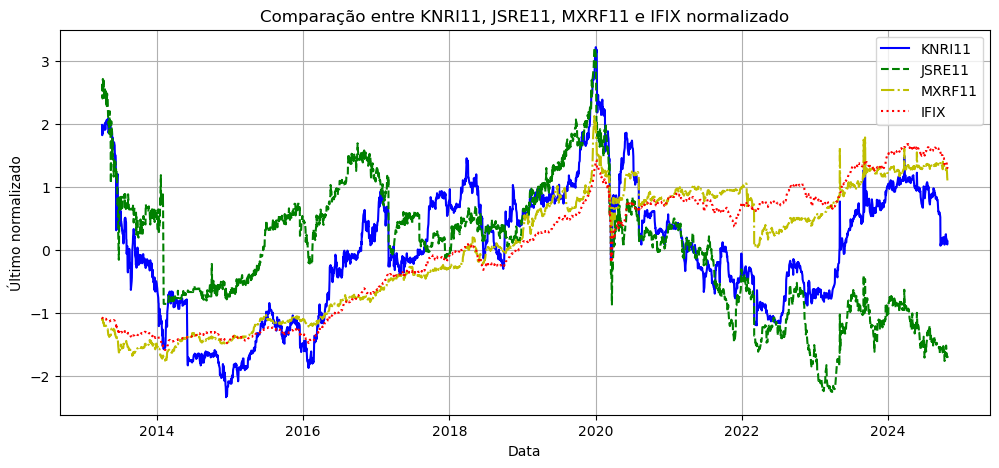

In [56]:
plt.figure(figsize=(12, 5))
plt.plot(df_knri.index, df_knri["valor_padronizado"], label="KNRI11", color="b", linestyle="-")
plt.plot(df_jsre.index, df_jsre["valor_padronizado"], label="JSRE11", color="g", linestyle="--")
plt.plot(df_mxrf.index, df_mxrf["valor_padronizado"], label="MXRF11", color="y", linestyle="-.")
plt.plot(df_ifix.index, df_ifix["valor_padronizado"], label="IFIX", color="r", linestyle=":")
plt.title("Comparação entre KNRI11, JSRE11, MXRF11 e IFIX normalizado")
plt.xlabel("Data")
plt.ylabel("Último normalizado") 
plt.legend() 
plt.grid(True) 
plt.show() 

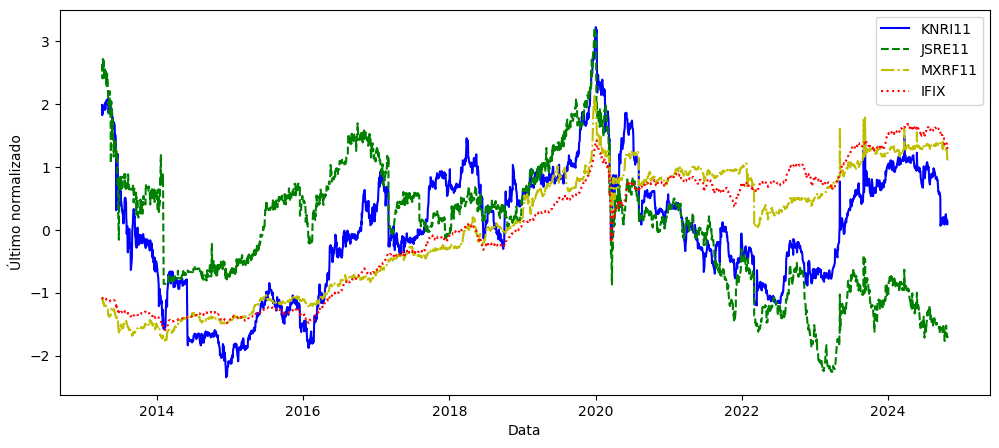

In [57]:
plt.figure(figsize=(12, 5))
plt.plot(df_knri.index, df_knri["valor_padronizado"], label="KNRI11", color="b", linestyle="-")
plt.plot(df_jsre.index, df_jsre["valor_padronizado"], label="JSRE11", color="g", linestyle="--")
plt.plot(df_mxrf.index, df_mxrf["valor_padronizado"], label="MXRF11", color="y", linestyle="-.")
plt.plot(df_ifix.index, df_ifix["valor_padronizado"], label="IFIX", color="r", linestyle=":")
plt.xlabel("Data")
plt.ylabel("Último normalizado") 
plt.legend() 
plt.show() 

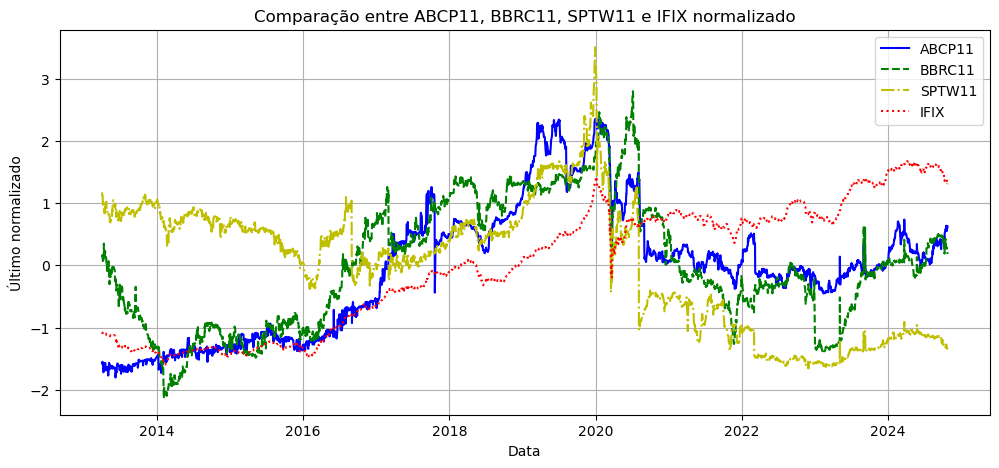

In [58]:
plt.figure(figsize=(12, 5))
plt.plot(df_abcp.index, df_abcp["valor_padronizado"], label="ABCP11", color="b", linestyle="-")
plt.plot(df_bbrc.index, df_bbrc["valor_padronizado"], label="BBRC11", color="g", linestyle="--")
plt.plot(df_sptw.index, df_sptw["valor_padronizado"], label="SPTW11", color="y", linestyle="-.")
plt.plot(df_ifix.index, df_ifix["valor_padronizado"], label="IFIX", color="r", linestyle=":")
plt.title("Comparação entre ABCP11, BBRC11, SPTW11 e IFIX normalizado")
plt.xlabel("Data")
plt.ylabel("Último normalizado") 
plt.legend() 
plt.grid(True) 
plt.show() 

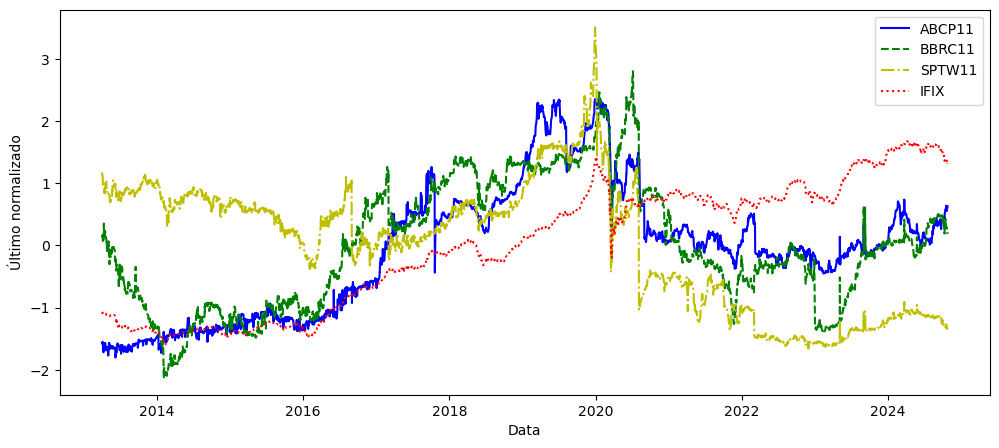

In [59]:
plt.figure(figsize=(12, 5))
plt.plot(df_abcp.index, df_abcp["valor_padronizado"], label="ABCP11", color="b", linestyle="-")
plt.plot(df_bbrc.index, df_bbrc["valor_padronizado"], label="BBRC11", color="g", linestyle="--")
plt.plot(df_sptw.index, df_sptw["valor_padronizado"], label="SPTW11", color="y", linestyle="-.")
plt.plot(df_ifix.index, df_ifix["valor_padronizado"], label="IFIX", color="r", linestyle=":")
plt.xlabel("Data")
plt.ylabel("Último normalizado") 
plt.legend() 
plt.show() 

## Correlação normalizados com IFIX - Geral

In [61]:
correlation_ifix_abcp = df_ifix["Ultimo"].corr(df_abcp["Ultimo"])
print("Correlação entre IFIX e ABCP11:", correlation_ifix_abcp)

Correlação entre IFIX e ABCP11: 0.6322119629846481


In [62]:
correlation_ifix_bbrc = df_ifix["Ultimo"].corr(df_bbrc["Ultimo"])
print("Correlação entre IFIX e BBRC11:", correlation_ifix_bbrc)

Correlação entre IFIX e BBRC11: 0.4449800711565706


In [63]:
correlation_ifix_jsre = df_ifix["Ultimo"].corr(df_jsre["Ultimo"])
print("Correlação entre IFIX e JSRE11:", correlation_ifix_jsre)

Correlação entre IFIX e JSRE11: -0.32503673141605605


In [64]:
correlation_ifix_kncr = df_ifix["Ultimo"].corr(df_kncr["Ultimo"])
print("Correlação entre IFIX e KNCR11:", correlation_ifix_kncr)

Correlação entre IFIX e KNCR11: -0.32541473311241464


In [65]:
correlation_ifix_knri = df_ifix["Ultimo"].corr(df_knri["Ultimo"])
print("Correlação entre IFIX e KNRI11:", correlation_ifix_knri)

Correlação entre IFIX e KNRI11: 0.5605089958578485


In [66]:
correlation_ifix_mxrf = df_ifix["Ultimo"].corr(df_mxrf["Ultimo"])
print("Correlação entre IFIX e MXRF11:", correlation_ifix_mxrf)

Correlação entre IFIX e MXRF11: 0.9704264817658823


In [67]:
correlation_ifix_rbvo = df_ifix["Ultimo"].corr(df_rbvo["Ultimo"])
print("Correlação entre IFIX e RBVO11:", correlation_ifix_rbvo)

Correlação entre IFIX e RBVO11: -0.926466687700502


In [68]:
correlation_ifix_sptw = df_ifix["Ultimo"].corr(df_sptw["Ultimo"])
print("Correlação entre IFIX e SPTW11:", correlation_ifix_sptw)

Correlação entre IFIX e SPTW11: -0.5468237193911812


In [69]:
correlation_ifix_vrta = df_ifix["Ultimo"].corr(df_vrta["Ultimo"])
print("Correlação entre IFIX e VRTA11:", correlation_ifix_vrta)

Correlação entre IFIX e VRTA11: -0.33975360026342394


## Correlação normalizados com IFIX - Pré pandemia

In [71]:
data_covid = "2020-02-28"
pre_covid_ifix = df_ifix[:data_covid]

In [72]:
pre_covid_abcp = df_abcp.loc[:data_covid]
correlation_ifix_abcp_pre = pre_covid_ifix["Ultimo"].corr(pre_covid_abcp["Ultimo"])
print("Correlação entre IFIX e ABCP11 pré pandemia:", correlation_ifix_abcp_pre)

Correlação entre IFIX e ABCP11 pré pandemia: 0.9664274722190279


In [73]:
pre_covid_bbrc = df_bbrc.loc[:data_covid]
correlation_ifix_bbrc_pre = pre_covid_ifix["Ultimo"].corr(pre_covid_bbrc["Ultimo"])
print("Correlação entre IFIX e BBRC11 pré pandemia:", correlation_ifix_bbrc_pre)

Correlação entre IFIX e BBRC11 pré pandemia: 0.9475183635508841


In [74]:
pre_covid_jsre = df_jsre.loc[:data_covid]
correlation_ifix_jsre_pre = pre_covid_ifix["Ultimo"].corr(pre_covid_jsre["Ultimo"])
print("Correlação entre IFIX e JSRE11 pré pandemia:", correlation_ifix_jsre_pre)

Correlação entre IFIX e JSRE11 pré pandemia: 0.5752863395247417


In [75]:
pre_covid_kncr = df_kncr.loc[:data_covid]
correlation_ifix_kncr_pre = pre_covid_ifix["Ultimo"].corr(pre_covid_kncr["Ultimo"])
print("Correlação entre IFIX e KNCR11 pré pandemia:", correlation_ifix_kncr_pre)

Correlação entre IFIX e KNCR11 pré pandemia: 0.2574882424871252


In [76]:
pre_covid_knri = df_knri.loc[:data_covid]
correlation_ifix_knri_pre = pre_covid_ifix["Ultimo"].corr(pre_covid_knri["Ultimo"])
print("Correlação entre IFIX e KNRI11 pré pandemia:", correlation_ifix_knri_pre)

Correlação entre IFIX e KNRI11 pré pandemia: 0.8110868918731245


In [77]:
pre_covid_mxrf = df_mxrf.loc[:data_covid]
correlation_ifix_mxrf_pre = pre_covid_ifix["Ultimo"].corr(pre_covid_mxrf["Ultimo"])
print("Correlação entre IFIX e MXRF11 pré pandemia:", correlation_ifix_mxrf_pre)

Correlação entre IFIX e MXRF11 pré pandemia: 0.9800572235124111


In [78]:
pre_covid_rbvo = df_rbvo.loc[:data_covid]
correlation_ifix_rbvo_pre = pre_covid_ifix["Ultimo"].corr(pre_covid_rbvo["Ultimo"])
print("Correlação entre IFIX e RBVO11 pré pandemia:", correlation_ifix_rbvo_pre)

Correlação entre IFIX e RBVO11 pré pandemia: -0.9217688407617464


In [79]:
pre_covid_sptw = df_sptw.loc[:data_covid]
correlation_ifix_sptw_pre = pre_covid_ifix["Ultimo"].corr(pre_covid_sptw["Ultimo"])
print("Correlação entre IFIX e SPTW11 pré pandemia:", correlation_ifix_sptw_pre)

Correlação entre IFIX e SPTW11 pré pandemia: 0.49416580295278834


In [80]:
pre_covid_vrta = df_vrta.loc[:data_covid]
correlation_ifix_vrta_pre = pre_covid_ifix["Ultimo"].corr(pre_covid_vrta["Ultimo"])
print("Correlação entre IFIX e VRTA11 pré pandemia:", correlation_ifix_vrta_pre)

Correlação entre IFIX e VRTA11 pré pandemia: 0.2994403136595844


## Correlação normalizados com IFIX - Pós pandemia

In [82]:
data_covid = "2020-02-28"
pos_covid_ifix = df_ifix[data_covid:]

In [83]:
pos_covid_abcp = df_abcp.loc[data_covid:]
correlation_ifix_abcp_pos = pos_covid_ifix["Ultimo"].corr(pos_covid_abcp["Ultimo"])
print("Correlação entre IFIX e ABCP11 pós pandemia:", correlation_ifix_abcp_pos)

Correlação entre IFIX e ABCP11 pós pandemia: -0.0488704473211332


In [84]:
pos_covid_bbrc = df_bbrc.loc[data_covid:]
correlation_ifix_bbrc_pos = pos_covid_ifix["Ultimo"].corr(pos_covid_bbrc["Ultimo"])
print("Correlação entre IFIX e BBRC11 pós pandemia:", correlation_ifix_bbrc_pos)

Correlação entre IFIX e BBRC11 pós pandemia: -0.030911921974878288


In [85]:
pos_covid_jsre = df_jsre.loc[data_covid:]
correlation_ifix_jsre_pos = pos_covid_ifix["Ultimo"].corr(pos_covid_jsre["Ultimo"])
print("Correlação entre IFIX e JSRE11 pós pandemia:", correlation_ifix_jsre_pos)

Correlação entre IFIX e JSRE11 pós pandemia: -0.34556539928129604


In [86]:
pos_covid_kncr = df_kncr.loc[data_covid:]
correlation_ifix_kncr_pos = pos_covid_ifix["Ultimo"].corr(pos_covid_kncr["Ultimo"])
print("Correlação entre IFIX e KNCR11 pós pandemia:", correlation_ifix_kncr_pos)

Correlação entre IFIX e KNCR11 pós pandemia: 0.7147918668612705


In [87]:
pos_covid_knri = df_knri.loc[data_covid:]
correlation_ifix_knri_pos = pos_covid_ifix["Ultimo"].corr(pos_covid_knri["Ultimo"])
print("Correlação entre IFIX e KNRI11 pós pandemia:", correlation_ifix_knri_pos)

Correlação entre IFIX e KNRI11 pós pandemia: 0.479430308850211


In [88]:
pos_covid_mxrf = df_mxrf.loc[data_covid:]
correlation_ifix_mxrf_pos = pos_covid_ifix["Ultimo"].corr(pos_covid_mxrf["Ultimo"])
print("Correlação entre IFIX e MXRF11 pós pandemia:", correlation_ifix_mxrf_pos)

Correlação entre IFIX e MXRF11 pós pandemia: 0.6394746615761197


In [89]:
pos_covid_rbvo = df_rbvo.loc[data_covid:]
correlation_ifix_rbvo_pos = pos_covid_ifix["Ultimo"].corr(pos_covid_rbvo["Ultimo"])
print("Correlação entre IFIX e RBVO11 pós pandemia:", correlation_ifix_rbvo_pos)

Correlação entre IFIX e RBVO11 pós pandemia: 0.014034450971642146


In [90]:
pos_covid_sptw = df_sptw.loc[data_covid:]
correlation_ifix_sptw_pos = pos_covid_ifix["Ultimo"].corr(pos_covid_sptw["Ultimo"])
print("Correlação entre IFIX e SPTW11 pós pandemia:", correlation_ifix_sptw_pos)

Correlação entre IFIX e SPTW11 pós pandemia: -0.34511507960170795


In [91]:
pos_covid_vrta = df_vrta.loc[data_covid:]
correlation_ifix_vrta_pos = pos_covid_ifix["Ultimo"].corr(pos_covid_vrta["Ultimo"])
print("Correlação entre IFIX e VRTA11 pós pandemia:", correlation_ifix_vrta_pos)

Correlação entre IFIX e VRTA11 pós pandemia: -0.3397106751382239


# Cálculos

## Retorno

In [94]:
# Calculando o retorno diário
df_abcp["Retorno"] = df_abcp["Ultimo"].pct_change()
# Retorno médio
retorno_medio_df_abcp = df_abcp["Retorno"].mean()
print(f"{retorno_medio_df_abcp}")

0.0005745006333172395


In [95]:
# Calculando o retorno diário
df_bbrc["Retorno"] = df_bbrc["Ultimo"].pct_change()
# Retorno médio
retorno_medio_df_bbrc = df_bbrc["Retorno"].mean()
print(f"{retorno_medio_df_bbrc}")

0.00013204322234083716


In [96]:
# Calculando o retorno diário
df_bova["Retorno"] = df_bova["Ultimo"].pct_change()
# Retorno médio
retorno_medio_df_bova = df_bova["Retorno"].mean()
print(f"{retorno_medio_df_bova}")

0.00040896766047615466


In [97]:
# Calculando o retorno diário
df_ifix["Retorno"] = df_ifix["Ultimo"].pct_change()
# Retorno médio
retorno_medio_df_ifix = df_ifix["Retorno"].mean()
print(f"{retorno_medio_df_ifix}")

0.00025765833618873784


In [98]:
# Calculando o retorno diário
df_jsre["Retorno"] = df_jsre["Ultimo"].pct_change()
# Retorno médio
retorno_medio_df_jsre = df_jsre["Retorno"].mean()
print(f"{retorno_medio_df_jsre}")

-0.00012315703957687039


In [99]:
# Calculando o retorno diário
df_kncr["Retorno"] = df_kncr["Ultimo"].pct_change()
# Retorno médio
retorno_medio_df_kncr = df_kncr["Retorno"].mean()
print(f"{retorno_medio_df_kncr}")

0.00010067725618005995


In [100]:
# Calculando o retorno diário
df_knri["Retorno"] = df_knri["Ultimo"].pct_change()
# Retorno médio
retorno_medio_df_knri = df_knri["Retorno"].mean()
print(f"{retorno_medio_df_knri}")

3.7501358027657914e-06


In [101]:
# Calculando o retorno diário
df_mxrf["Retorno"] = df_mxrf["Ultimo"].pct_change()
# Retorno médio
retorno_medio_df_mxrf = df_mxrf["Retorno"].mean()
print(f"{retorno_medio_df_mxrf}")

0.00033597815400631385


In [102]:
# Calculando o retorno diário
df_rbvo["Retorno"] = df_rbvo["Ultimo"].pct_change()
# Retorno médio
retorno_medio_df_rbvo = df_rbvo["Retorno"].mean()
print(f"{retorno_medio_df_rbvo}")

0.00017703186840607081


In [103]:
# Calculando o retorno diário
df_sptw["Retorno"] = df_sptw["Ultimo"].pct_change()
# Retorno médio
retorno_medio_df_sptw = df_sptw["Retorno"].mean()
print(f"{retorno_medio_df_sptw}")

-7.18817556786163e-05


In [104]:
# Calculando o retorno diário
df_vrta["Retorno"] = df_vrta["Ultimo"].pct_change()
# Retorno médio
retorno_medio_df_vrta = df_vrta["Retorno"].mean()
print(f"{retorno_medio_df_vrta}")

6.378970078360299e-06


In [105]:
# Volatilidade com base nos retornos
volatilidade_df_abcp = df_abcp["Retorno"].std()
print(f"{volatilidade_df_abcp}")

0.02311426884881137


In [106]:
# Volatilidade com base nos retornos
volatilidade_df_bbrc = df_bbrc["Retorno"].std()
print(f"{volatilidade_df_bbrc}")

0.015903332999288453


In [107]:
# Volatilidade com base nos retornos
volatilidade_df_bova = df_bova["Retorno"].std()
print(f"{volatilidade_df_bova}")

0.015352831787365061


In [108]:
# Volatilidade com base nos retornos
volatilidade_df_ifix = df_ifix["Retorno"].std()
print(f"{volatilidade_df_ifix}")

0.005080479175565755


In [109]:
# Volatilidade com base nos retornos
volatilidade_df_jsre = df_jsre["Retorno"].std()
print(f"{volatilidade_df_jsre}")

0.014087682140267543


In [110]:
# Volatilidade com base nos retornos
volatilidade_df_kncr = df_kncr["Retorno"].std()
print(f"{volatilidade_df_kncr}")

0.012213880933794077


In [111]:
# Volatilidade com base nos retornos
volatilidade_df_knri = df_knri["Retorno"].std()
print(f"{volatilidade_df_knri}")

0.013032277101128349


In [112]:
# Volatilidade com base nos retornos
volatilidade_df_mxrf = df_mxrf["Retorno"].std()
print(f"{volatilidade_df_mxrf}")

0.012017382733441806


In [113]:
# Volatilidade com base nos retornos
volatilidade_df_rbvo = df_rbvo["Retorno"].std()
print(f"{volatilidade_df_rbvo}")

0.049148285169576346


In [114]:
# Volatilidade com base nos retornos
volatilidade_df_sptw = df_sptw["Retorno"].std()
print(f"{volatilidade_df_sptw}")

0.019164984059586866


In [115]:
# Volatilidade com base nos retornos
volatilidade_df_vrta = df_vrta["Retorno"].std()
print(f"{volatilidade_df_vrta}")

0.013332002212117224


## Média mensal por ano

In [117]:
media_mensal_abcp = df_abcp["Ultimo"].groupby([df_abcp.index.year, df_abcp.index.month]).mean()

media_mensal_abcp.index.names = ["Ano", "Mês"]
print(media_mensal_abcp)

Ano   Mês
2013  4      32.112105
      5      31.708333
      6      31.205000
      7      31.295714
      8      31.231053
               ...    
2024  6      65.542000
      7      65.455217
      8      68.425000
      9      70.722381
      10     73.696842
Name: Ultimo, Length: 139, dtype: float64


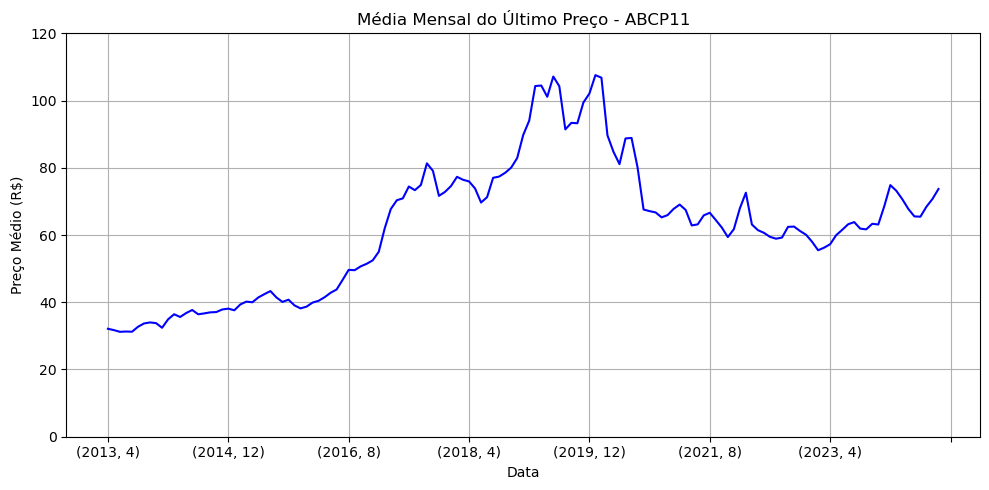

In [118]:
media_mensal_abcp.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - ABCP11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,120)
)

plt.grid(True)
plt.tight_layout()
plt.show()

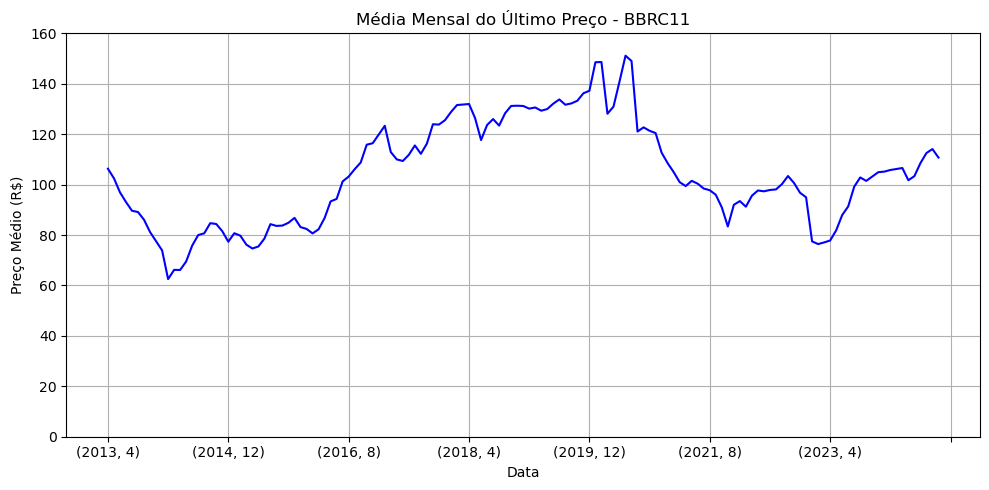

In [119]:
media_mensal_bbrc = df_bbrc["Ultimo"].groupby([df_bbrc.index.year, df_bbrc.index.month]).mean()

media_mensal_bbrc.index.names = ["Ano", "Mês"]

media_mensal_bbrc.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - BBRC11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,160)
)

plt.grid(True)
plt.tight_layout()
plt.show()

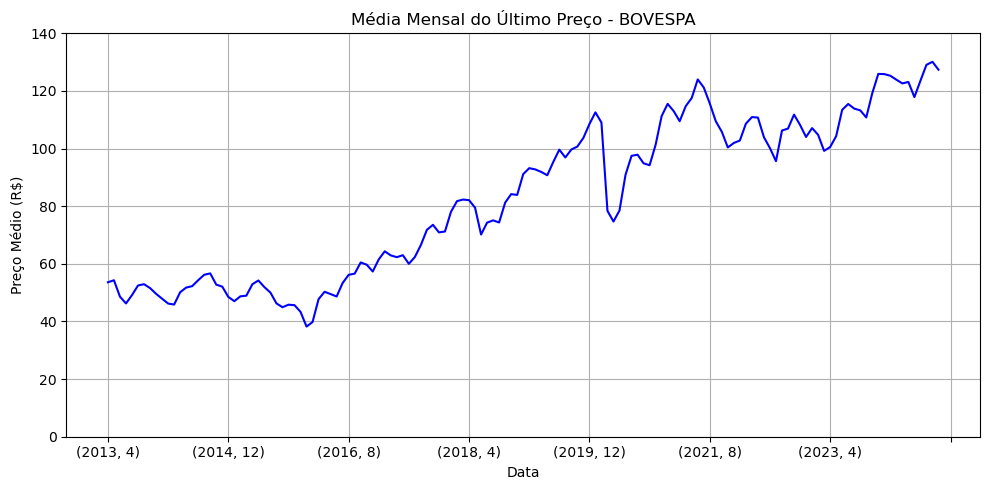

In [120]:
media_mensal_bova = df_bova["Ultimo"].groupby([df_bova.index.year, df_bova.index.month]).mean()

media_mensal_bova.index.names = ["Ano", "Mês"]

media_mensal_bova.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - BOVESPA",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,140)
)

plt.grid(True)
plt.tight_layout()
plt.show()

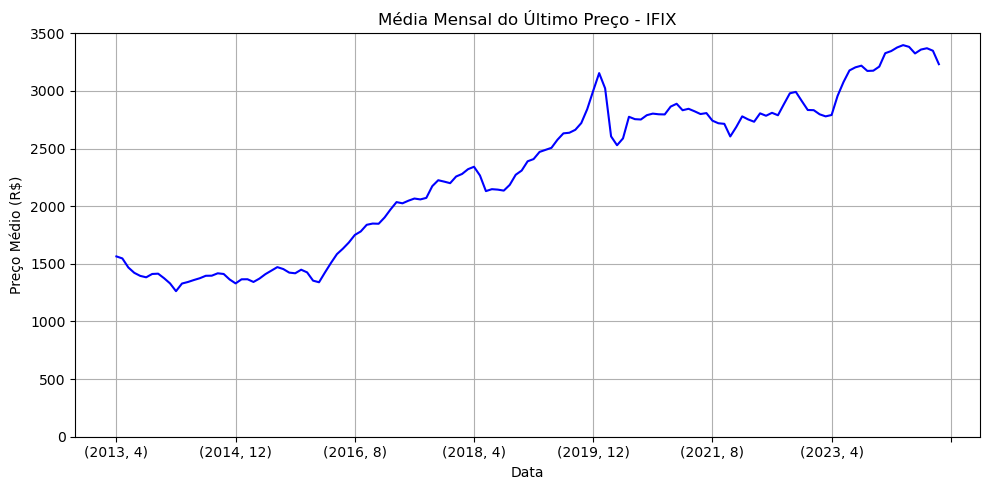

In [121]:
media_mensal_ifix = df_ifix["Ultimo"].groupby([df_ifix.index.year, df_ifix.index.month]).mean()

media_mensal_ifix.index.names = ["Ano", "Mês"]

media_mensal_ifix.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - IFIX",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,3500)
)

plt.grid(True)
plt.tight_layout()
plt.show()

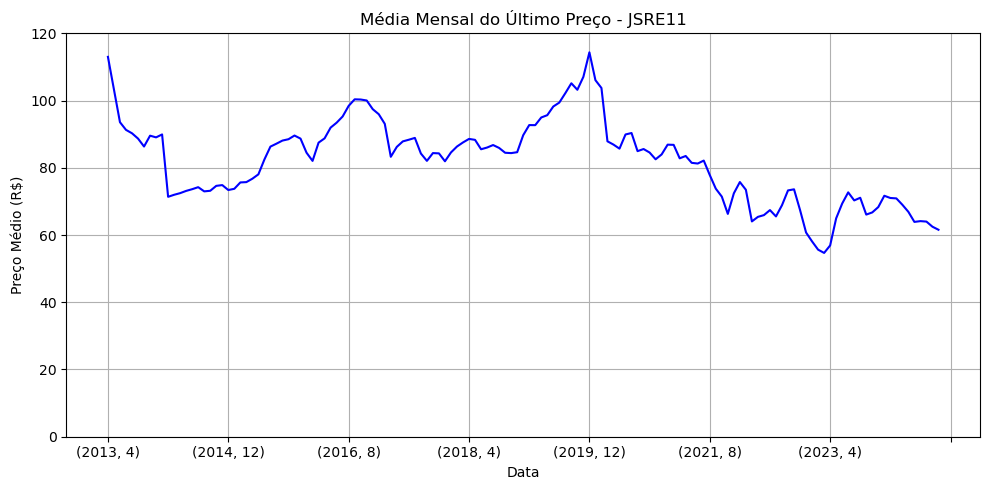

In [122]:
media_mensal_jsre = df_jsre["Ultimo"].groupby([df_jsre.index.year, df_jsre.index.month]).mean()

media_mensal_jsre.index.names = ["Ano", "Mês"]

media_mensal_jsre.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - JSRE11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,120)
)

plt.grid(True)
plt.tight_layout()
plt.show()

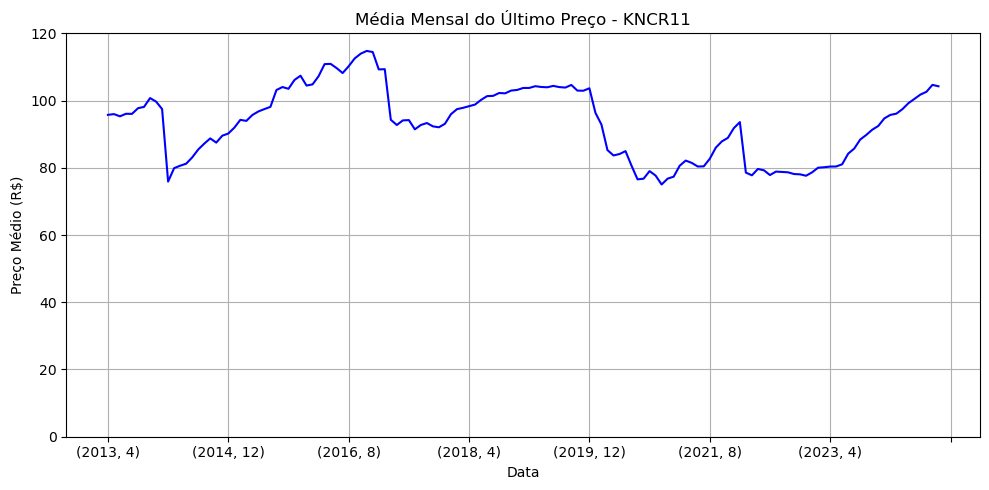

In [123]:
media_mensal_kncr = df_kncr["Ultimo"].groupby([df_kncr.index.year, df_kncr.index.month]).mean()

media_mensal_kncr.index.names = ["Ano", "Mês"]

media_mensal_kncr.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - KNCR11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,120)
)

plt.grid(True)
plt.tight_layout()
plt.show()

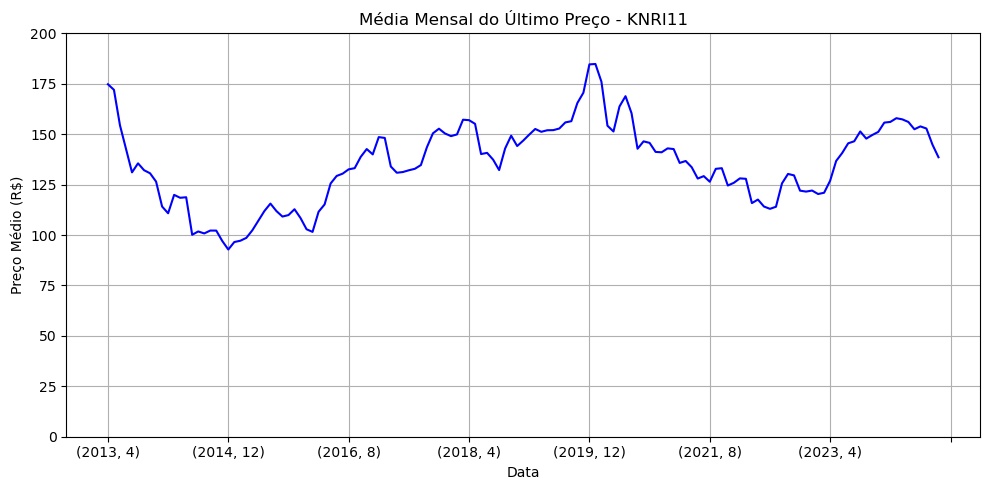

In [124]:
media_mensal_knri = df_knri["Ultimo"].groupby([df_knri.index.year, df_knri.index.month]).mean()

media_mensal_knri.index.names = ["Ano", "Mês"]

media_mensal_knri.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - KNRI11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,200)
)

plt.grid(True)
plt.tight_layout()
plt.show()

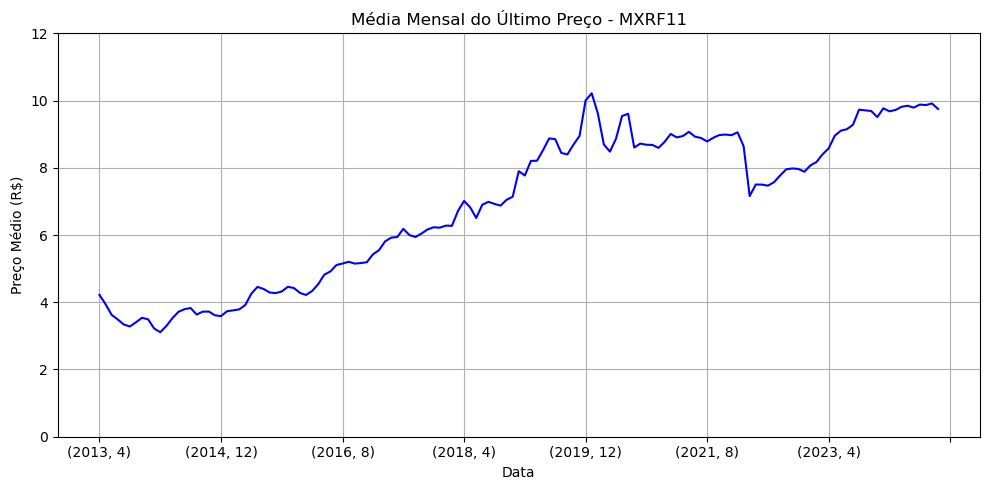

In [125]:
media_mensal_mxrf = df_mxrf["Ultimo"].groupby([df_mxrf.index.year, df_mxrf.index.month]).mean()

media_mensal_mxrf.index.names = ["Ano", "Mês"]

media_mensal_mxrf.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - MXRF11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,12)
)

plt.grid(True)
plt.tight_layout()
plt.show()

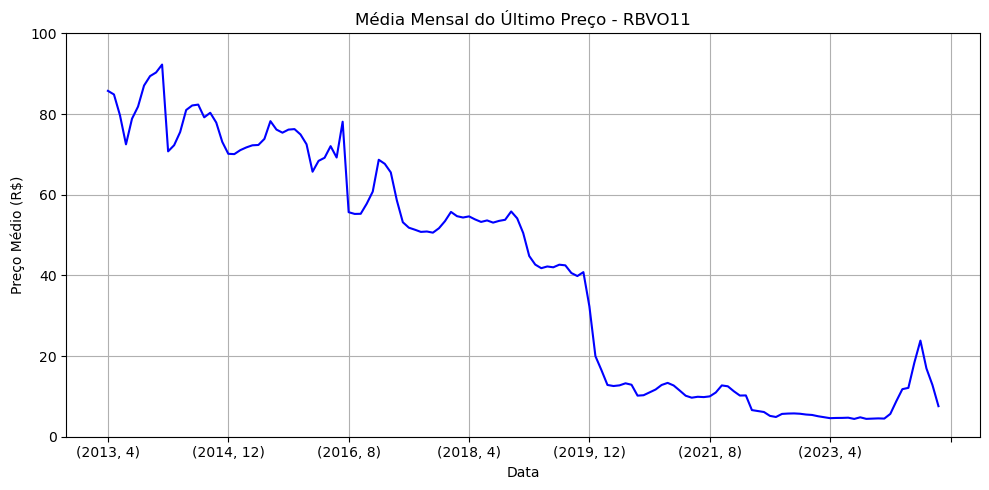

In [126]:
media_mensal_rbvo = df_rbvo["Ultimo"].groupby([df_rbvo.index.year, df_rbvo.index.month]).mean()

media_mensal_rbvo.index.names = ["Ano", "Mês"]

media_mensal_rbvo.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - RBVO11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,100)
)

plt.grid(True)
plt.tight_layout()
plt.show()

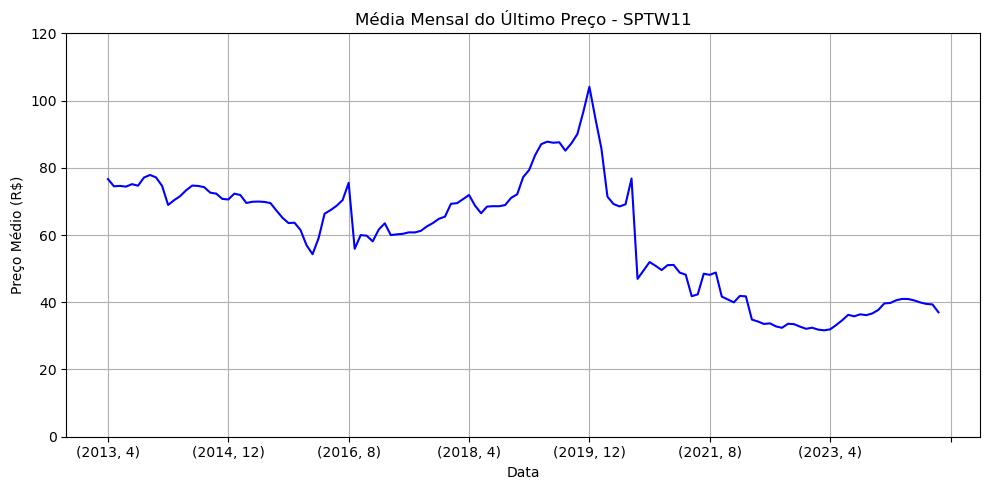

In [127]:
media_mensal_sptw = df_sptw["Ultimo"].groupby([df_sptw.index.year, df_sptw.index.month]).mean()

media_mensal_sptw.index.names = ["Ano", "Mês"]

media_mensal_sptw.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - SPTW11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,120)
)

plt.grid(True)
plt.tight_layout()
plt.show()

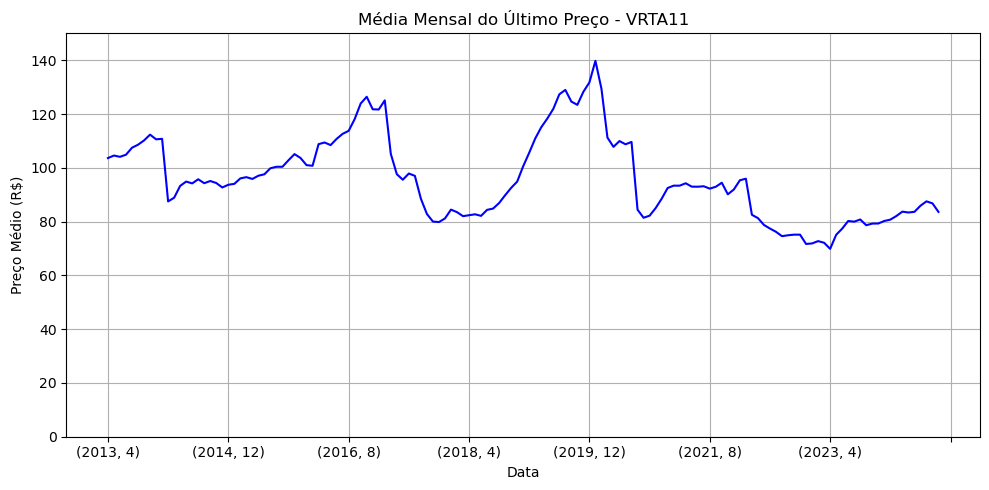

In [128]:
media_mensal_vrta = df_vrta["Ultimo"].groupby([df_vrta.index.year, df_vrta.index.month]).mean()

media_mensal_vrta.index.names = ["Ano", "Mês"]

media_mensal_vrta.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - VRTA11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,150)
)

plt.grid(True)
plt.tight_layout()
plt.show()

## Volatilidade

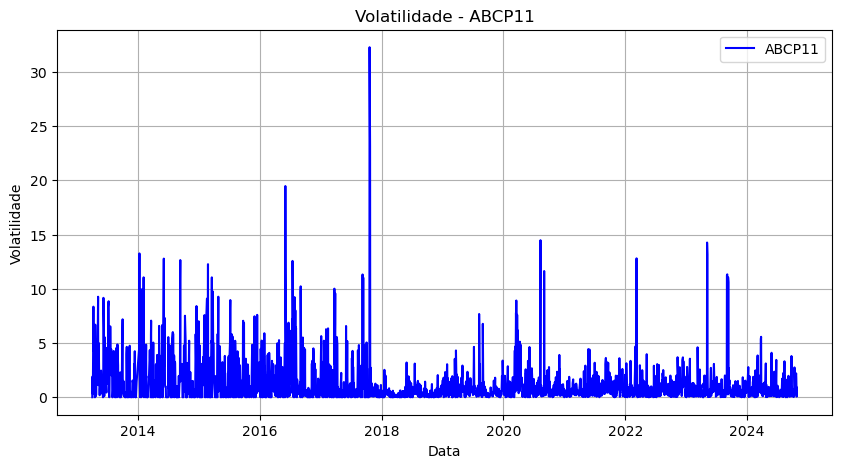

In [130]:
df_abcp["Volatilidade"] = df_abcp["Ultimo"].pct_change().abs() * 100
df_abcp.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_abcp.index, df_abcp["Volatilidade"], label="ABCP11", color="b")
plt.title("Volatilidade - ABCP11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

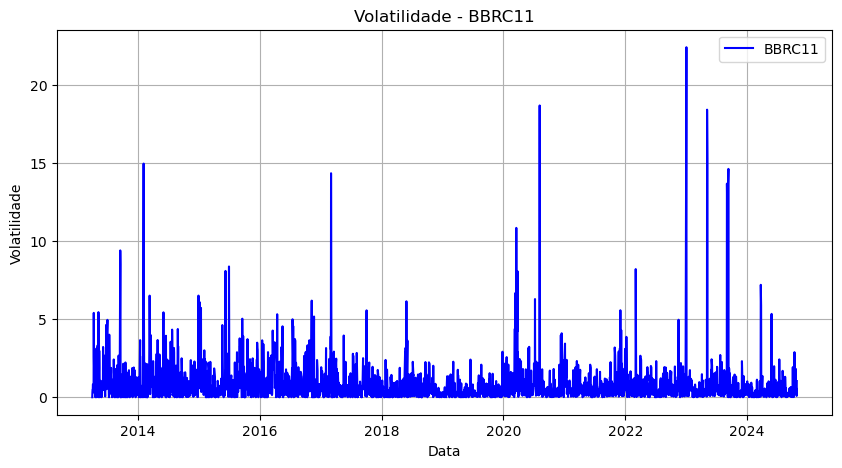

In [131]:
df_bbrc["Volatilidade"] = df_bbrc["Ultimo"].pct_change().abs() * 100
df_bbrc.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_bbrc.index, df_bbrc["Volatilidade"], label="BBRC11", color="b")
plt.title("Volatilidade - BBRC11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

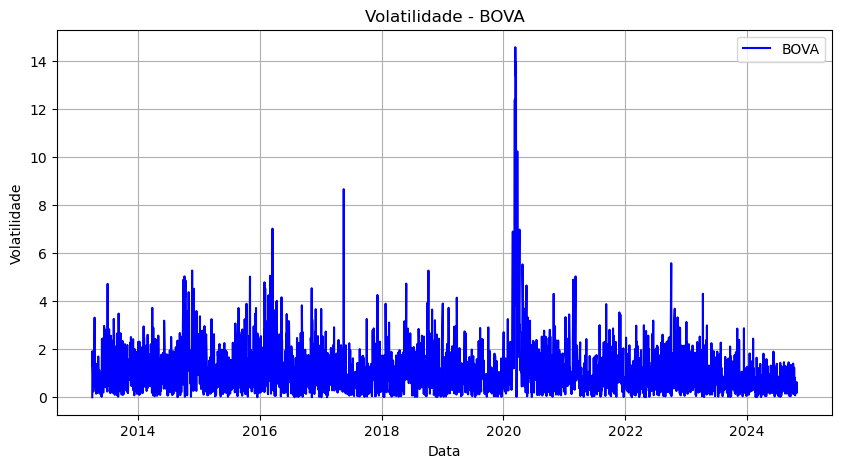

In [132]:
df_bova["Volatilidade"] = df_bova["Ultimo"].pct_change().abs() * 100
df_bova.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_bova.index, df_bova["Volatilidade"], label="BOVA", color="b")
plt.title("Volatilidade - BOVA")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

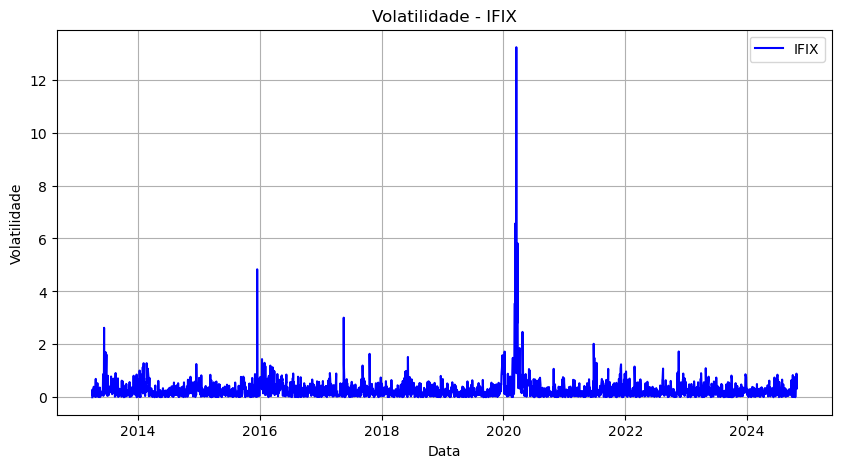

In [133]:
df_ifix["Volatilidade"] = df_ifix["Ultimo"].pct_change().abs() * 100
df_ifix.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_ifix.index, df_ifix["Volatilidade"], label="IFIX", color="b")
plt.title("Volatilidade - IFIX")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

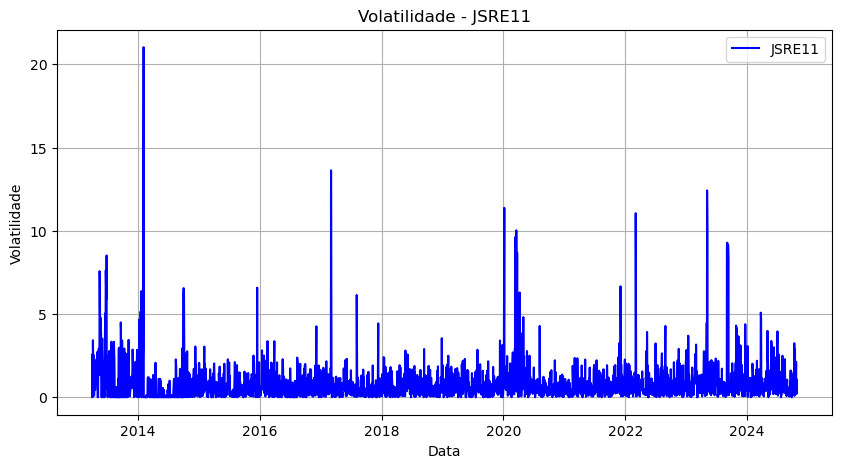

In [134]:
df_jsre["Volatilidade"] = df_jsre["Ultimo"].pct_change().abs() * 100
df_jsre.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_jsre.index, df_jsre["Volatilidade"], label="JSRE11", color="b")
plt.title("Volatilidade - JSRE11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

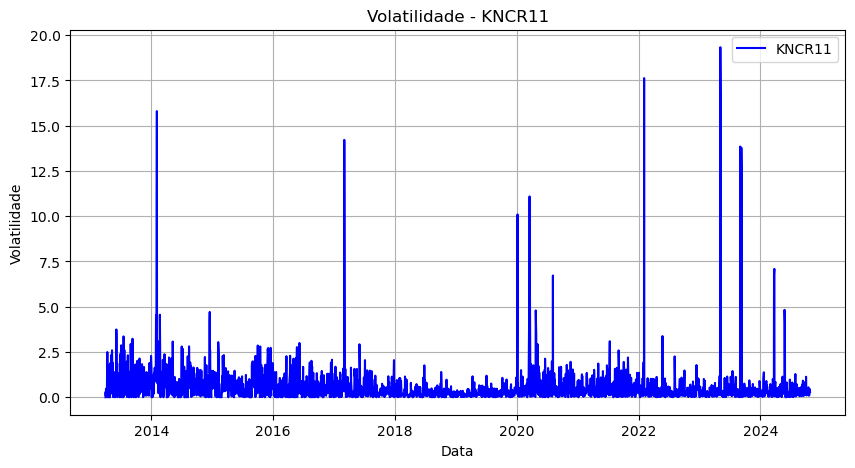

In [135]:
df_kncr["Volatilidade"] = df_kncr["Ultimo"].pct_change().abs() * 100
df_kncr.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_kncr.index, df_kncr["Volatilidade"], label="KNCR11", color="b")
plt.title("Volatilidade - KNCR11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

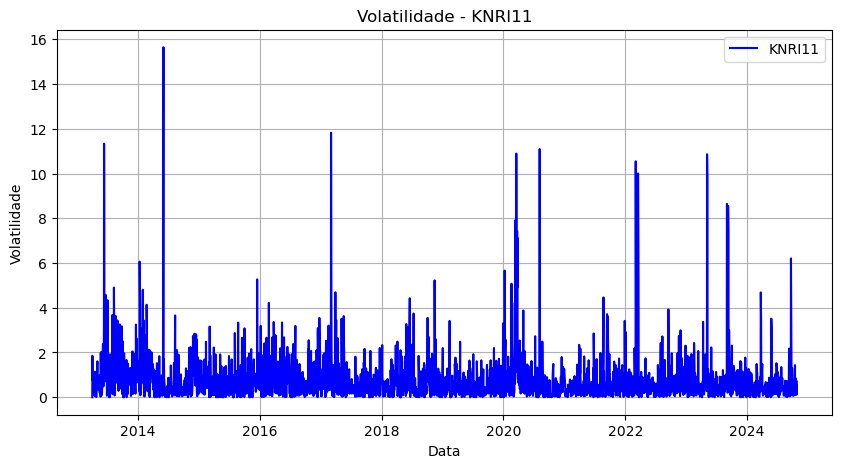

In [136]:
df_knri["Volatilidade"] = df_knri["Ultimo"].pct_change().abs() * 100
df_knri.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_knri.index, df_knri["Volatilidade"], label="KNRI11", color="b")
plt.title("Volatilidade - KNRI11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

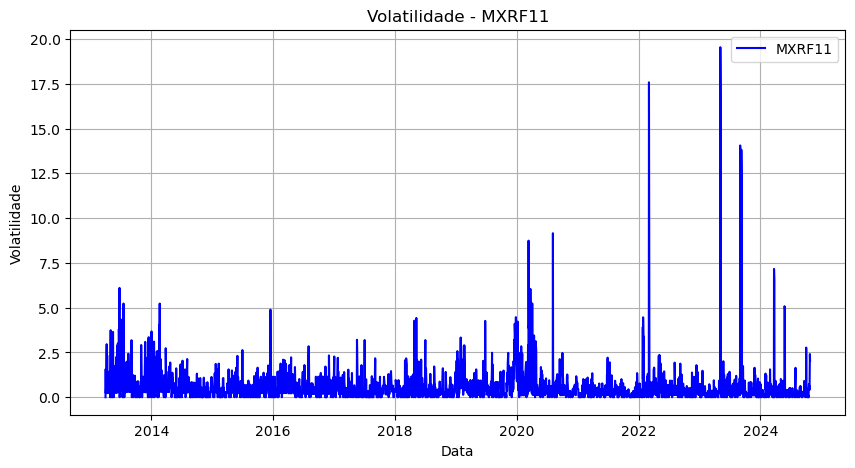

In [137]:
df_mxrf["Volatilidade"] = df_mxrf["Ultimo"].pct_change().abs() * 100
df_mxrf.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_mxrf.index, df_mxrf["Volatilidade"], label="MXRF11", color="b")
plt.title("Volatilidade - MXRF11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

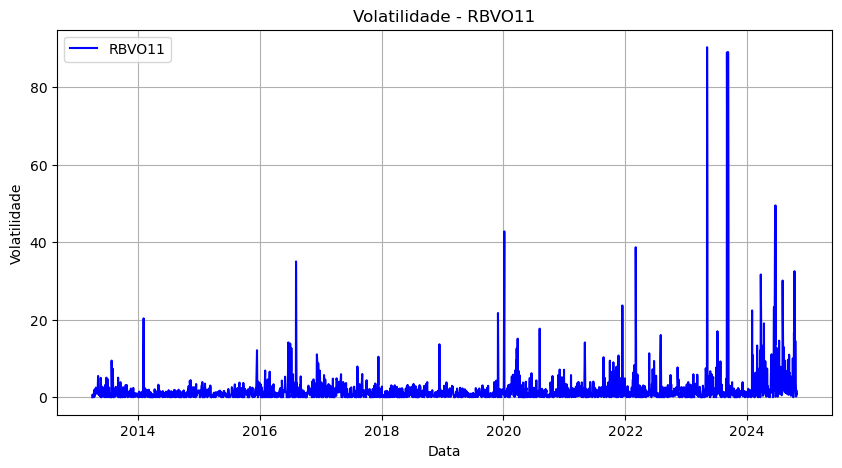

In [138]:
df_rbvo["Volatilidade"] = df_rbvo["Ultimo"].pct_change().abs() * 100
df_rbvo.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_rbvo.index, df_rbvo["Volatilidade"], label="RBVO11", color="b")
plt.title("Volatilidade - RBVO11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

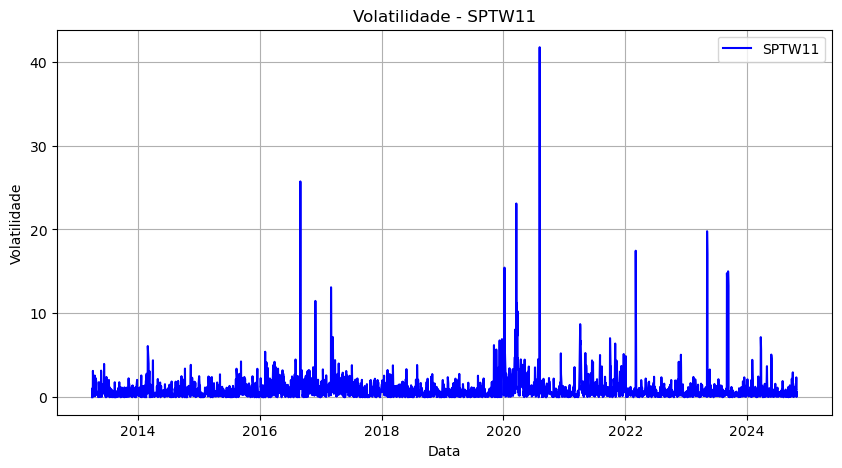

In [139]:
df_sptw["Volatilidade"] = df_sptw["Ultimo"].pct_change().abs() * 100
df_sptw.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_sptw.index, df_sptw["Volatilidade"], label="SPTW11", color="b")
plt.title("Volatilidade - SPTW11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

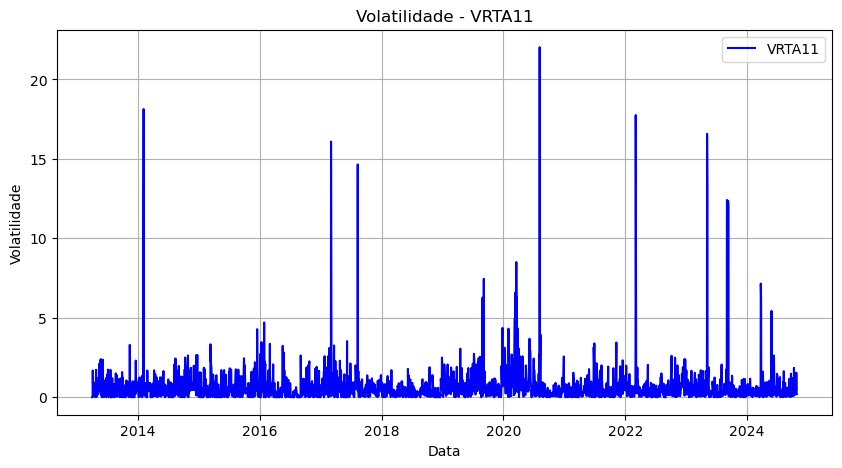

In [140]:
df_vrta["Volatilidade"] = df_vrta["Ultimo"].pct_change().abs() * 100
df_vrta.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_vrta.index, df_vrta["Volatilidade"], label="VRTA11", color="b")
plt.title("Volatilidade - VRTA11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

## Volatilidade intra-diária: Mede a diferença percentual entre a máxima e a mínima no mesmo dia

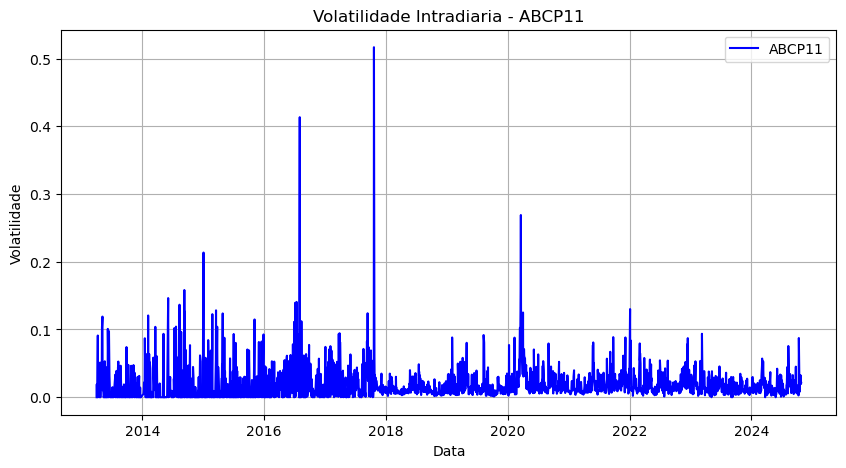

In [142]:
df_abcp["Volatilidade_Intradiaria"] = (df_abcp["Max"] - df_abcp["Min"]) / df_abcp["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_abcp.index, df_abcp["Volatilidade_Intradiaria"], label="ABCP11", color="b")
plt.title("Volatilidade Intradiaria - ABCP11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

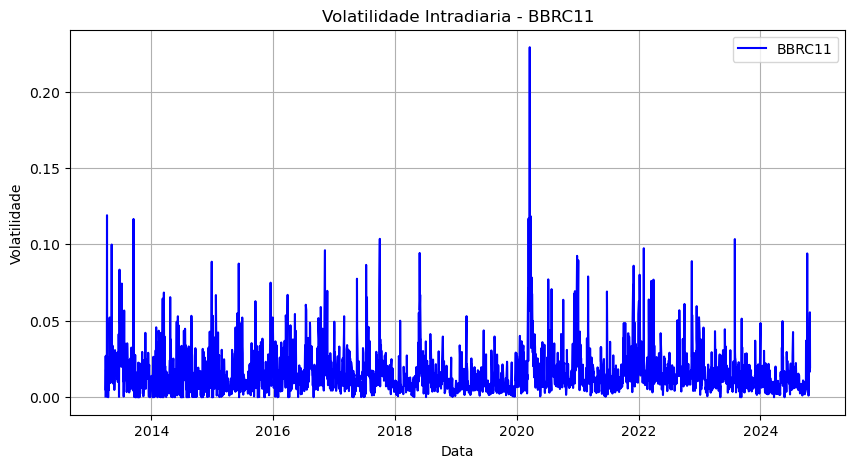

In [143]:
df_bbrc["Volatilidade_Intradiaria"] = (df_bbrc["Max"] - df_bbrc["Min"]) / df_bbrc["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_bbrc.index, df_bbrc["Volatilidade_Intradiaria"], label="BBRC11", color="b")
plt.title("Volatilidade Intradiaria - BBRC11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

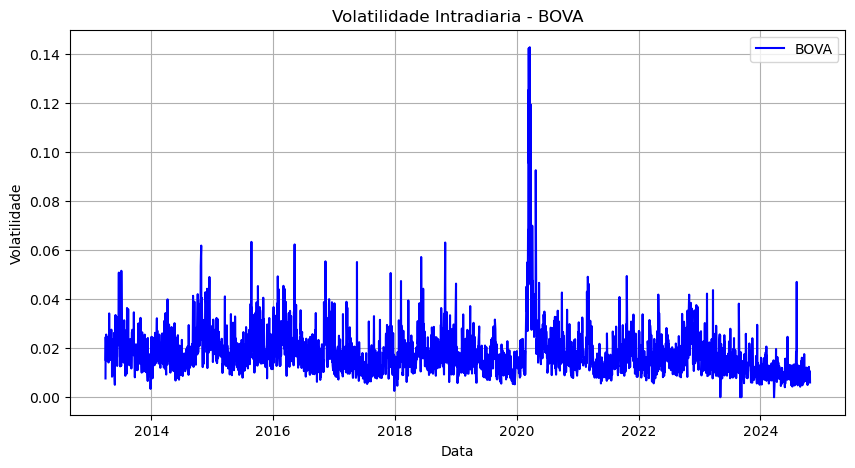

In [144]:
df_bova["Volatilidade_Intradiaria"] = (df_bova["Max"] - df_bova["Min"]) / df_bova["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_bova.index, df_bova["Volatilidade_Intradiaria"], label="BOVA", color="b")
plt.title("Volatilidade Intradiaria - BOVA")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

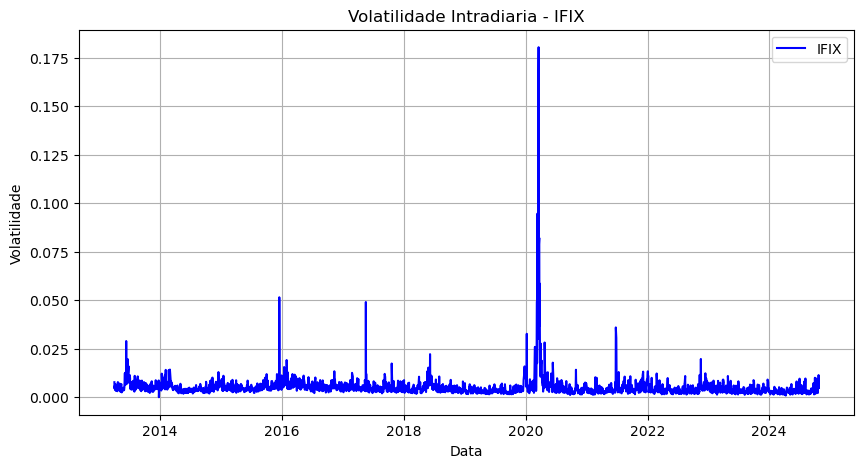

In [145]:
df_ifix["Volatilidade_Intradiaria"] = (df_ifix["Max"] - df_ifix["Min"]) / df_ifix["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_ifix.index, df_ifix["Volatilidade_Intradiaria"], label="IFIX", color="b")
plt.title("Volatilidade Intradiaria - IFIX")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

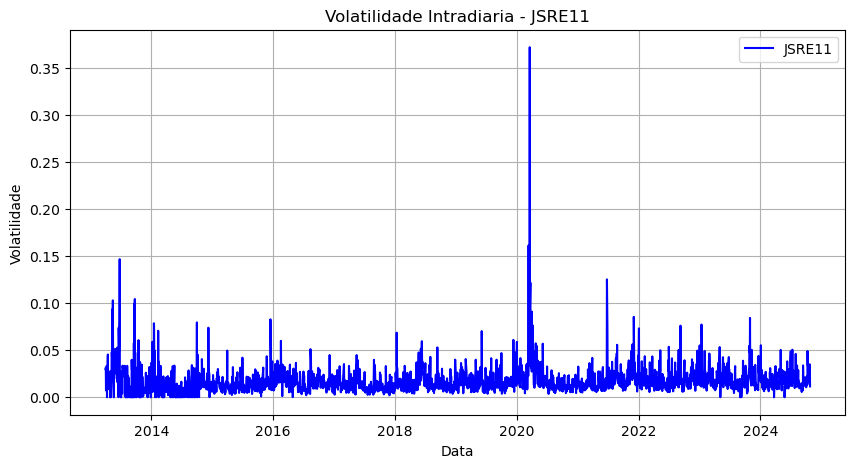

In [146]:
df_jsre["Volatilidade_Intradiaria"] = (df_jsre["Max"] - df_jsre["Min"]) / df_jsre["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_jsre.index, df_jsre["Volatilidade_Intradiaria"], label="JSRE11", color="b")
plt.title("Volatilidade Intradiaria - JSRE11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

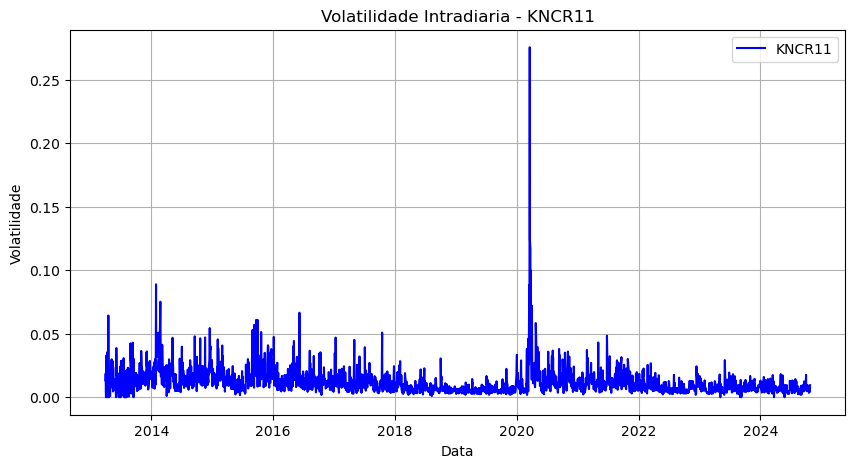

In [147]:
df_kncr["Volatilidade_Intradiaria"] = (df_kncr["Max"] - df_kncr["Min"]) / df_kncr["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_kncr.index, df_kncr["Volatilidade_Intradiaria"], label="KNCR11", color="b")
plt.title("Volatilidade Intradiaria - KNCR11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

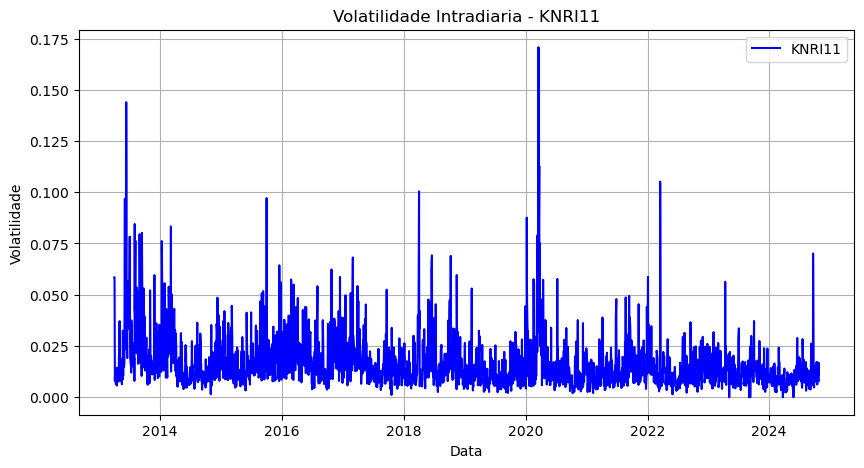

In [148]:
df_knri["Volatilidade_Intradiaria"] = (df_knri["Max"] - df_knri["Min"]) / df_knri["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_knri.index, df_knri["Volatilidade_Intradiaria"], label="KNRI11", color="b")
plt.title("Volatilidade Intradiaria - KNRI11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

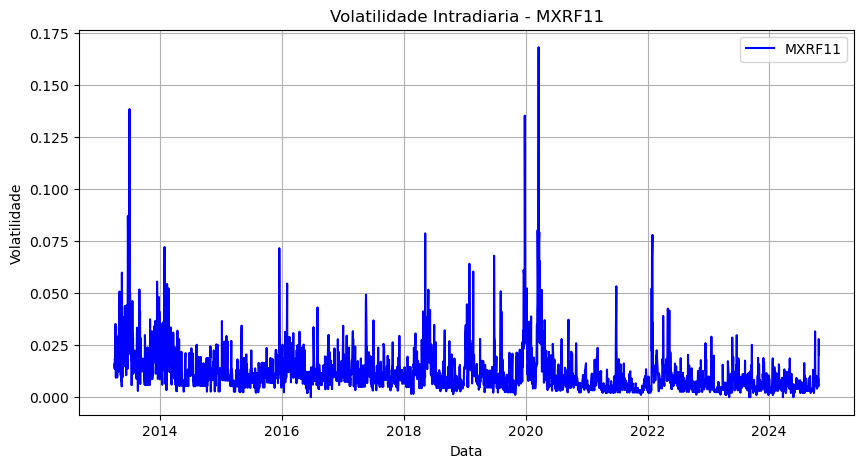

In [149]:
df_mxrf["Volatilidade_Intradiaria"] = (df_mxrf["Max"] - df_mxrf["Min"]) / df_mxrf["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_mxrf.index, df_mxrf["Volatilidade_Intradiaria"], label="MXRF11", color="b")
plt.title("Volatilidade Intradiaria - MXRF11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

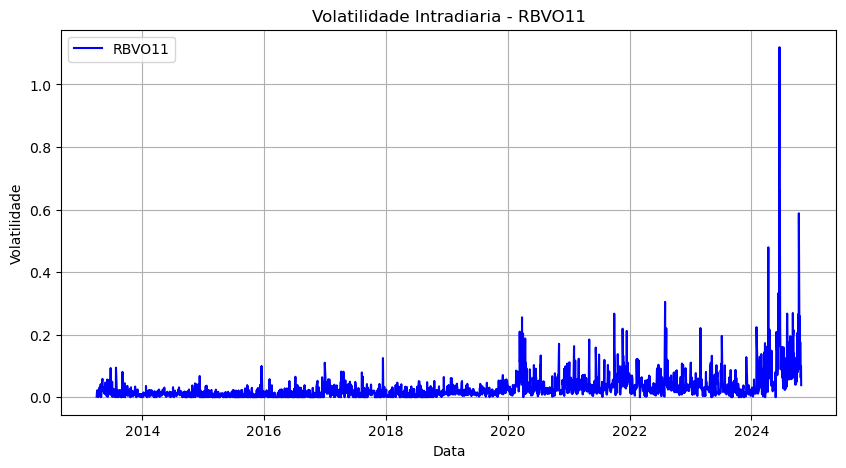

In [150]:
df_rbvo["Volatilidade_Intradiaria"] = (df_rbvo["Max"] - df_rbvo["Min"]) / df_rbvo["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_rbvo.index, df_rbvo["Volatilidade_Intradiaria"], label="RBVO11", color="b")
plt.title("Volatilidade Intradiaria - RBVO11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

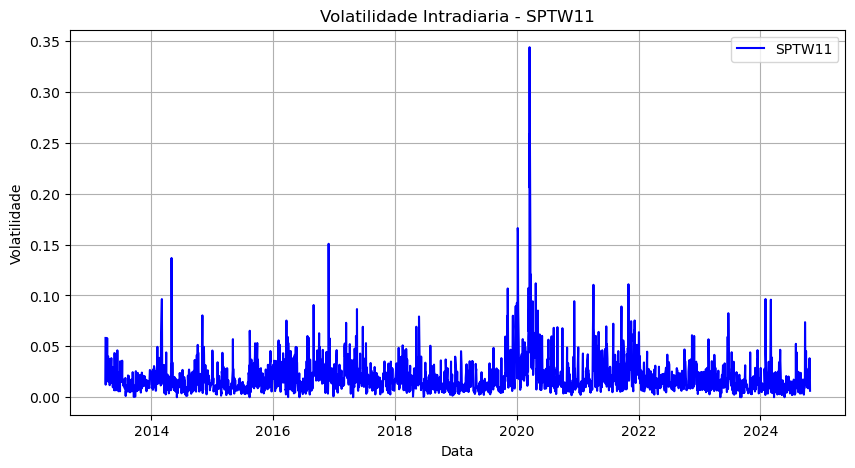

In [151]:
df_sptw["Volatilidade_Intradiaria"] = (df_sptw["Max"] - df_sptw["Min"]) / df_sptw["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_sptw.index, df_sptw["Volatilidade_Intradiaria"], label="SPTW11", color="b")
plt.title("Volatilidade Intradiaria - SPTW11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

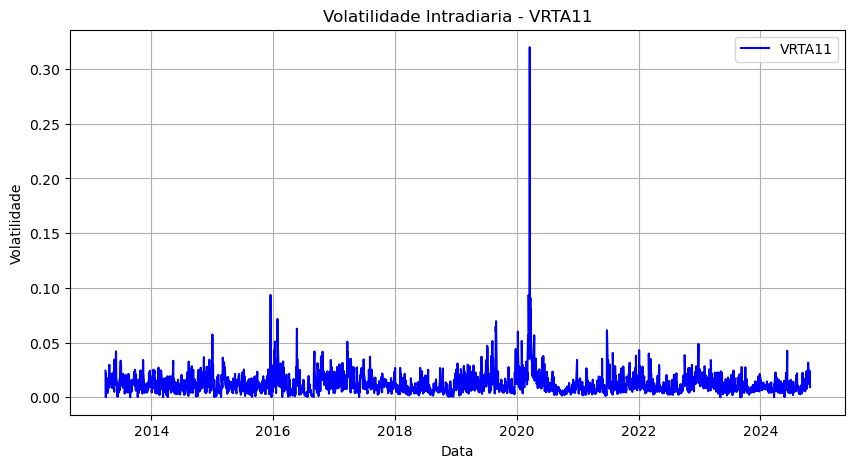

In [152]:
df_vrta["Volatilidade_Intradiaria"] = (df_vrta["Max"] - df_vrta["Min"]) / df_vrta["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_vrta.index, df_vrta["Volatilidade_Intradiaria"], label="VRTA11", color="b")
plt.title("Volatilidade Intradiaria - VRTA11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

## Decomposição

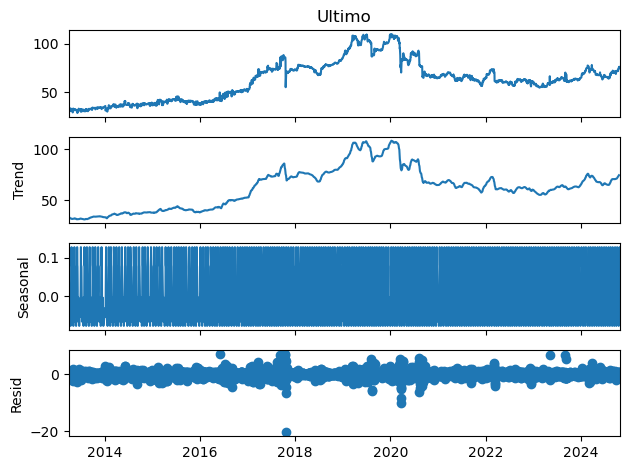

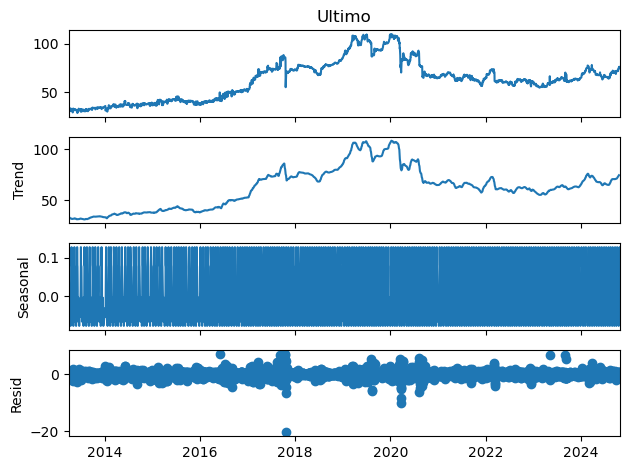

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_abcp["Ultimo"], model="additive", period=12)

# Visualizando os componentes
result.plot()

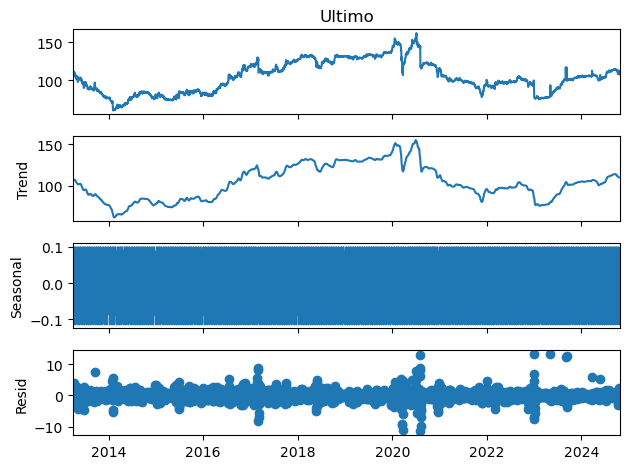

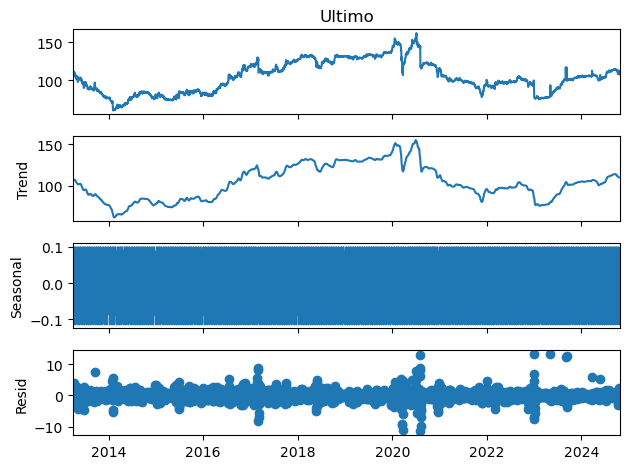

In [155]:
result = seasonal_decompose(df_bbrc["Ultimo"], model="additive", period=12)

result.plot()

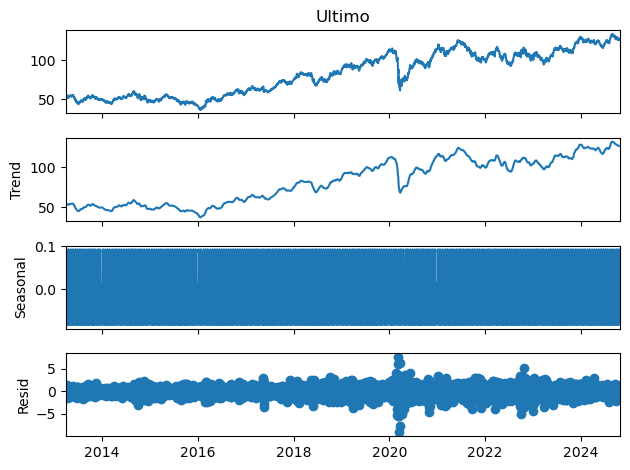

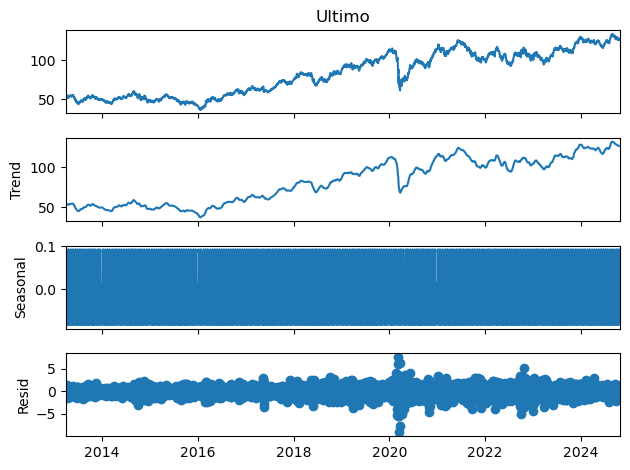

In [156]:
result = seasonal_decompose(df_bova["Ultimo"], model="additive", period=12)

result.plot()

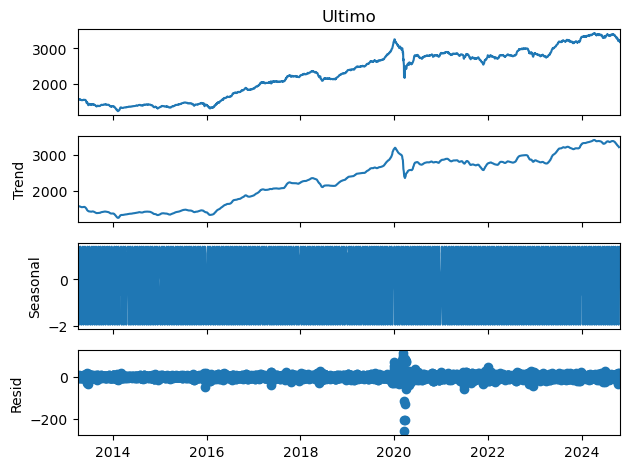

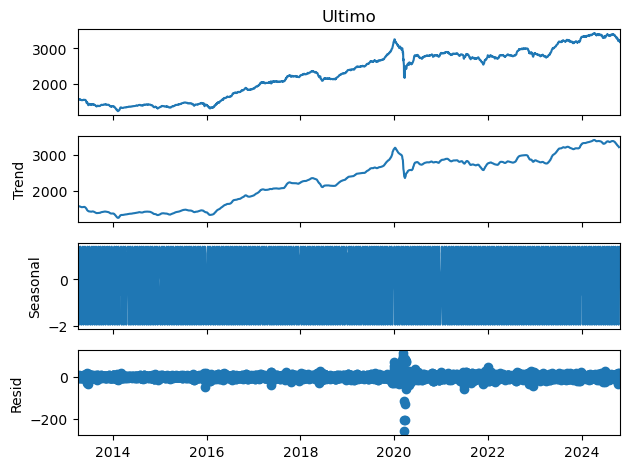

In [157]:
result = seasonal_decompose(df_ifix["Ultimo"], model="additive", period=12)

result.plot()

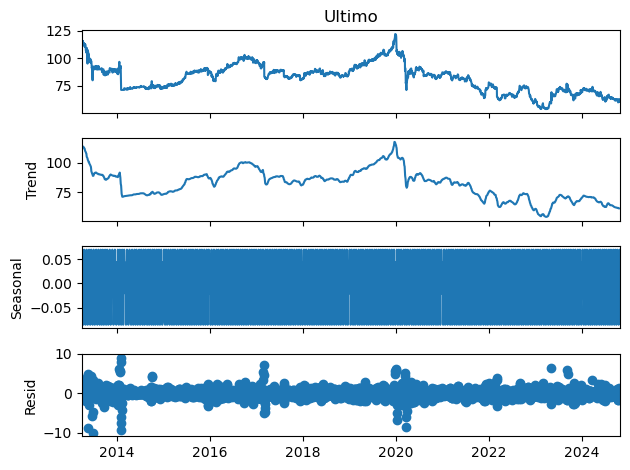

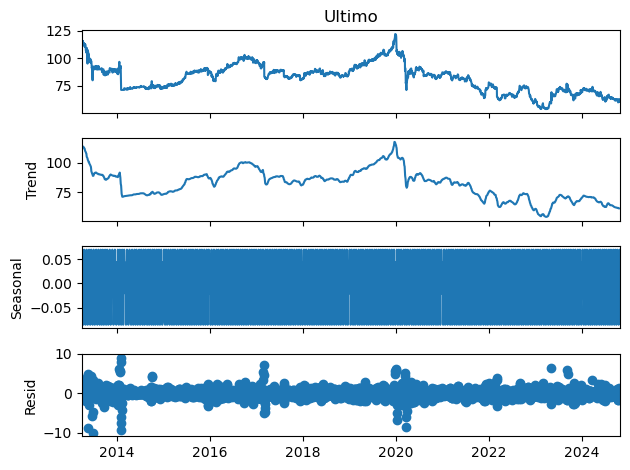

In [158]:
result = seasonal_decompose(df_jsre["Ultimo"], model="additive", period=12)

result.plot()

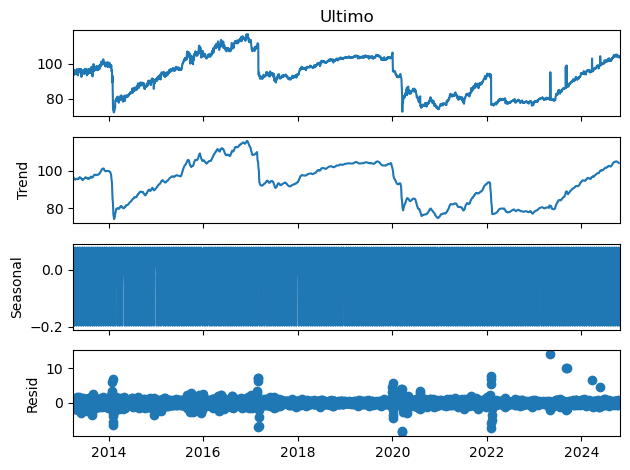

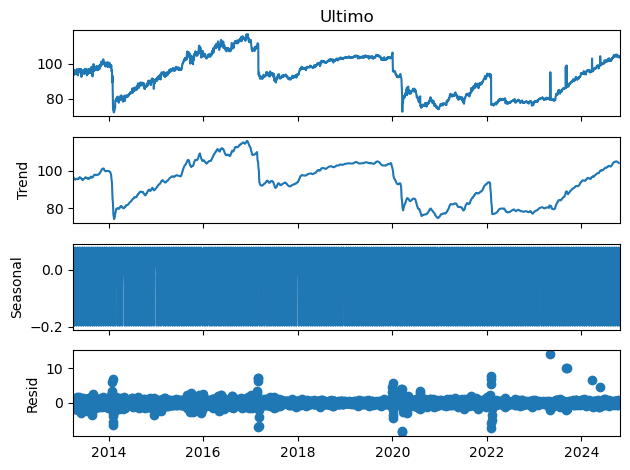

In [159]:
result = seasonal_decompose(df_kncr["Ultimo"], model="additive", period=12)

result.plot()

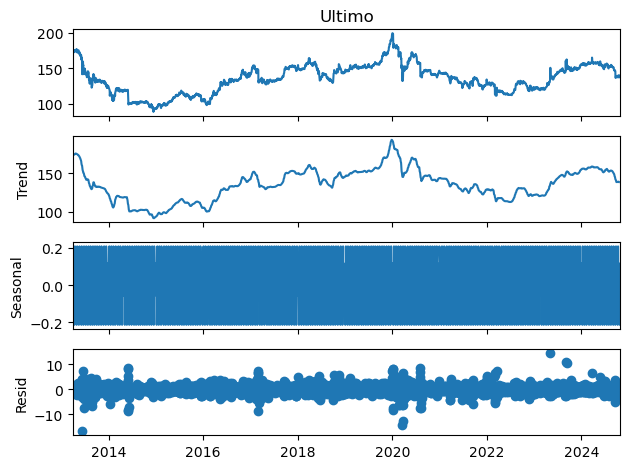

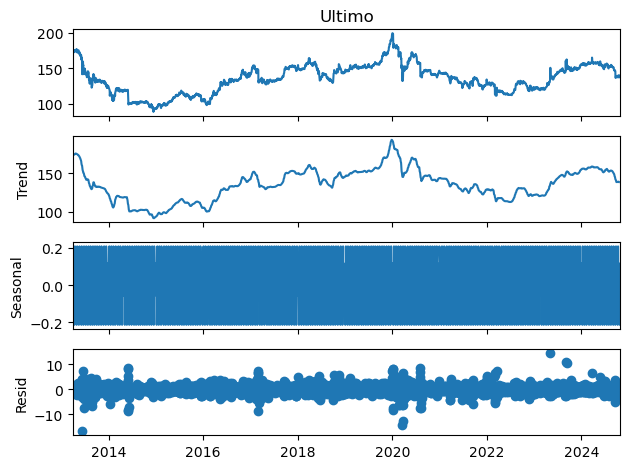

In [160]:
result = seasonal_decompose(df_knri["Ultimo"], model="additive", period=12)

result.plot()

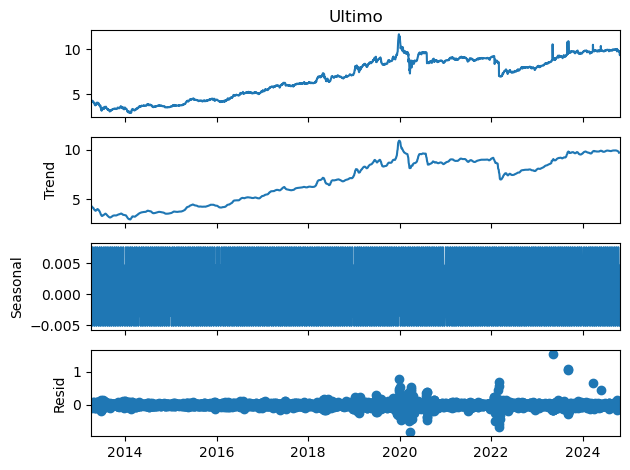

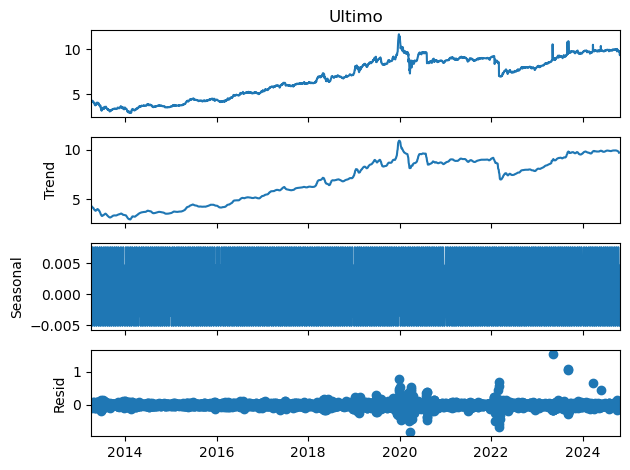

In [161]:
result = seasonal_decompose(df_mxrf["Ultimo"], model="additive", period=12)

result.plot()

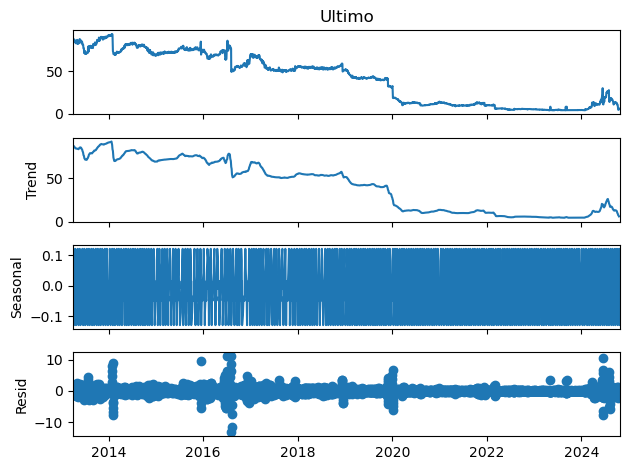

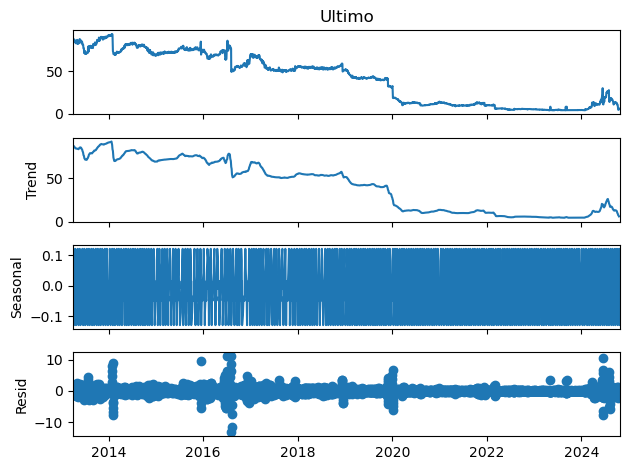

In [162]:
result = seasonal_decompose(df_rbvo["Ultimo"], model="additive", period=12)

result.plot()

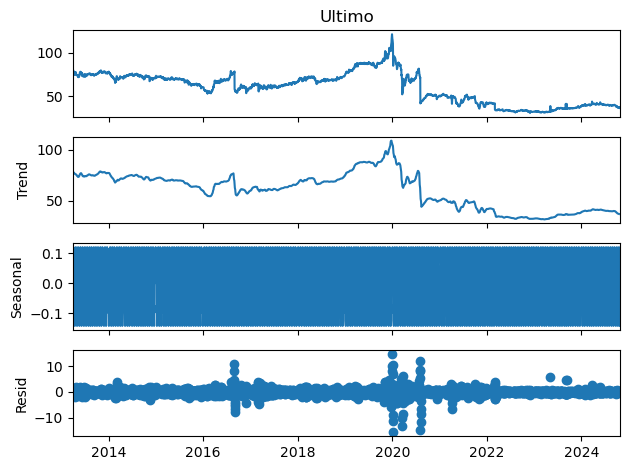

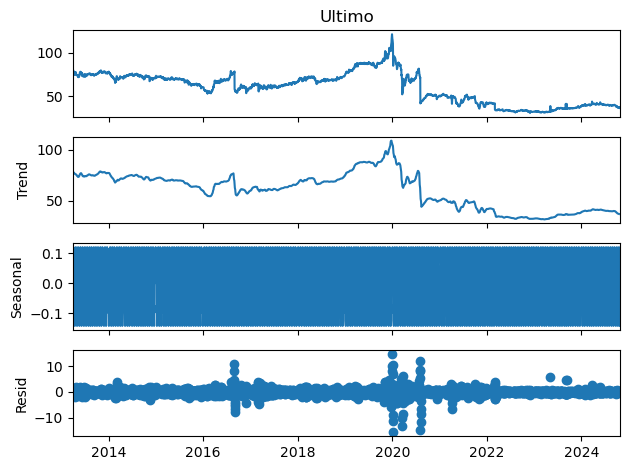

In [163]:
result = seasonal_decompose(df_sptw["Ultimo"], model="additive", period=12)

result.plot()

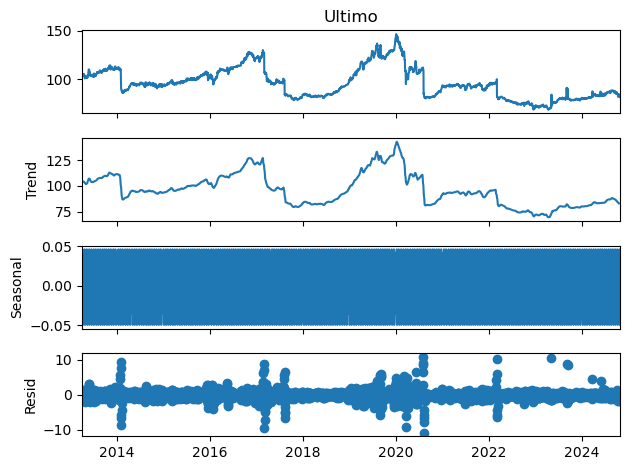

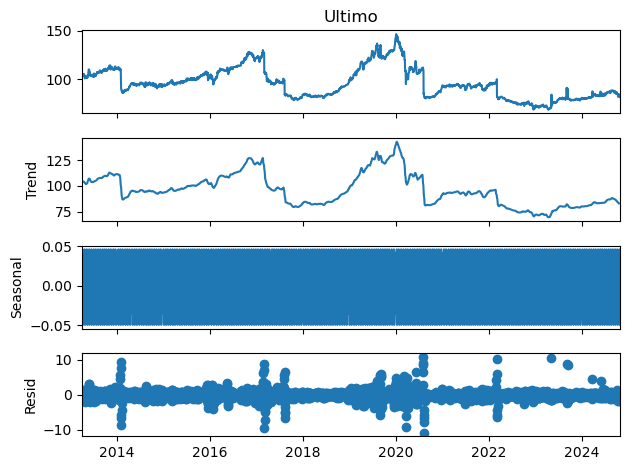

In [164]:
result = seasonal_decompose(df_vrta["Ultimo"], model="additive", period=12)

result.plot()

## Assimetria e curtose

2019 (Assimetria Positiva):
A distribuição tende a ter mais valores concentrados à esquerda da média.
Sugere que os preços estavam mais estáveis antes da pandemia, com picos positivos ocasionais.

2021 (Assimetria Negativa):
A distribuição tende a ter mais valores concentrados à direita da média.
Sugere que houve quedas acentuadas nos preços devido aos impactos da pandemia e possíveis incertezas econômicas.

Relação com a COVID-19:
O início da pandemia em 2020 gerou alta volatilidade e incertezas no mercado financeiro, o que pode ter causado mudanças nos padrões de preços em 2021.
A recuperação parcial ou total em setores específicos pode ser analisada por meio da redução da assimetria ao longo do tempo.

In [167]:
from scipy.stats import skew, kurtosis
#Curtose (Kurtosis): Mede a "pontiagudez" da distribuição.
#
#Curtose alta: Distribuição com caudas mais pesadas (leptocúrtica).
#Curtose baixa: Distribuição com caudas mais leves (platicúrtica).
#Curtose próxima de 3: Distribuição normal (mesocúrtica).
###
#Assimetria (Skewness): Mede a simetria da distribuição.
#
#Assimetria positiva: A cauda direita é mais longa (distribuição enviesada para a direita).
#Assimetria negativa: A cauda esquerda é mais longa (distribuição enviesada para a esquerda).

In [168]:
assimetria_abcp = skew(df_abcp["Ultimo"])
curtose_abcp = kurtosis(df_abcp["Ultimo"])

print(f"Assimetria (Skewness): {assimetria_abcp:.2f}")
print(f"Curtose (Kurtosis): {curtose_abcp:.2f}")

Assimetria (Skewness): 0.25
Curtose (Kurtosis): -0.42


In [169]:
# Calcular assimetria e curtose por ano
metrics = df_abcp.groupby(df_abcp.index.year)["Ultimo"].agg([
    ("Assimetria", lambda x: skew(x)),
    ("Curtose", lambda x: kurtosis(x))
])

print(metrics)

      Assimetria   Curtose
Data                      
2013   -0.369841 -0.706998
2014   -0.828376  1.199742
2015   -0.055884 -0.349449
2016   -0.026166 -1.575461
2017   -0.417637  0.691690
2018   -0.422667  0.141644
2019   -0.088851 -1.113216
2020    0.404280 -1.015706
2021   -0.452143 -0.269119
2022    1.312318  0.989337
2023   -0.262892 -0.699801
2024    0.215016 -0.815954


In [170]:
dados_2019_abcp = df_abcp.loc["2019", "Ultimo"]
dados_2021_abcp = df_abcp.loc["2021", "Ultimo"]

assimetria_2019_abcp = skew(dados_2019_abcp, nan_policy="omit")

assimetria_2021_abcp = skew(dados_2021_abcp, nan_policy="omit")

print(f"Assimetria ABCP11 2019: {assimetria_2019_abcp}")
print(f"Assimetria ABCP11 2021: {assimetria_2021_abcp}")

Assimetria ABCP11 2019: -0.0888511302035479
Assimetria ABCP11 2021: -0.4521434711645278


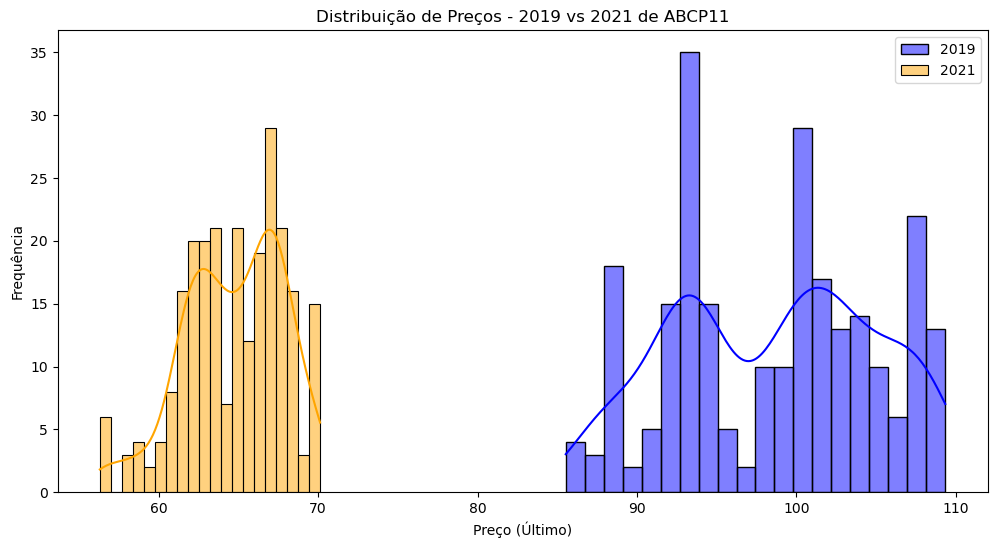

In [171]:
plt.figure(figsize=(12, 6))

sns.histplot(dados_2019_abcp, kde=True, color="blue", label="2019", bins=20)

sns.histplot(dados_2021_abcp, kde=True, color="orange", label="2021", bins=20)

plt.title("Distribuição de Preços - 2019 vs 2021 de ABCP11")
plt.xlabel("Preço (Último)")
plt.ylabel("Frequência")
plt.legend()
plt.show()

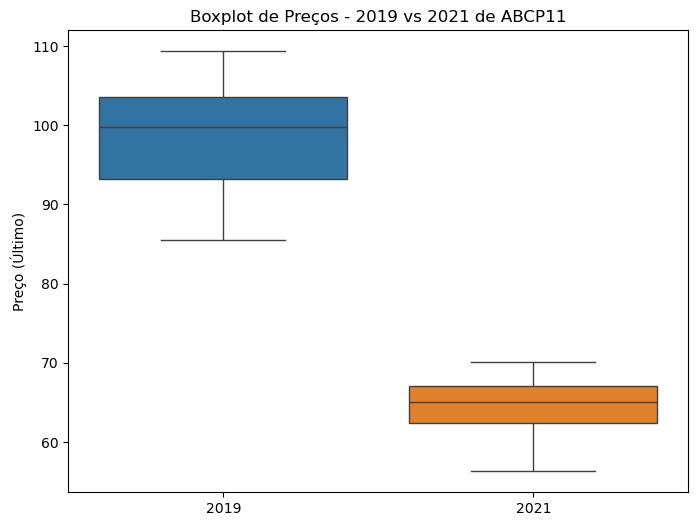

In [172]:
plt.figure(figsize=(8, 6))

dados_comparacao = pd.DataFrame({
    "2019": dados_2019_abcp,
    "2021": dados_2021_abcp
})

sns.boxplot(data=dados_comparacao)
plt.title("Boxplot de Preços - 2019 vs 2021 de ABCP11")
plt.ylabel("Preço (Último)")
plt.show()

In [173]:
assimetria_bbrc = skew(df_bbrc["Ultimo"])
curtose_bbrc = kurtosis(df_bbrc["Ultimo"])

print(f"Assimetria BBRC11 (Skewness): {assimetria_bbrc:.2f}")
print(f"Curtose BBRC11 (Kurtosis): {curtose_bbrc:.2f}")

Assimetria BBRC11 (Skewness): 0.23
Curtose BBRC11 (Kurtosis): -0.77


In [174]:
# Calcular assimetria e curtose por ano
metrics = df_bbrc.groupby(df_bbrc.index.year)["Ultimo"].agg([
    ("Assimetria", lambda x: skew(x)),
    ("Curtose", lambda x: kurtosis(x))
])

print(metrics)

      Assimetria   Curtose
Data                      
2013    0.176473 -0.944914
2014   -0.357024 -1.177243
2015   -0.177354 -1.236354
2016    0.074054 -1.243204
2017    0.253393 -1.365961
2018   -0.828622 -0.418453
2019    0.681093 -0.149449
2020    0.042182 -1.422590
2021   -0.704061  1.004588
2022    0.001141 -0.227266
2023    0.075783 -1.542965
2024    0.266561 -1.034283


In [175]:
dados_2019_bbrc = df_bbrc.loc["2019", "Ultimo"]
dados_2021_bbrc = df_bbrc.loc["2021", "Ultimo"]

assimetria_2019_bbrc = skew(dados_2019_bbrc, nan_policy="omit")

assimetria_2021_bbrc = skew(dados_2021_bbrc, nan_policy="omit")

print(f"Assimetria 2019: {assimetria_2019_bbrc}")
print(f"Assimetria 2021: {assimetria_2021_bbrc}")

Assimetria 2019: 0.6810926320059657
Assimetria 2021: -0.7040608567571834


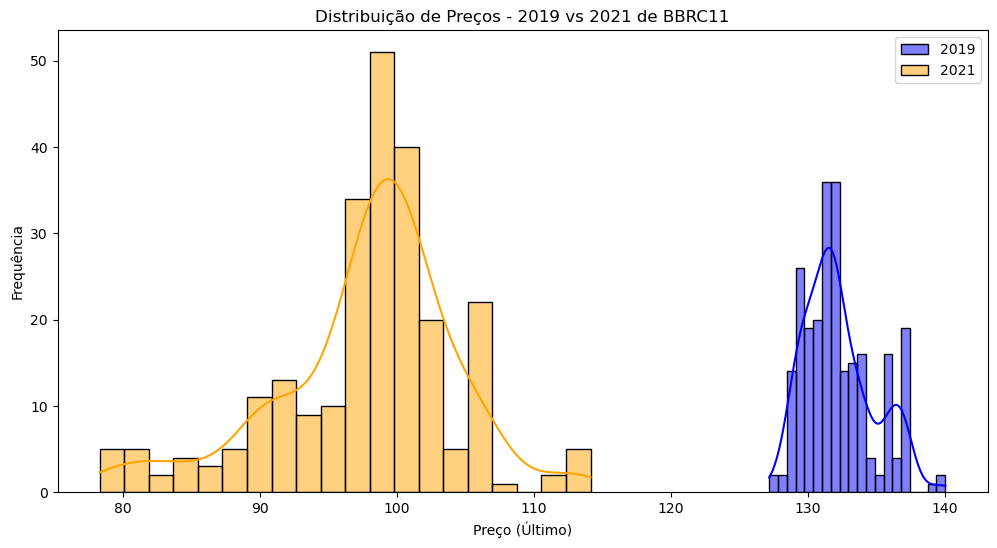

In [176]:
plt.figure(figsize=(12, 6))

sns.histplot(dados_2019_bbrc, kde=True, color="blue", label="2019", bins=20)

sns.histplot(dados_2021_bbrc, kde=True, color="orange", label="2021", bins=20)

plt.title("Distribuição de Preços - 2019 vs 2021 de BBRC11")
plt.xlabel("Preço (Último)")
plt.ylabel("Frequência")
plt.legend()
plt.show()

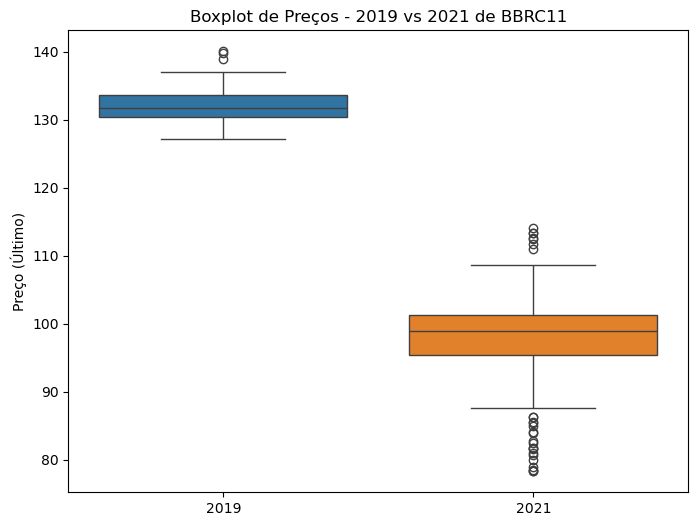

In [177]:
plt.figure(figsize=(8, 6))

dados_comparacao = pd.DataFrame({
    "2019": dados_2019_bbrc,
    "2021": dados_2021_bbrc
})

sns.boxplot(data=dados_comparacao)
plt.title("Boxplot de Preços - 2019 vs 2021 de BBRC11")
plt.ylabel("Preço (Último)")
plt.show()

In [178]:
assimetria_bova = skew(df_bova["Ultimo"])
curtose_bova = kurtosis(df_bova["Ultimo"])

print(f"Assimetria BOVA (Skewness): {assimetria_bova:.2f}")
print(f"Curtose BOVA (Kurtosis): {curtose_bova:.2f}")

Assimetria BOVA (Skewness): 0.02
Curtose BOVA (Kurtosis): -1.46


In [179]:
# Calcular assimetria e curtose por ano
metrics = df_bova.groupby(df_bova.index.year)["Ultimo"].agg([
    ("Assimetria", lambda x: skew(x)),
    ("Curtose", lambda x: kurtosis(x))
])

print(metrics)

      Assimetria   Curtose
Data                      
2013   -0.518702 -0.594290
2014    0.126817 -0.658971
2015    0.304522 -0.841748
2016   -0.577969 -0.556985
2017    0.414543 -1.242316
2018   -0.531783 -0.745074
2019    0.552745 -0.258194
2020   -0.469924 -0.538624
2021   -0.201109 -0.882773
2022   -0.423712 -0.403179
2023    0.240235 -0.334154
2024    0.024500 -0.087460


In [180]:
dados_2019_bova = df_bova.loc["2019", "Ultimo"]
dados_2021_bova = df_bova.loc["2021", "Ultimo"]

assimetria_2019_bova = skew(dados_2019_bova, nan_policy="omit")

assimetria_2021_bova = skew(dados_2021_bova, nan_policy="omit")

print(f"Assimetria BOVA 2019: {assimetria_2019_bova}")
print(f"Assimetria BOVA 2021: {assimetria_2021_bova}")

Assimetria BOVA 2019: 0.5527453714045488
Assimetria BOVA 2021: -0.2011087576996216


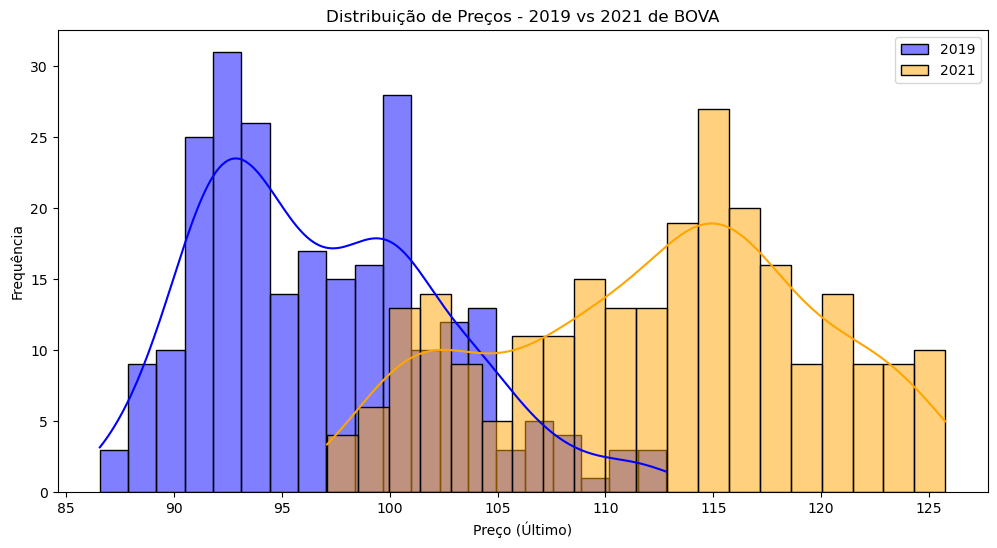

In [181]:
plt.figure(figsize=(12, 6))

sns.histplot(dados_2019_bova, kde=True, color="blue", label="2019", bins=20)

sns.histplot(dados_2021_bova, kde=True, color="orange", label="2021", bins=20)

plt.title("Distribuição de Preços - 2019 vs 2021 de BOVA")
plt.xlabel("Preço (Último)")
plt.ylabel("Frequência")
plt.legend()
plt.show()

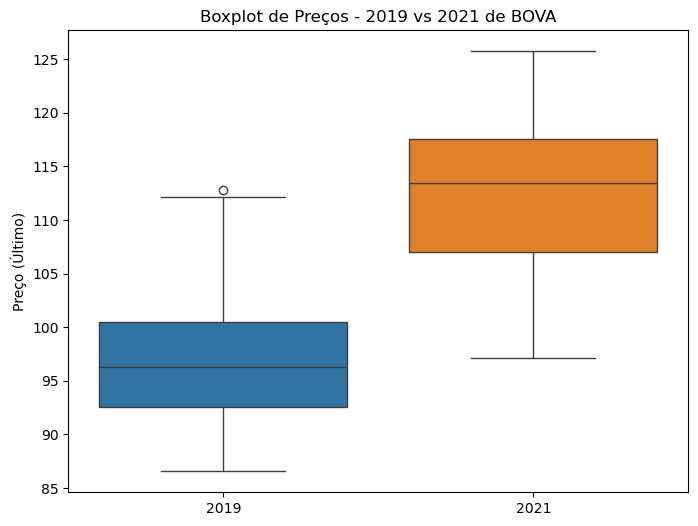

In [182]:
plt.figure(figsize=(8, 6))

dados_comparacao = pd.DataFrame({
    "2019": dados_2019_bova,
    "2021": dados_2021_bova
})

sns.boxplot(data=dados_comparacao)
plt.title("Boxplot de Preços - 2019 vs 2021 de BOVA")
plt.ylabel("Preço (Último)")
plt.show()

In [183]:
assimetria_ifix = skew(df_ifix["Ultimo"])
curtose_ifix = kurtosis(df_ifix["Ultimo"])

print(f"Assimetria IFIX (Skewness): {assimetria_ifix:.2f}")
print(f"Curtose IFIX (Kurtosis): {curtose_ifix:.2f}")

Assimetria IFIX (Skewness): -0.13
Curtose IFIX (Kurtosis): -1.35


In [184]:
# Calcular assimetria e curtose por ano
metrics = df_ifix.groupby(df_ifix.index.year)["Ultimo"].agg([
    ("Assimetria", lambda x: skew(x)),
    ("Curtose", lambda x: kurtosis(x))
])

print(metrics)

      Assimetria   Curtose
Data                      
2013    0.842546 -0.836378
2014   -0.811853  0.366586
2015   -0.269123 -1.154174
2016   -0.366741 -1.224723
2017    0.000653 -0.714404
2018   -0.089516 -1.428724
2019    0.898846  0.579671
2020   -0.066169  1.019048
2021   -0.718177 -0.227678
2022    0.701839 -0.847727
2023   -0.386957 -1.580897
2024   -1.391570  2.201985


In [185]:
dados_2019_ifix = df_ifix.loc["2019", "Ultimo"]
dados_2021_ifix = df_ifix.loc["2021", "Ultimo"]

assimetria_2019_ifix = skew(dados_2019_ifix, nan_policy="omit")

assimetria_2021_ifix = skew(dados_2021_ifix, nan_policy="omit")

print(f"Assimetria IFIX 2019: {assimetria_2019_ifix}")
print(f"Assimetria IFIX 2021: {assimetria_2021_ifix}")

Assimetria IFIX 2019: 0.8988455816891063
Assimetria IFIX 2021: -0.7181772963319294


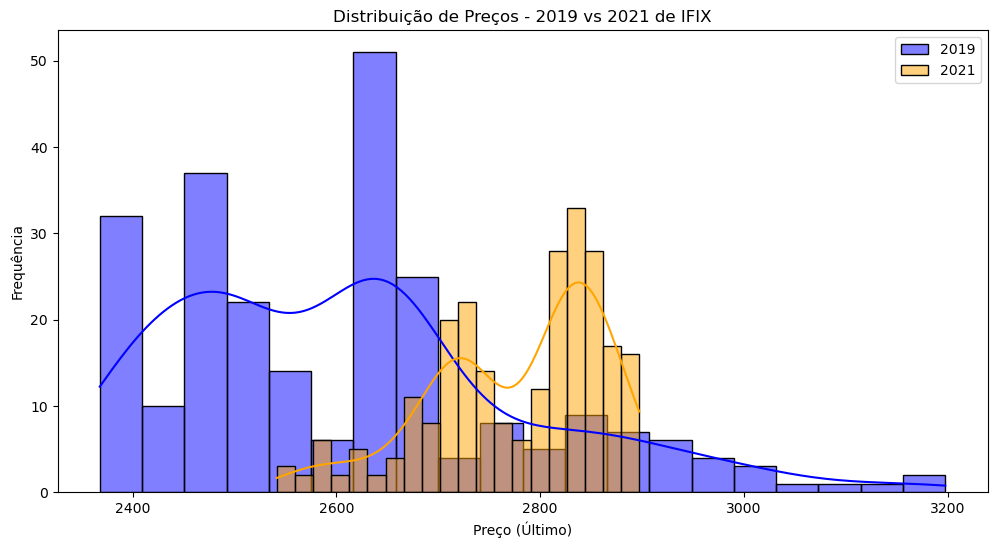

In [186]:
plt.figure(figsize=(12, 6))

sns.histplot(dados_2019_ifix, kde=True, color="blue", label="2019", bins=20)

sns.histplot(dados_2021_ifix, kde=True, color="orange", label="2021", bins=20)

plt.title("Distribuição de Preços - 2019 vs 2021 de IFIX")
plt.xlabel("Preço (Último)")
plt.ylabel("Frequência")
plt.legend()
plt.show()

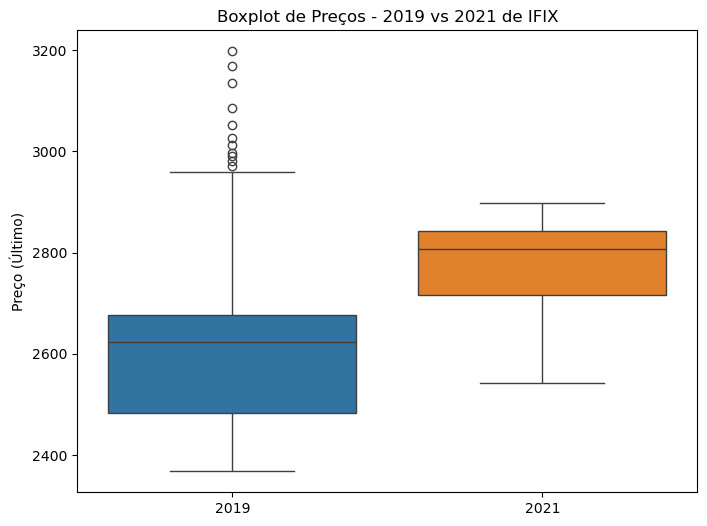

In [187]:
plt.figure(figsize=(8, 6))

dados_comparacao = pd.DataFrame({
    "2019": dados_2019_ifix,
    "2021": dados_2021_ifix
})

sns.boxplot(data=dados_comparacao)
plt.title("Boxplot de Preços - 2019 vs 2021 de IFIX")
plt.ylabel("Preço (Último)")
plt.show()

In [188]:
assimetria_jsre = skew(df_jsre["Ultimo"])
curtose_jsre = kurtosis(df_jsre["Ultimo"])

print(f"Assimetria JSRE11 (Skewness): {assimetria_jsre:.2f}")
print(f"Curtose JSRE11 (Kurtosis): {curtose_jsre:.2f}")

Assimetria JSRE11 (Skewness): 0.09
Curtose JSRE11 (Kurtosis): -0.34


In [189]:
# Calcular assimetria e curtose por ano
metrics = df_jsre.groupby(df_jsre.index.year)["Ultimo"].agg([
    ("Assimetria", lambda x: skew(x)),
    ("Curtose", lambda x: kurtosis(x))
])

print(metrics)

      Assimetria   Curtose
Data                      
2013    1.210717  0.177851
2014    2.697895  6.198247
2015   -0.184686 -1.625791
2016   -0.544770 -0.720825
2017    0.831904 -0.036921
2018   -0.020387 -0.127545
2019    0.688953  0.424500
2020    1.244613  1.069363
2021   -0.561670 -0.731051
2022    0.066367 -1.172678
2023   -0.436620 -1.227660
2024    0.128393 -1.418646


In [190]:
dados_2019_jsre = df_jsre.loc["2019", "Ultimo"]
dados_2021_jsre = df_jsre.loc["2021", "Ultimo"]

assimetria_2019_jsre = skew(dados_2019_jsre, nan_policy="omit")

assimetria_2021_jsre = skew(dados_2021_jsre, nan_policy="omit")

print(f"Assimetria JSRE11 2019: {assimetria_2019_jsre}")
print(f"Assimetria JSRE11 2021: {assimetria_2021_jsre}")

Assimetria JSRE11 2019: 0.6889530958871062
Assimetria JSRE11 2021: -0.5616702715907959


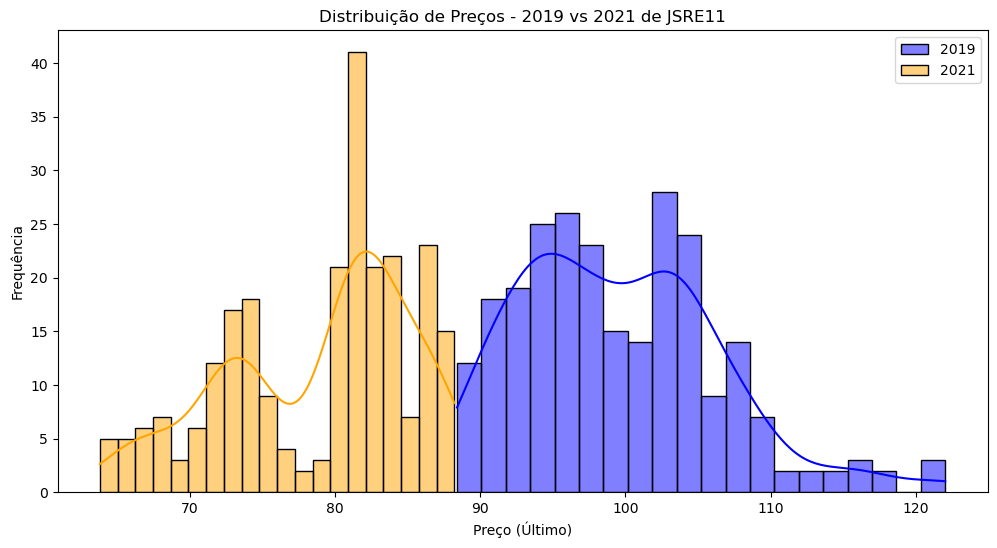

In [191]:
plt.figure(figsize=(12, 6))

sns.histplot(dados_2019_jsre, kde=True, color="blue", label="2019", bins=20)

sns.histplot(dados_2021_jsre, kde=True, color="orange", label="2021", bins=20)

plt.title("Distribuição de Preços - 2019 vs 2021 de JSRE11")
plt.xlabel("Preço (Último)")
plt.ylabel("Frequência")
plt.legend()
plt.show()

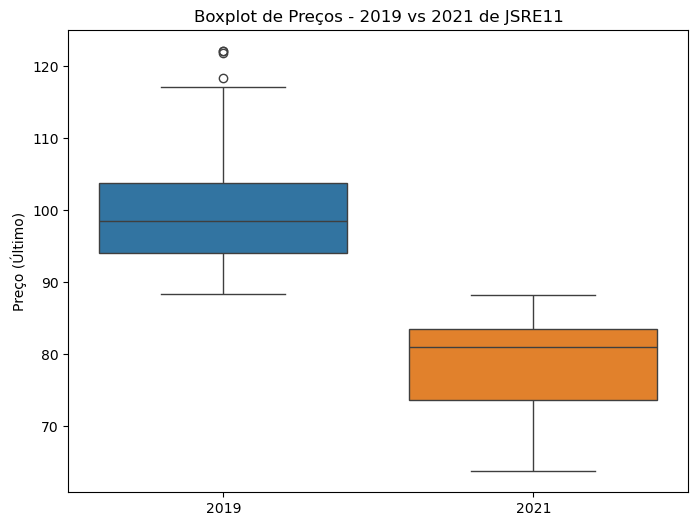

In [192]:
plt.figure(figsize=(8, 6))

dados_comparacao = pd.DataFrame({
    "2019": dados_2019_jsre,
    "2021": dados_2021_jsre
})

sns.boxplot(data=dados_comparacao)
plt.title("Boxplot de Preços - 2019 vs 2021 de JSRE11")
plt.ylabel("Preço (Último)")
plt.show()

In [193]:
assimetria_kncr = skew(df_kncr["Ultimo"])
curtose_kncr = kurtosis(df_kncr["Ultimo"])

print(f"Assimetria KNCR11 (Skewness): {assimetria_kncr:.2f}")
print(f"Curtose KNCR11 (Kurtosis): {curtose_kncr:.2f}")

Assimetria KNCR11 (Skewness): -0.04
Curtose KNCR11 (Kurtosis): -1.08


In [194]:
# Calcular assimetria e curtose por ano
metrics = df_kncr.groupby(df_kncr.index.year)["Ultimo"].agg([
    ("Assimetria", lambda x: skew(x)),
    ("Curtose", lambda x: kurtosis(x))
])

print(metrics)

      Assimetria   Curtose
Data                      
2013    0.373486 -0.394930
2014    0.301572  0.249652
2015    0.279372 -1.115239
2016   -0.219955 -0.922346
2017    1.724166  1.240811
2018   -0.433549 -0.691417
2019   -0.378492  0.009210
2020    0.903370  0.049983
2021    0.466891 -0.741863
2022    2.636343  5.392209
2023    0.574149 -0.867102
2024   -0.011387 -1.389698


In [195]:
dados_2019_kncr = df_kncr.loc["2019", "Ultimo"]
dados_2021_kncr = df_kncr.loc["2021", "Ultimo"]

assimetria_2019_kncr = skew(dados_2019_kncr, nan_policy="omit")

assimetria_2021_kncr = skew(dados_2021_kncr, nan_policy="omit")

print(f"Assimetria KNCR11 2019: {assimetria_2019_kncr}")
print(f"Assimetria KNCR11 2021: {assimetria_2021_kncr}")

Assimetria KNCR11 2019: -0.37849238129475793
Assimetria KNCR11 2021: 0.4668905373976805


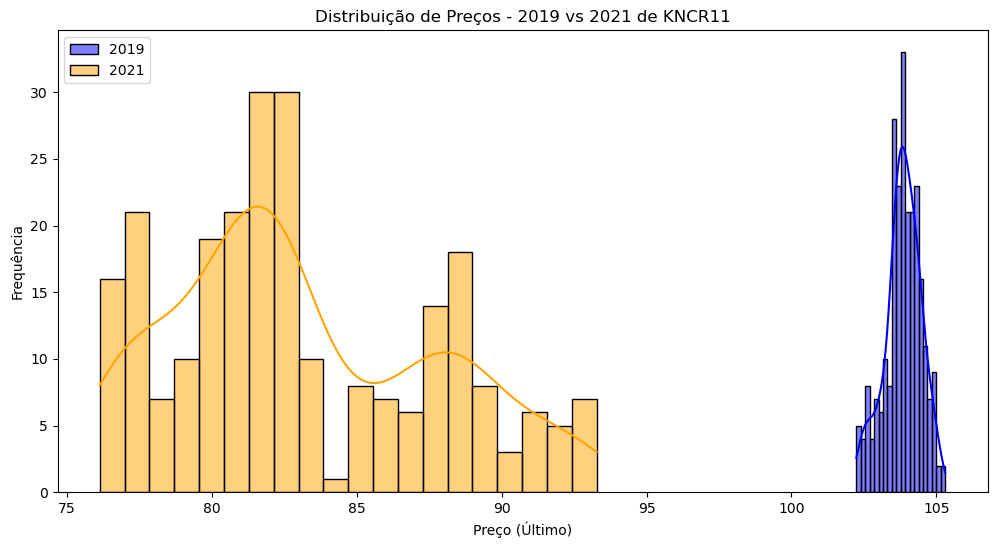

In [196]:
plt.figure(figsize=(12, 6))

sns.histplot(dados_2019_kncr, kde=True, color="blue", label="2019", bins=20)

sns.histplot(dados_2021_kncr, kde=True, color="orange", label="2021", bins=20)

plt.title("Distribuição de Preços - 2019 vs 2021 de KNCR11")
plt.xlabel("Preço (Último)")
plt.ylabel("Frequência")
plt.legend()
plt.show()

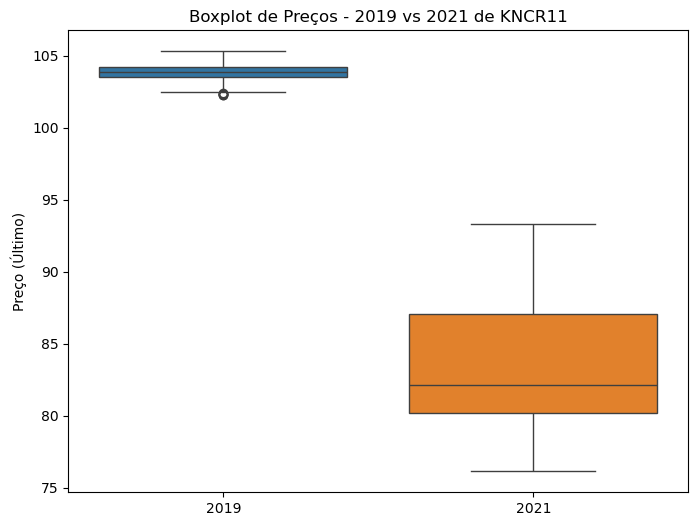

In [197]:
plt.figure(figsize=(8, 6))

dados_comparacao = pd.DataFrame({
    "2019": dados_2019_kncr,
    "2021": dados_2021_kncr
})

sns.boxplot(data=dados_comparacao)
plt.title("Boxplot de Preços - 2019 vs 2021 de KNCR11")
plt.ylabel("Preço (Último)")
plt.show()

In [198]:
assimetria_knri = skew(df_knri["Ultimo"])
curtose_knri = kurtosis(df_knri["Ultimo"])

print(f"Assimetria KNRI11 (Skewness): {assimetria_knri:.2f}")
print(f"Curtose KNRI11 (Kurtosis): {curtose_knri:.2f}")

Assimetria KNRI11 (Skewness): -0.04
Curtose KNRI11 (Kurtosis): -0.38


In [199]:
# Calcular assimetria e curtose por ano
metrics = df_knri.groupby(df_knri.index.year)["Ultimo"].agg([
    ("Assimetria", lambda x: skew(x)),
    ("Curtose", lambda x: kurtosis(x))
])

print(metrics)

      Assimetria   Curtose
Data                      
2013    0.742045 -1.039421
2014    0.332628 -1.231275
2015   -0.453778 -1.064777
2016   -0.557598 -0.874472
2017    0.218272 -1.674357
2018   -0.108224 -0.818428
2019    1.656701  2.199671
2020    0.668269 -0.423495
2021    0.196368 -0.935501
2022   -0.004732 -1.510378
2023   -0.421160 -1.366674
2024   -1.457777  1.164538


In [200]:
dados_2019_knri = df_knri.loc["2019", "Ultimo"]
dados_2021_knri = df_knri.loc["2021", "Ultimo"]

assimetria_2019_knri = skew(dados_2019_knri, nan_policy="omit")

assimetria_2021_knri = skew(dados_2021_knri, nan_policy="omit")

print(f"Assimetria KNRI11 2019: {assimetria_2019_knri}")
print(f"Assimetria KNRI11 2021: {assimetria_2021_knri}")

Assimetria KNRI11 2019: 1.6567008175053093
Assimetria KNRI11 2021: 0.19636821268625076


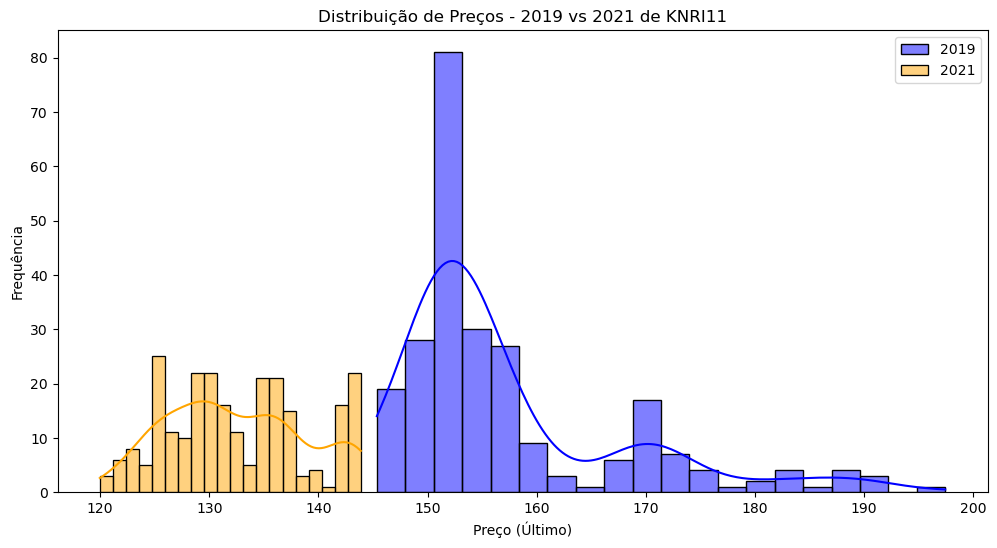

In [201]:
plt.figure(figsize=(12, 6))

sns.histplot(dados_2019_knri, kde=True, color="blue", label="2019", bins=20)

sns.histplot(dados_2021_knri, kde=True, color="orange", label="2021", bins=20)

plt.title("Distribuição de Preços - 2019 vs 2021 de KNRI11")
plt.xlabel("Preço (Último)")
plt.ylabel("Frequência")
plt.legend()
plt.show()

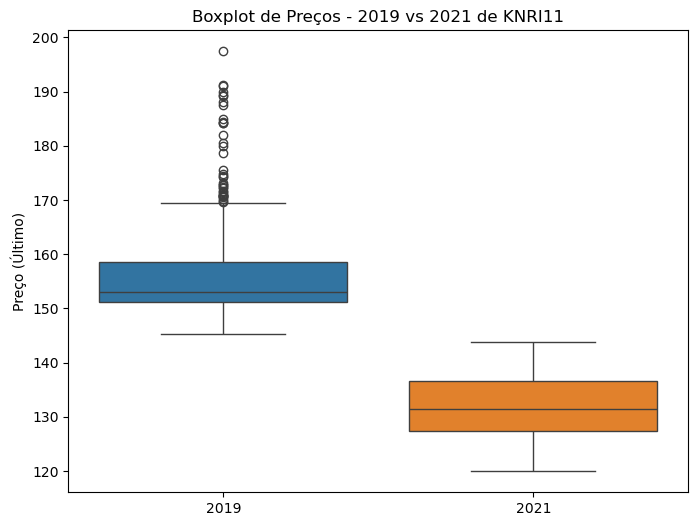

In [202]:
plt.figure(figsize=(8, 6))

dados_comparacao = pd.DataFrame({
    "2019": dados_2019_knri,
    "2021": dados_2021_knri
})

sns.boxplot(data=dados_comparacao)
plt.title("Boxplot de Preços - 2019 vs 2021 de KNRI11")
plt.ylabel("Preço (Último)")
plt.show()

In [203]:
assimetria_mxrf = skew(df_mxrf["Ultimo"])
curtose_mxrf = kurtosis(df_mxrf["Ultimo"])

print(f"Assimetria MXRF11 (Skewness): {assimetria_mxrf:.2f}")
print(f"Curtose MXRF11 (Kurtosis): {curtose_mxrf:.2f}")

Assimetria MXRF11 (Skewness): -0.24
Curtose MXRF11 (Kurtosis): -1.40


In [204]:
# Calcular assimetria e curtose por ano
metrics = df_mxrf.groupby(df_mxrf.index.year)["Ultimo"].agg([
    ("Assimetria", lambda x: skew(x)),
    ("Curtose", lambda x: kurtosis(x))
])

print(metrics)

      Assimetria   Curtose
Data                      
2013    0.933512 -0.090268
2014   -1.028499  0.157340
2015   -0.602120 -1.248263
2016   -0.621310 -1.189496
2017   -0.839327 -0.033050
2018   -0.612383 -0.873067
2019    1.831606  6.597135
2020    0.578578  0.384733
2021   -0.325418 -0.689555
2022    0.872007  0.542005
2023   -0.086647 -0.667653
2024    0.581131  7.559578


In [205]:
dados_2019_mxrf = df_mxrf.loc["2019", "Ultimo"]
dados_2021_mxrf = df_mxrf.loc["2021", "Ultimo"]

assimetria_2019_mxrf = skew(dados_2019_mxrf, nan_policy="omit")

assimetria_2021_mxrf = skew(dados_2021_mxrf, nan_policy="omit")

print(f"Assimetria MXRF11 2019: {assimetria_2019_mxrf}")
print(f"Assimetria MXRF11 2021: {assimetria_2021_mxrf}")

Assimetria MXRF11 2019: 1.8316063699545404
Assimetria MXRF11 2021: -0.3254183965902153


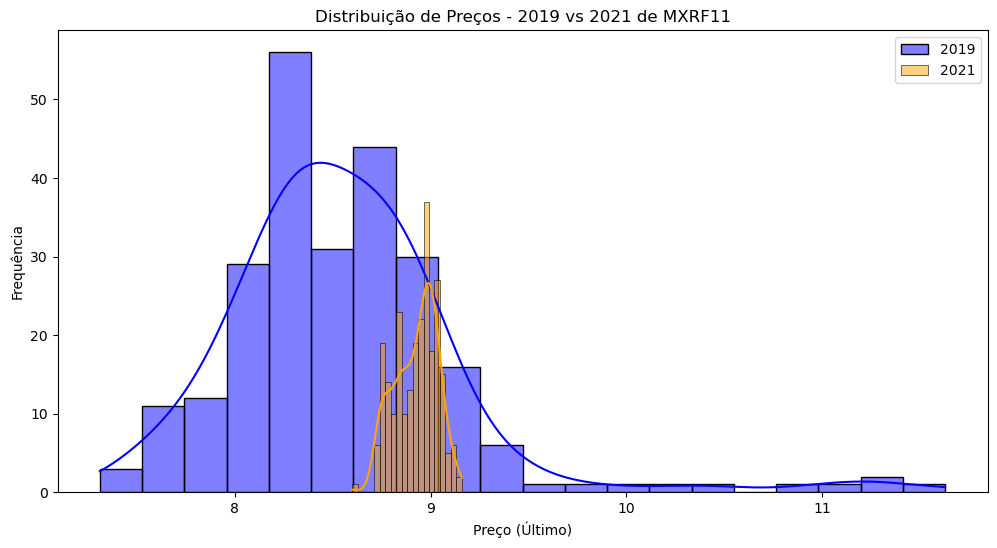

In [206]:
plt.figure(figsize=(12, 6))

sns.histplot(dados_2019_mxrf, kde=True, color="blue", label="2019", bins=20)

sns.histplot(dados_2021_mxrf, kde=True, color="orange", label="2021", bins=20)

plt.title("Distribuição de Preços - 2019 vs 2021 de MXRF11")
plt.xlabel("Preço (Último)")
plt.ylabel("Frequência")
plt.legend()
plt.show()

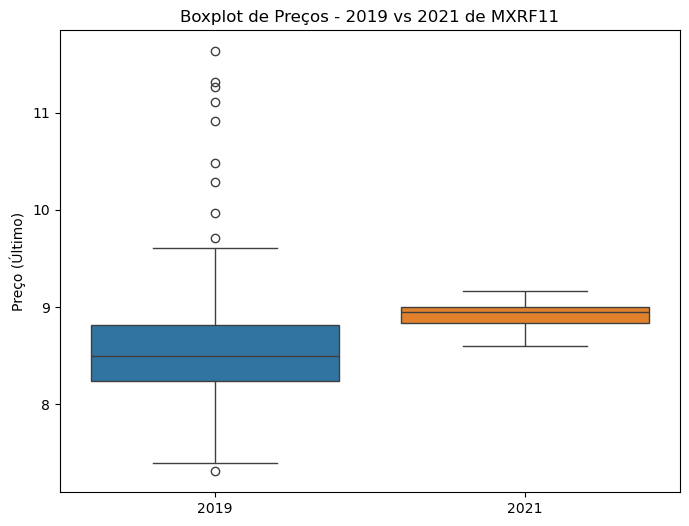

In [207]:
plt.figure(figsize=(8, 6))

dados_comparacao = pd.DataFrame({
    "2019": dados_2019_mxrf,
    "2021": dados_2021_mxrf
})

sns.boxplot(data=dados_comparacao)
plt.title("Boxplot de Preços - 2019 vs 2021 de MXRF11")
plt.ylabel("Preço (Último)")
plt.show()

In [208]:
assimetria_rbvo = skew(df_rbvo["Ultimo"])
curtose_rbvo = kurtosis(df_rbvo["Ultimo"])

print(f"Assimetria RBVO11 (Skewness): {assimetria_rbvo:.2f}")
print(f"Curtose RBVO11 (Kurtosis): {curtose_rbvo:.2f}")

Assimetria RBVO11 (Skewness): 0.16
Curtose RBVO11 (Kurtosis): -1.54


In [209]:
# Calcular assimetria e curtose por ano
metrics = df_rbvo.groupby(df_rbvo.index.year)["Ultimo"].agg([
    ("Assimetria", lambda x: skew(x)),
    ("Curtose", lambda x: kurtosis(x))
])

print(metrics)

      Assimetria    Curtose
Data                       
2013   -0.674611  -0.450830
2014    0.607772   0.112393
2015    0.408112   0.138053
2016    0.005328  -1.135835
2017    0.792508  -1.080295
2018    0.222564   1.102379
2019   -0.212430   2.159927
2020    2.763142  13.288046
2021    0.425651  -1.321507
2022    1.555091   0.838923
2023    4.632190  29.500322
2024    0.713693  -0.063646


In [210]:
dados_2019_rbvo = df_rbvo.loc["2019", "Ultimo"]
dados_2021_rbvo = df_rbvo.loc["2021", "Ultimo"]

assimetria_2019_rbvo = skew(dados_2019_rbvo, nan_policy="omit")

assimetria_2021_rbvo = skew(dados_2021_rbvo, nan_policy="omit")

print(f"Assimetria RBVO11 2019: {assimetria_2019_rbvo}")
print(f"Assimetria RBVO11 2021: {assimetria_2021_rbvo}")

Assimetria RBVO11 2019: -0.21243023311404427
Assimetria RBVO11 2021: 0.4256512112988617


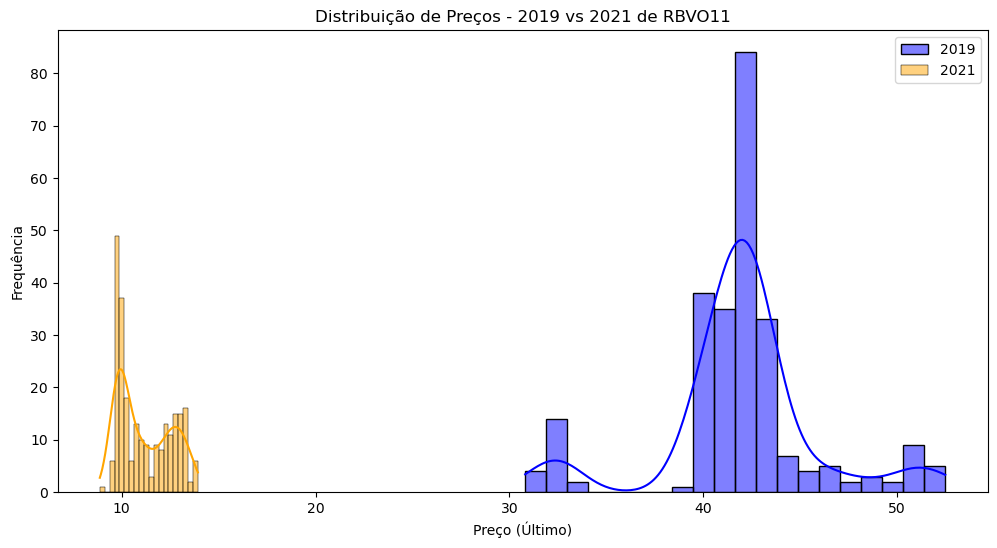

In [211]:
plt.figure(figsize=(12, 6))

sns.histplot(dados_2019_rbvo, kde=True, color="blue", label="2019", bins=20)

sns.histplot(dados_2021_rbvo, kde=True, color="orange", label="2021", bins=20)

plt.title("Distribuição de Preços - 2019 vs 2021 de RBVO11")
plt.xlabel("Preço (Último)")
plt.ylabel("Frequência")
plt.legend()
plt.show()

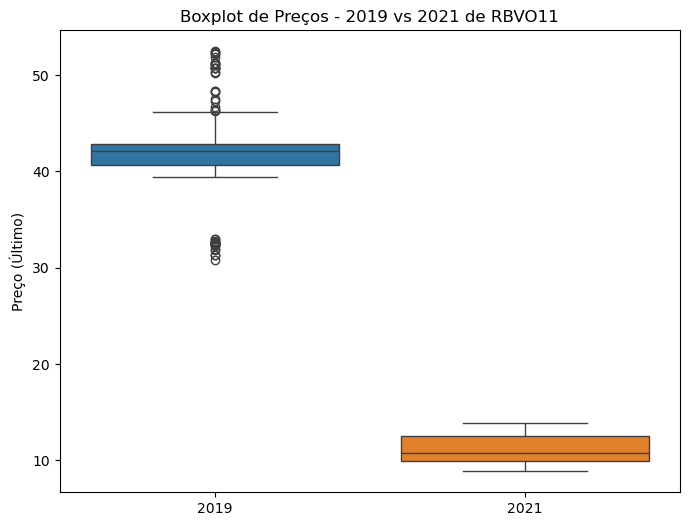

In [212]:
plt.figure(figsize=(8, 6))

dados_comparacao = pd.DataFrame({
    "2019": dados_2019_rbvo,
    "2021": dados_2021_rbvo
})

sns.boxplot(data=dados_comparacao)
plt.title("Boxplot de Preços - 2019 vs 2021 de RBVO11")
plt.ylabel("Preço (Último)")
plt.show()

In [213]:
assimetria_sptw = skew(df_sptw["Ultimo"])
curtose_sptw = kurtosis(df_sptw["Ultimo"])

print(f"Assimetria SPTW11 (Skewness): {assimetria_sptw:.2f}")
print(f"Curtose SPTW11 (Kurtosis): {curtose_sptw:.2f}")

Assimetria SPTW11 (Skewness): -0.05
Curtose SPTW11 (Kurtosis): -0.87


In [214]:
# Calcular assimetria e curtose por ano
metrics = df_sptw.groupby(df_sptw.index.year)["Ultimo"].agg([
    ("Assimetria", lambda x: skew(x)),
    ("Curtose", lambda x: kurtosis(x))
])

print(metrics)

      Assimetria   Curtose
Data                      
2013    0.154327 -0.587280
2014   -0.403390  0.145344
2015   -0.555948 -0.846431
2016    0.452810 -0.903000
2017   -0.068965 -0.281161
2018   -0.066534 -0.715049
2019    1.266200  3.165061
2020    0.486740 -0.516709
2021   -0.460582 -1.086889
2022    1.578119  0.866528
2023    0.065622 -1.002384
2024   -0.895406  1.852346


In [215]:
dados_2019_sptw = df_sptw.loc["2019", "Ultimo"]
dados_2021_sptw = df_sptw.loc["2021", "Ultimo"]

assimetria_2019_sptw = skew(dados_2019_sptw, nan_policy="omit")

assimetria_2021_sptw = skew(dados_2021_sptw, nan_policy="omit")

print(f"Assimetria SPTW11 2019: {assimetria_2019_sptw}")
print(f"Assimetria SPTW11 2021: {assimetria_2021_sptw}")

Assimetria SPTW11 2019: 1.266200048577369
Assimetria SPTW11 2021: -0.4605818453484213


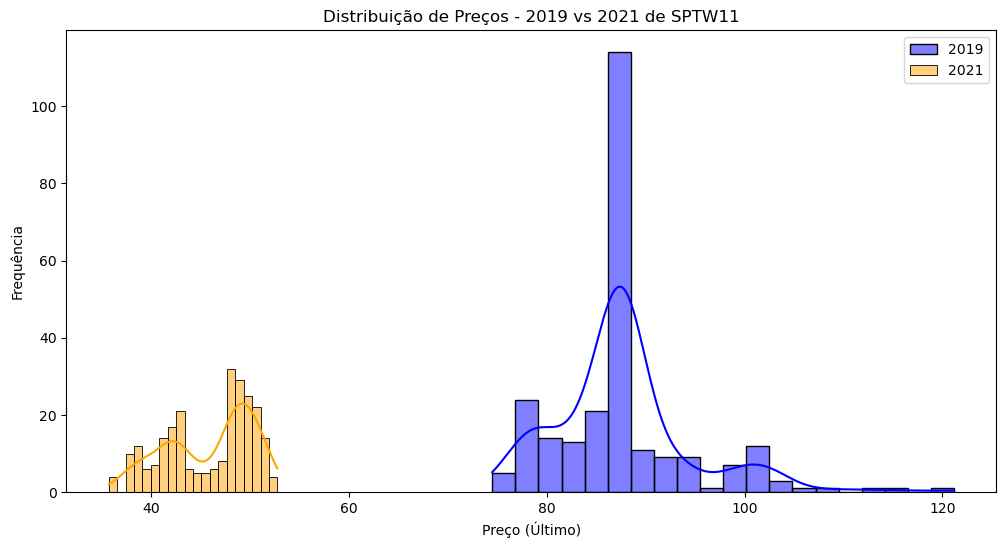

In [216]:
plt.figure(figsize=(12, 6))

sns.histplot(dados_2019_sptw, kde=True, color="blue", label="2019", bins=20)

sns.histplot(dados_2021_sptw, kde=True, color="orange", label="2021", bins=20)

plt.title("Distribuição de Preços - 2019 vs 2021 de SPTW11")
plt.xlabel("Preço (Último)")
plt.ylabel("Frequência")
plt.legend()
plt.show()

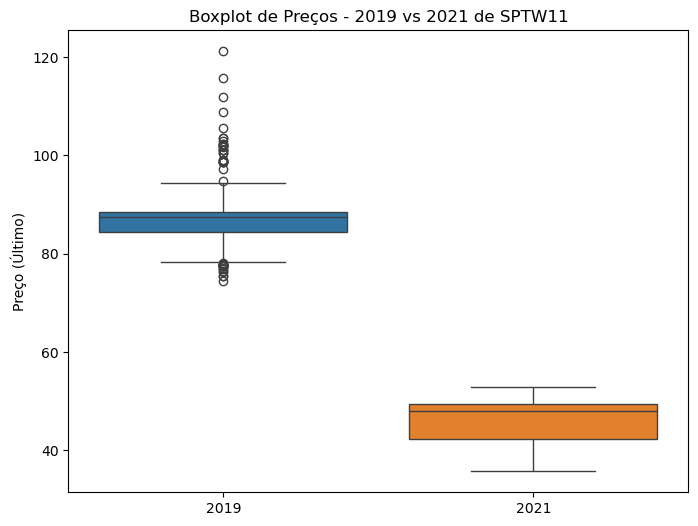

In [217]:
plt.figure(figsize=(8, 6))

dados_comparacao = pd.DataFrame({
    "2019": dados_2019_sptw,
    "2021": dados_2021_sptw
})

sns.boxplot(data=dados_comparacao)
plt.title("Boxplot de Preços - 2019 vs 2021 de SPTW11")
plt.ylabel("Preço (Último)")
plt.show()

In [218]:
assimetria_vrta = skew(df_vrta["Ultimo"])
curtose_vrta = kurtosis(df_vrta["Ultimo"])

print(f"Assimetria VRTA11 (Skewness): {assimetria_vrta:.2f}")
print(f"Curtose VRTA11 (Kurtosis): {curtose_vrta:.2f}")

Assimetria VRTA11 (Skewness): 0.60
Curtose VRTA11 (Kurtosis): -0.26


In [219]:
# Calcular assimetria e curtose por ano
metrics = df_vrta.groupby(df_vrta.index.year)["Ultimo"].agg([
    ("Assimetria", lambda x: skew(x)),
    ("Curtose", lambda x: kurtosis(x))
])

print(metrics)

      Assimetria   Curtose
Data                      
2013    0.040086 -0.996228
2014    1.766419  3.306699
2015    0.424812 -0.596040
2016    0.100799 -0.641688
2017    0.750962 -0.430087
2018    1.111278  0.084967
2019   -0.444849 -0.558065
2020    0.462410 -0.827357
2021   -1.014726  0.713034
2022    1.312866  0.412710
2023   -0.067805 -0.199194
2024    0.193592 -1.020794


In [220]:
dados_2019_vrta = df_vrta.loc["2019", "Ultimo"]
dados_2021_vrta = df_vrta.loc["2021", "Ultimo"]

assimetria_2019_vrta = skew(dados_2019_vrta, nan_policy="omit")

assimetria_2021_vrta = skew(dados_2021_vrta, nan_policy="omit")

print(f"Assimetria VRTA11 2019: {assimetria_2019_vrta}")
print(f"Assimetria VRTA11 2021: {assimetria_2021_vrta}")

Assimetria VRTA11 2019: -0.44484854298187065
Assimetria VRTA11 2021: -1.0147263528774713


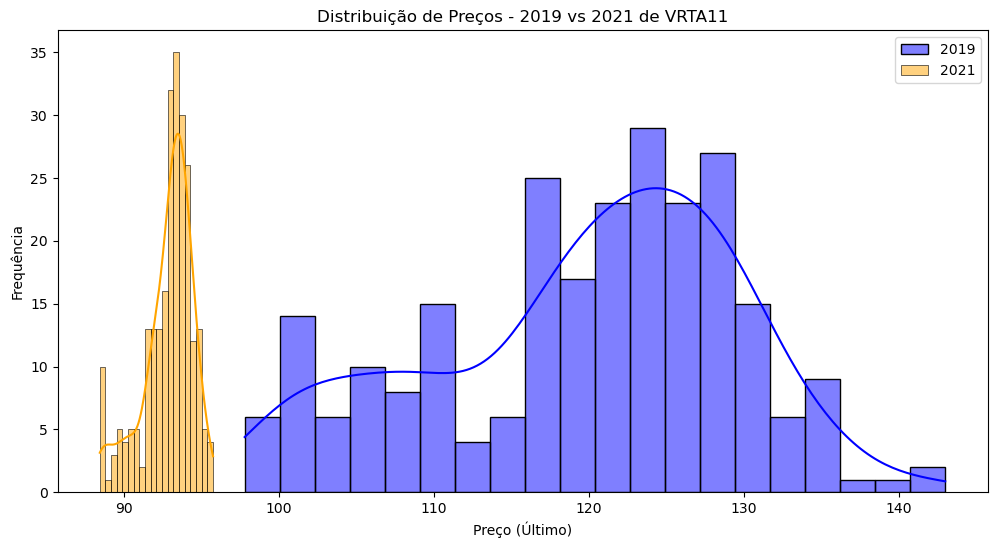

In [221]:
plt.figure(figsize=(12, 6))

sns.histplot(dados_2019_vrta, kde=True, color="blue", label="2019", bins=20)

sns.histplot(dados_2021_vrta, kde=True, color="orange", label="2021", bins=20)

plt.title("Distribuição de Preços - 2019 vs 2021 de VRTA11")
plt.xlabel("Preço (Último)")
plt.ylabel("Frequência")
plt.legend()
plt.show()

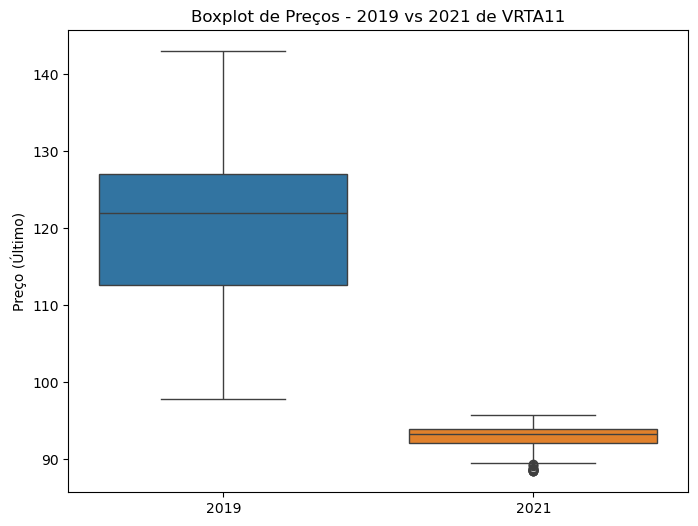

In [222]:
plt.figure(figsize=(8, 6))

dados_comparacao = pd.DataFrame({
    "2019": dados_2019_vrta,
    "2021": dados_2021_vrta
})

sns.boxplot(data=dados_comparacao)
plt.title("Boxplot de Preços - 2019 vs 2021 de VRTA11")
plt.ylabel("Preço (Último)")
plt.show()

## Índice de sharpe

Quanto maior o índice, melhor o retorno ajustado ao risco.

Valores acima de 1 são considerados bons; acima de 2, excelentes.

Valores negativos indicam que o ativo está performando abaixo da taxa livre de risco.

In [225]:
retorno_medio_ativo_abcp = df_abcp["Retorno"].mean()
volatilidade_ativo_abcp = df_abcp["Retorno"].std()
selic_anual = df_selic["selic_meta"].mean()
bova_anual = df_bova["Ultimo"].mean()
ifix_anual = df_ifix["Ultimo"].mean()

sharpe_ratio_abcp_selic = (retorno_medio_ativo_abcp - selic_anual) / volatilidade_ativo_abcp
print(f"Índice de Sharpe Selic e ABCP11: {sharpe_ratio_abcp_selic:.4f}")

sharpe_ratio_abcp_bova = (retorno_medio_ativo_abcp - bova_anual) / volatilidade_ativo_abcp
print(f"Índice de Sharpe Selic e ABCP11: {sharpe_ratio_abcp_bova:.4f}")

sharpe_ratio_abcp_ifix = (retorno_medio_ativo_abcp - ifix_anual) / volatilidade_ativo_abcp
print(f"Índice de Sharpe Selic e ABCP11: {sharpe_ratio_abcp_ifix:.4f}")

Índice de Sharpe Selic e ABCP11: -411.2505
Índice de Sharpe Selic e ABCP11: -3585.1108
Índice de Sharpe Selic e ABCP11: -99505.4285


In [226]:
retorno_medio_ativo_bbrc = df_bbrc["Retorno"].mean()
volatilidade_ativo_bbrc = df_bbrc["Retorno"].std()
selic_anual = df_selic["selic_meta"].mean()
bova_anual = df_bova["Ultimo"].mean()
ifix_anual = df_ifix["Ultimo"].mean()

sharpe_ratio_bbrc_selic = (retorno_medio_ativo_bbrc - selic_anual) / volatilidade_ativo_bbrc
print(f"Índice de Sharpe Selic e BBRC11: {sharpe_ratio_bbrc_selic:.4f}")

sharpe_ratio_bbrc_bova = (retorno_medio_ativo_bbrc - bova_anual) / volatilidade_ativo_bbrc
print(f"Índice de Sharpe Selic e BBRC11: {sharpe_ratio_bbrc_bova:.4f}")

sharpe_ratio_bbrc_ifix = (retorno_medio_ativo_bbrc - ifix_anual) / volatilidade_ativo_bbrc
print(f"Índice de Sharpe Selic e BBRC11: {sharpe_ratio_bbrc_ifix:.4f}")

Índice de Sharpe Selic e BBRC11: -597.7488
Índice de Sharpe Selic e BBRC11: -5210.7101
Índice de Sharpe Selic e BBRC11: -144623.4994


In [227]:
retorno_medio_ativo_jsre = df_jsre["Retorno"].mean()
volatilidade_ativo_jsre = df_jsre["Retorno"].std()
selic_anual = df_selic["selic_meta"].mean()
bova_anual = df_bova["Ultimo"].mean()
ifix_anual = df_ifix["Ultimo"].mean()

sharpe_ratio_jsre_selic = (retorno_medio_ativo_jsre - selic_anual) / volatilidade_ativo_jsre
print(f"Índice de Sharpe Selic e JSRE11: {sharpe_ratio_jsre_selic:.4f}")

sharpe_ratio_jsre_bova = (retorno_medio_ativo_jsre - bova_anual) / volatilidade_ativo_jsre
print(f"Índice de Sharpe Selic e JSRE11: {sharpe_ratio_jsre_bova:.4f}")

sharpe_ratio_jsre_ifix = (retorno_medio_ativo_jsre - ifix_anual) / volatilidade_ativo_jsre
print(f"Índice de Sharpe Selic e JSRE11: {sharpe_ratio_jsre_ifix:.4f}")

Índice de Sharpe Selic e JSRE11: -674.8060
Índice de Sharpe Selic e JSRE11: -5882.2958
Índice de Sharpe Selic e JSRE11: -163262.9060


In [228]:
retorno_medio_ativo_kncr = df_kncr["Retorno"].mean()
volatilidade_ativo_kncr = df_kncr["Retorno"].std()
selic_anual = df_selic["selic_meta"].mean()
bova_anual = df_bova["Ultimo"].mean()
ifix_anual = df_ifix["Ultimo"].mean()

sharpe_ratio_kncr_selic = (retorno_medio_ativo_kncr - selic_anual) / volatilidade_ativo_kncr
print(f"Índice de Sharpe Selic e KNCR11: {sharpe_ratio_kncr_selic:.4f}")

sharpe_ratio_kncr_bova = (retorno_medio_ativo_kncr - bova_anual) / volatilidade_ativo_kncr
print(f"Índice de Sharpe Selic e KNCR11: {sharpe_ratio_kncr_bova:.4f}")

sharpe_ratio_kncr_ifix = (retorno_medio_ativo_kncr - ifix_anual) / volatilidade_ativo_kncr
print(f"Índice de Sharpe Selic e KNCR11: {sharpe_ratio_kncr_ifix:.4f}")

Índice de Sharpe Selic e KNCR11: -778.3136
Índice de Sharpe Selic e KNCR11: -6784.7140
Índice de Sharpe Selic e KNCR11: -188309.9822


In [229]:
retorno_medio_ativo_knri = df_knri["Retorno"].mean()
volatilidade_ativo_knri = df_knri["Retorno"].std()
selic_anual = df_selic["selic_meta"].mean()
bova_anual = df_bova["Ultimo"].mean()
ifix_anual = df_ifix["Ultimo"].mean()

sharpe_ratio_knri_selic = (retorno_medio_ativo_knri - selic_anual) / volatilidade_ativo_knri
print(f"Índice de Sharpe Selic e KNRI11: {sharpe_ratio_knri_selic:.4f}")

sharpe_ratio_knri_bova = (retorno_medio_ativo_knri - bova_anual) / volatilidade_ativo_knri
print(f"Índice de Sharpe Selic e KNRI11: {sharpe_ratio_knri_bova:.4f}")

sharpe_ratio_knri_ifix = (retorno_medio_ativo_knri - ifix_anual) / volatilidade_ativo_knri
print(f"Índice de Sharpe Selic e KNRI11: {sharpe_ratio_knri_ifix:.4f}")

Índice de Sharpe Selic e KNRI11: -729.4448
Índice de Sharpe Selic e KNRI11: -6358.6575
Índice de Sharpe Selic e KNRI11: -176484.5683


In [230]:
retorno_medio_ativo_mxrf = df_mxrf["Retorno"].mean()
volatilidade_ativo_mxrf = df_mxrf["Retorno"].std()
selic_anual = df_selic["selic_meta"].mean()
bova_anual = df_bova["Ultimo"].mean()
ifix_anual = df_ifix["Ultimo"].mean()

sharpe_ratio_mxrf_selic = (retorno_medio_ativo_mxrf - selic_anual) / volatilidade_ativo_mxrf
print(f"Índice de Sharpe Selic e MXRF11: {sharpe_ratio_mxrf_selic:.4f}")

sharpe_ratio_mxrf_bova = (retorno_medio_ativo_mxrf - bova_anual) / volatilidade_ativo_mxrf
print(f"Índice de Sharpe Selic e MXRF11: {sharpe_ratio_mxrf_bova:.4f}")

sharpe_ratio_mxrf_ifix = (retorno_medio_ativo_mxrf - ifix_anual) / volatilidade_ativo_mxrf
print(f"Índice de Sharpe Selic e MXRF11: {sharpe_ratio_mxrf_ifix:.4f}")

Índice de Sharpe Selic e MXRF11: -791.0203
Índice de Sharpe Selic e MXRF11: -6895.6324
Índice de Sharpe Selic e MXRF11: -191389.0501


In [231]:
retorno_medio_ativo_rbvo = df_rbvo["Retorno"].mean()
volatilidade_ativo_rbvo = df_rbvo["Retorno"].std()
selic_anual = df_selic["selic_meta"].mean()
bova_anual = df_bova["Ultimo"].mean()
ifix_anual = df_ifix["Ultimo"].mean()

sharpe_ratio_rbvo_selic = (retorno_medio_ativo_rbvo - selic_anual) / volatilidade_ativo_rbvo
print(f"Índice de Sharpe Selic e RBVO11: {sharpe_ratio_rbvo_selic:.4f}")

sharpe_ratio_rbvo_bova = (retorno_medio_ativo_rbvo - bova_anual) / volatilidade_ativo_rbvo
print(f"Índice de Sharpe Selic e RBVO11: {sharpe_ratio_rbvo_bova:.4f}")

sharpe_ratio_rbvo_ifix = (retorno_medio_ativo_rbvo - ifix_anual) / volatilidade_ativo_rbvo
print(f"Índice de Sharpe Selic e RBVO11: {sharpe_ratio_rbvo_ifix:.4f}")

Índice de Sharpe Selic e RBVO11: -193.4178
Índice de Sharpe Selic e RBVO11: -1686.0733
Índice de Sharpe Selic e RBVO11: -46797.0676


In [232]:
retorno_medio_ativo_sptw = df_sptw["Retorno"].mean()
volatilidade_ativo_sptw = df_sptw["Retorno"].std()
selic_anual = df_selic["selic_meta"].mean()
bova_anual = df_bova["Ultimo"].mean()
ifix_anual = df_ifix["Ultimo"].mean()

sharpe_ratio_sptw_selic = (retorno_medio_ativo_sptw - selic_anual) / volatilidade_ativo_sptw
print(f"Índice de Sharpe Selic e SPTW11: {sharpe_ratio_sptw_selic:.4f}")

sharpe_ratio_sptw_bova = (retorno_medio_ativo_sptw - bova_anual) / volatilidade_ativo_sptw
print(f"Índice de Sharpe Selic e SPTW11: {sharpe_ratio_sptw_bova:.4f}")

sharpe_ratio_sptw_ifix = (retorno_medio_ativo_sptw - ifix_anual) / volatilidade_ativo_sptw
print(f"Índice de Sharpe Selic e SPTW11: {sharpe_ratio_sptw_ifix:.4f}")

Índice de Sharpe Selic e SPTW11: -496.0297
Índice de Sharpe Selic e SPTW11: -4323.9202
Índice de Sharpe Selic e SPTW11: -120010.3202


In [233]:
retorno_medio_ativo_vrta = df_vrta["Retorno"].mean()
volatilidade_ativo_vrta = df_vrta["Retorno"].std()
selic_anual = df_selic["selic_meta"].mean()
bova_anual = df_bova["Ultimo"].mean()
ifix_anual = df_ifix["Ultimo"].mean()

sharpe_ratio_vrta_selic = (retorno_medio_ativo_vrta - selic_anual) / volatilidade_ativo_vrta
print(f"Índice de Sharpe Selic e VRTA11: {sharpe_ratio_vrta_selic:.4f}")

sharpe_ratio_vrta_bova = (retorno_medio_ativo_vrta - bova_anual) / volatilidade_ativo_vrta
print(f"Índice de Sharpe Selic e VRTA11: {sharpe_ratio_vrta_bova:.4f}")

sharpe_ratio_vrta_ifix = (retorno_medio_ativo_vrta - ifix_anual) / volatilidade_ativo_vrta
print(f"Índice de Sharpe Selic e VRTA11: {sharpe_ratio_vrta_ifix:.4f}")

Índice de Sharpe Selic e VRTA11: -713.0454
Índice de Sharpe Selic e VRTA11: -6215.7043
Índice de Sharpe Selic e VRTA11: -172516.9077


## Desempenho relativo e acumulado dos fundos em relação ao IFIX

In [235]:
df_ifix["Retorno"] = df_ifix["Ultimo"].pct_change()

In [236]:
# Calcular o desempenho relativo ao ifix
df_abcp["Desempenho_relativo_ifix"] = df_abcp["Retorno"] - df_ifix["Retorno"]
# Calcular o desempenho acumulado
df_abcp["Desempenho_relativo_acumulado_ifix"] = (1 + df_abcp["Desempenho_relativo_ifix"]).cumprod() - 1

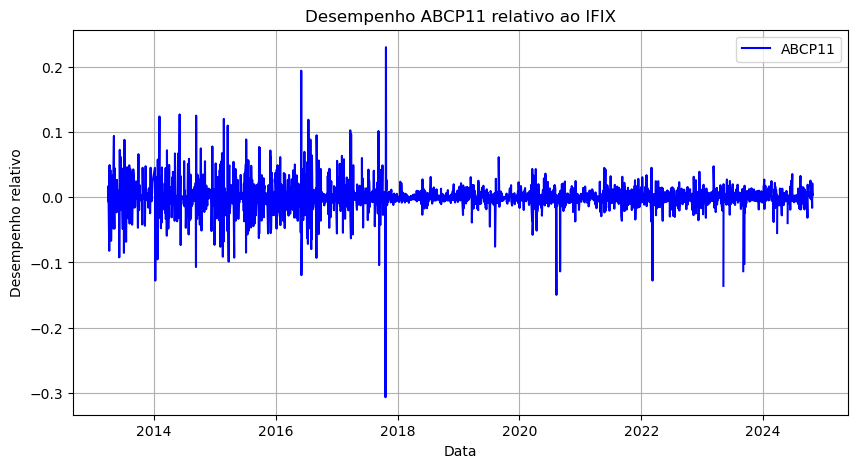

In [237]:
plt.figure(figsize=(10, 5))
plt.plot(df_abcp.index, df_abcp["Desempenho_relativo_ifix"], label="ABCP11", color="b")
plt.title("Desempenho ABCP11 relativo ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo") 
plt.legend() 
plt.grid(True) 
plt.show()

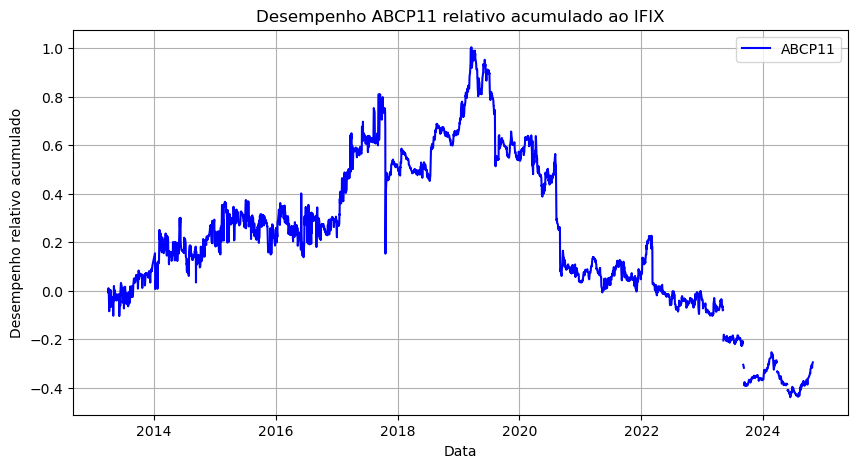

In [238]:
plt.figure(figsize=(10, 5))
plt.plot(df_abcp.index, df_abcp["Desempenho_relativo_acumulado_ifix"], label="ABCP11", color="b")
plt.title("Desempenho ABCP11 relativo acumulado ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo acumulado") 
plt.legend() 
plt.grid(True) 
plt.show() 

In [239]:
# Calcular o desempenho relativo ao ifix
df_bbrc["Desempenho_relativo_ifix"] = df_bbrc["Retorno"] - df_ifix["Retorno"]
# Calcular o desempenho acumulado
df_bbrc["Desempenho_relativo_acumulado_ifix"] = (1 + df_bbrc["Desempenho_relativo_ifix"]).cumprod() - 1

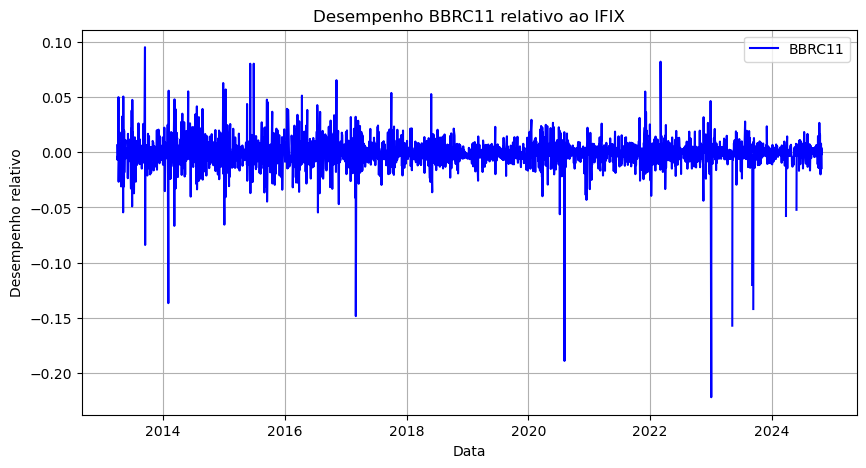

In [240]:
plt.figure(figsize=(10, 5))
plt.plot(df_bbrc.index, df_bbrc["Desempenho_relativo_ifix"], label="BBRC11", color="b")
plt.title("Desempenho BBRC11 relativo ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo") 
plt.legend() 
plt.grid(True) 
plt.show()

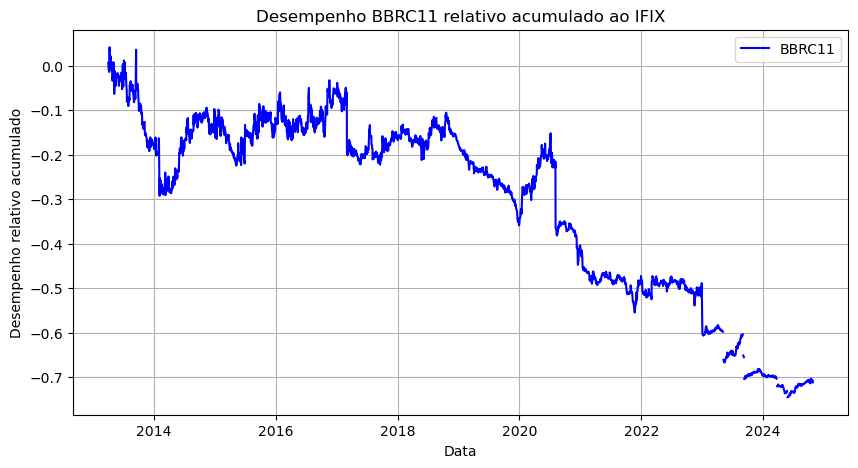

In [241]:
plt.figure(figsize=(10, 5))
plt.plot(df_bbrc.index, df_bbrc["Desempenho_relativo_acumulado_ifix"], label="BBRC11", color="b")
plt.title("Desempenho BBRC11 relativo acumulado ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo acumulado") 
plt.legend() 
plt.grid(True) 
plt.show() 

In [242]:
# Calcular o desempenho relativo ao ifix
df_jsre["Desempenho_relativo_ifix"] = df_jsre["Retorno"] - df_ifix["Retorno"]
# Calcular o desempenho acumulado
df_jsre["Desempenho_relativo_acumulado_ifix"] = (1 + df_jsre["Desempenho_relativo_ifix"]).cumprod() - 1

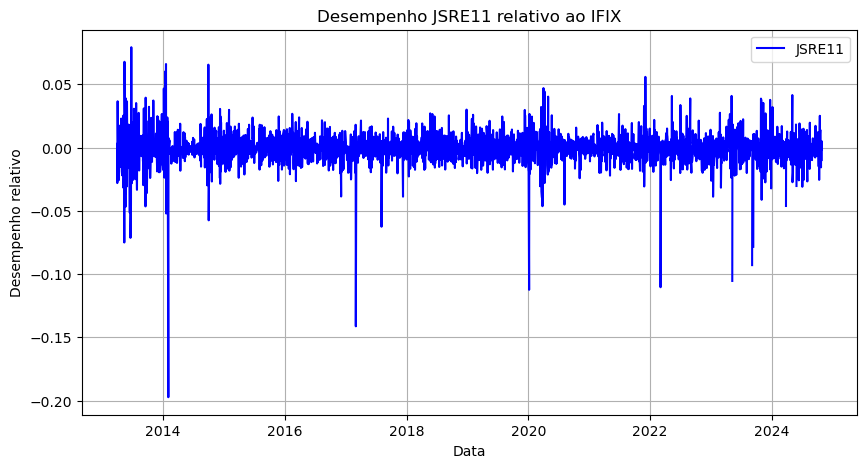

In [243]:
plt.figure(figsize=(10, 5))
plt.plot(df_jsre.index, df_jsre["Desempenho_relativo_ifix"], label="JSRE11", color="b")
plt.title("Desempenho JSRE11 relativo ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo") 
plt.legend() 
plt.grid(True) 
plt.show()

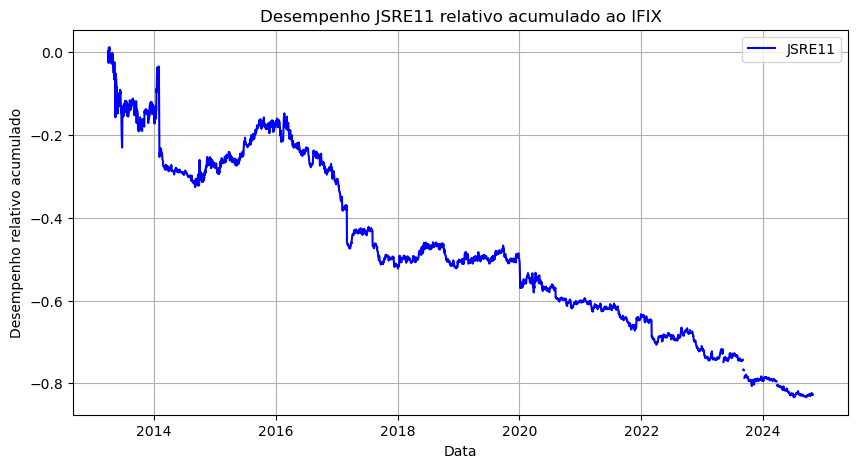

In [244]:
plt.figure(figsize=(10, 5))
plt.plot(df_jsre.index, df_jsre["Desempenho_relativo_acumulado_ifix"], label="JSRE11", color="b")
plt.title("Desempenho JSRE11 relativo acumulado ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo acumulado") 
plt.legend() 
plt.grid(True) 
plt.show() 

In [245]:
# Calcular o desempenho relativo ao ifix
df_kncr["Desempenho_relativo_ifix"] = df_kncr["Retorno"] - df_ifix["Retorno"]
# Calcular o desempenho acumulado
df_kncr["Desempenho_relativo_acumulado_ifix"] = (1 + df_kncr["Desempenho_relativo_ifix"]).cumprod() - 1

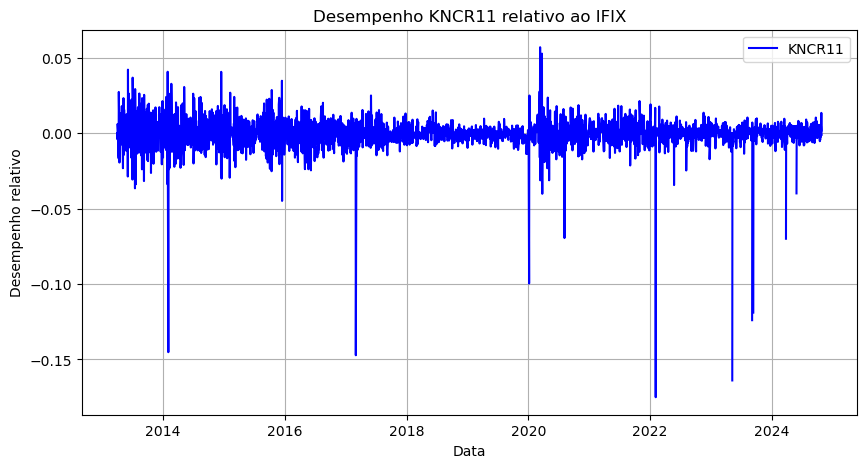

In [246]:
plt.figure(figsize=(10, 5))
plt.plot(df_kncr.index, df_kncr["Desempenho_relativo_ifix"], label="KNCR11", color="b")
plt.title("Desempenho KNCR11 relativo ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo") 
plt.legend() 
plt.grid(True) 
plt.show()

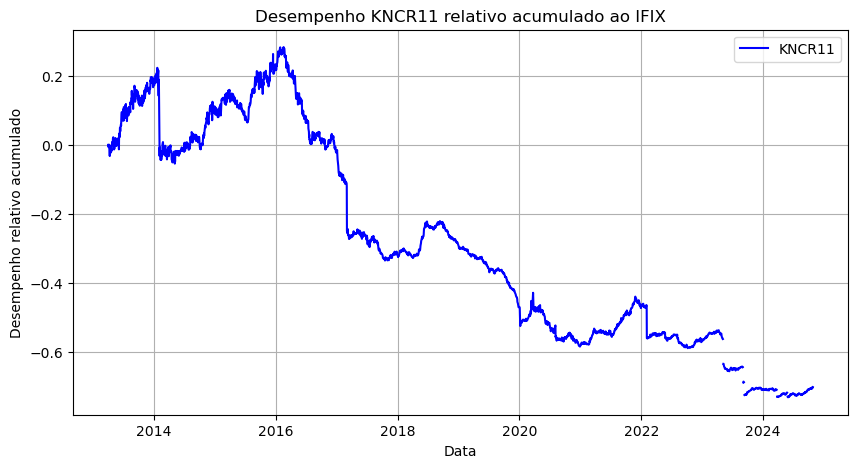

In [247]:
plt.figure(figsize=(10, 5))
plt.plot(df_kncr.index, df_kncr["Desempenho_relativo_acumulado_ifix"], label="KNCR11", color="b")
plt.title("Desempenho KNCR11 relativo acumulado ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo acumulado") 
plt.legend() 
plt.grid(True) 
plt.show() 

In [248]:
# Calcular o desempenho relativo ao ifix
df_knri["Desempenho_relativo_ifix"] = df_knri["Retorno"] - df_ifix["Retorno"]
# Calcular o desempenho acumulado
df_knri["Desempenho_relativo_acumulado_ifix"] = (1 + df_knri["Desempenho_relativo_ifix"]).cumprod() - 1

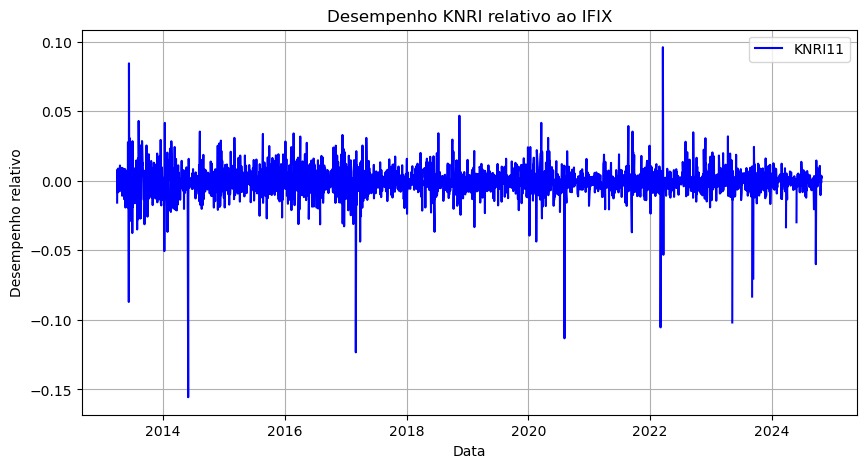

In [249]:
plt.figure(figsize=(10, 5))
plt.plot(df_knri.index, df_knri["Desempenho_relativo_ifix"], label="KNRI11", color="b")
plt.title("Desempenho KNRI relativo ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo") 
plt.legend() 
plt.grid(True) 
plt.show()

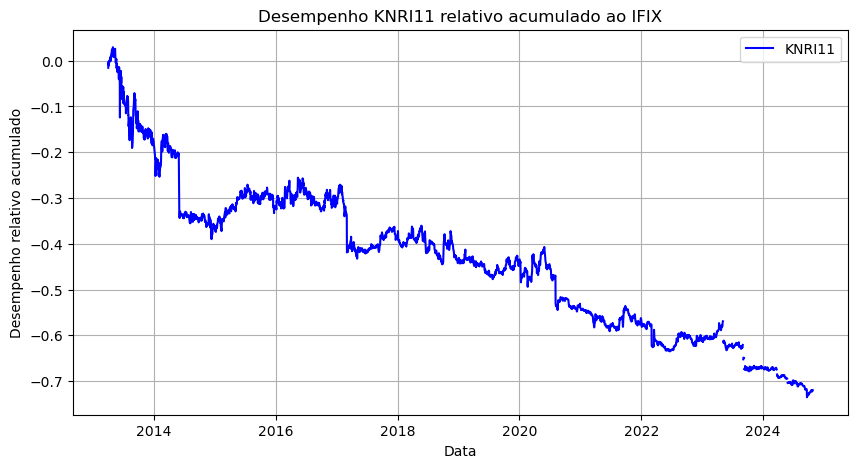

In [250]:
plt.figure(figsize=(10, 5))
plt.plot(df_knri.index, df_knri["Desempenho_relativo_acumulado_ifix"], label="KNRI11", color="b")
plt.title("Desempenho KNRI11 relativo acumulado ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo acumulado") 
plt.legend() 
plt.grid(True) 
plt.show() 

In [251]:
# Calcular o desempenho relativo ao ifix
df_mxrf["Desempenho_relativo_ifix"] = df_mxrf["Retorno"] - df_ifix["Retorno"]
# Calcular o desempenho acumulado
df_mxrf["Desempenho_relativo_acumulado_ifix"] = (1 + df_mxrf["Desempenho_relativo_ifix"]).cumprod() - 1

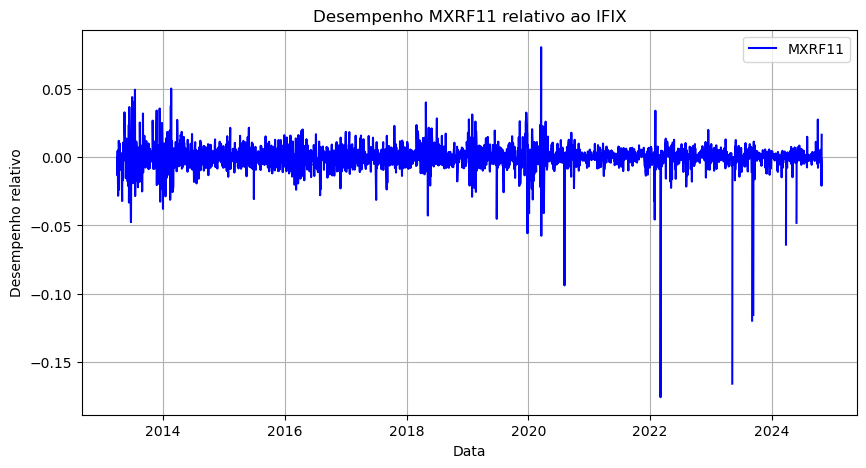

In [252]:
plt.figure(figsize=(10, 5))
plt.plot(df_mxrf.index, df_mxrf["Desempenho_relativo_ifix"], label="MXRF11", color="b")
plt.title("Desempenho MXRF11 relativo ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo") 
plt.legend() 
plt.grid(True) 
plt.show()

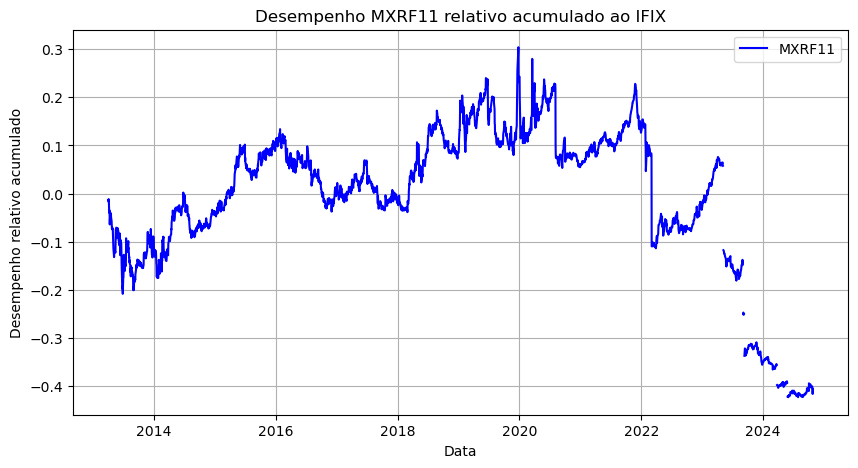

In [253]:
plt.figure(figsize=(10, 5))
plt.plot(df_mxrf.index, df_mxrf["Desempenho_relativo_acumulado_ifix"], label="MXRF11", color="b")
plt.title("Desempenho MXRF11 relativo acumulado ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo acumulado") 
plt.legend() 
plt.grid(True) 
plt.show() 

In [254]:
# Calcular o desempenho relativo ao ifix
df_rbvo["Desempenho_relativo_ifix"] = df_rbvo["Retorno"] - df_ifix["Retorno"]
# Calcular o desempenho acumulado
df_rbvo["Desempenho_relativo_acumulado_ifix"] = (1 + df_rbvo["Desempenho_relativo_ifix"]).cumprod() - 1

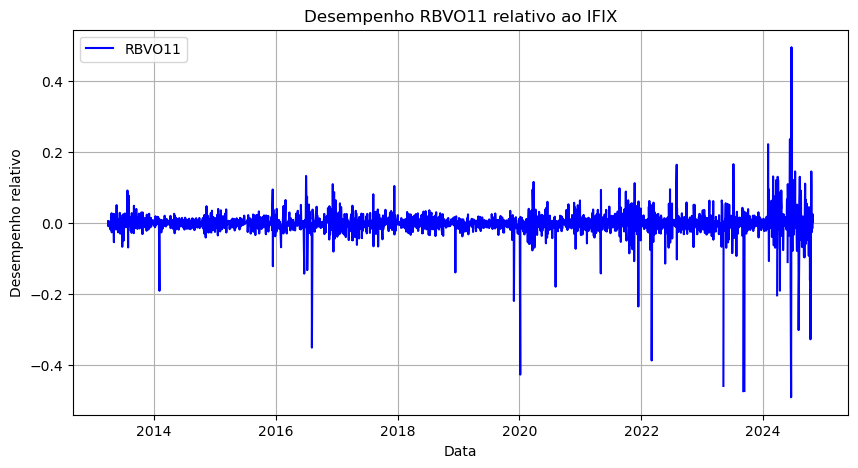

In [255]:
plt.figure(figsize=(10, 5))
plt.plot(df_rbvo.index, df_rbvo["Desempenho_relativo_ifix"], label="RBVO11", color="b")
plt.title("Desempenho RBVO11 relativo ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo") 
plt.legend() 
plt.grid(True) 
plt.show()

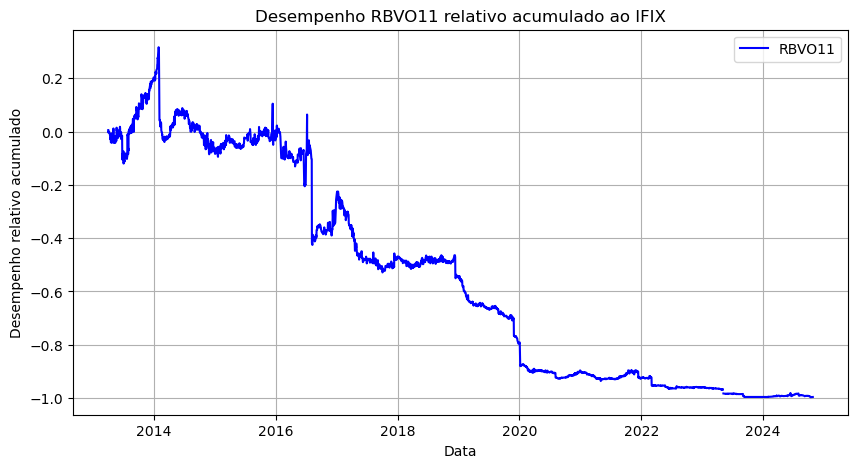

In [256]:
plt.figure(figsize=(10, 5))
plt.plot(df_rbvo.index, df_rbvo["Desempenho_relativo_acumulado_ifix"], label="RBVO11", color="b")
plt.title("Desempenho RBVO11 relativo acumulado ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo acumulado") 
plt.legend() 
plt.grid(True) 
plt.show() 

In [257]:
# Calcular o desempenho relativo ao ifix
df_sptw["Desempenho_relativo_ifix"] = df_sptw["Retorno"] - df_ifix["Retorno"]
# Calcular o desempenho acumulado
df_sptw["Desempenho_relativo_acumulado_ifix"] = (1 + df_sptw["Desempenho_relativo_ifix"]).cumprod() - 1

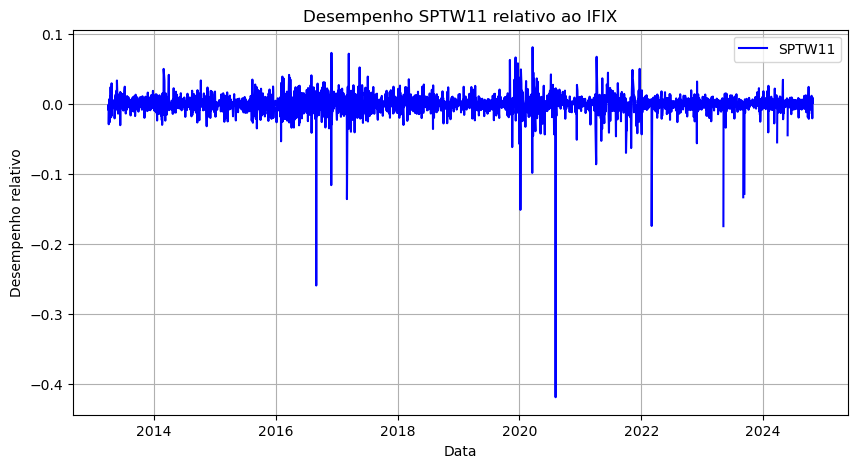

In [258]:
plt.figure(figsize=(10, 5))
plt.plot(df_sptw.index, df_sptw["Desempenho_relativo_ifix"], label="SPTW11", color="b")
plt.title("Desempenho SPTW11 relativo ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo") 
plt.legend() 
plt.grid(True) 
plt.show()

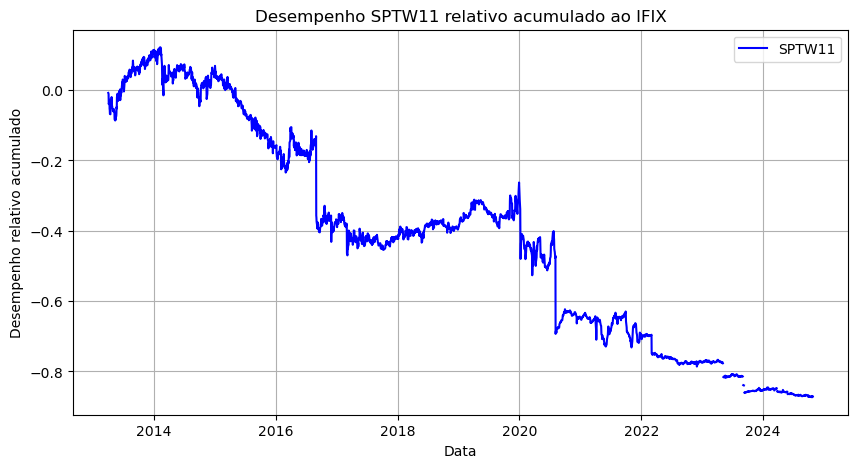

In [259]:
plt.figure(figsize=(10, 5))
plt.plot(df_sptw.index, df_sptw["Desempenho_relativo_acumulado_ifix"], label="SPTW11", color="b")
plt.title("Desempenho SPTW11 relativo acumulado ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo acumulado") 
plt.legend() 
plt.grid(True) 
plt.show() 

In [260]:
# Calcular o desempenho relativo ao ifix
df_vrta["Desempenho_relativo_ifix"] = df_vrta["Retorno"] - df_ifix["Retorno"]
# Calcular o desempenho acumulado
df_vrta["Desempenho_relativo_acumulado_ifix"] = (1 + df_vrta["Desempenho_relativo_ifix"]).cumprod() - 1

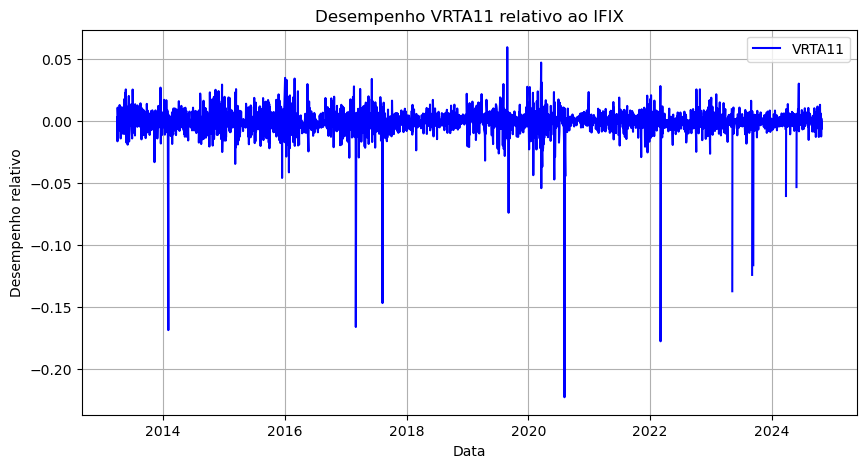

In [261]:
plt.figure(figsize=(10, 5))
plt.plot(df_vrta.index, df_vrta["Desempenho_relativo_ifix"], label="VRTA11", color="b")
plt.title("Desempenho VRTA11 relativo ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo") 
plt.legend() 
plt.grid(True) 
plt.show()

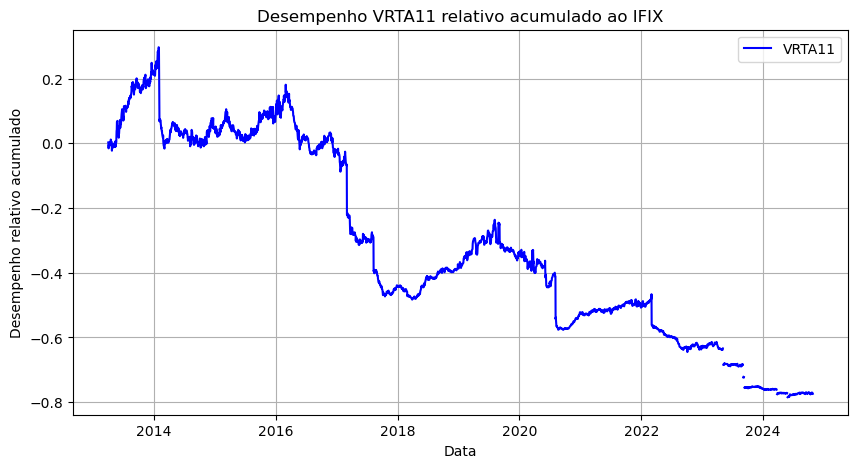

In [262]:
plt.figure(figsize=(10, 5))
plt.plot(df_vrta.index, df_vrta["Desempenho_relativo_acumulado_ifix"], label="VRTA11", color="b")
plt.title("Desempenho VRTA11 relativo acumulado ao IFIX")
plt.xlabel("Data")
plt.ylabel("Desempenho relativo acumulado") 
plt.legend() 
plt.grid(True) 
plt.show() 

## O FII se Recuperou?

In [264]:
# Preço pré-COVID (final de fevereiro de 2020)
pre_covid_price = df_abcp.loc["2020-02-28", "Ultimo"]

# Preço no pico da crise (março de 2020)
pico_crise_price =df_abcp.loc["2020-03-20", "Ultimo"]

preco_recente = df_abcp["Ultimo"].iloc[-1]

recuperado = preco_recente >= pre_covid_price
print(f"FII ABCP11 recuperado? {recuperado}")

# Calcular variação percentual
variacao = ((preco_recente - pre_covid_price) / pre_covid_price) * 100
print(f"Variação percentual desde o pré-COVID: {variacao:.2f}%")

FII ABCP11 recuperado? False
Variação percentual desde o pré-COVID: -26.23%


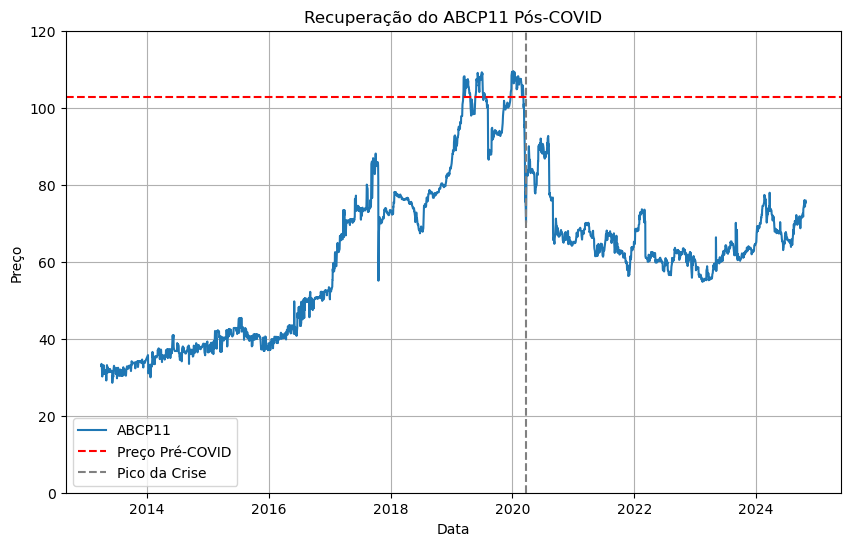

In [265]:
plt.figure(figsize=(10, 6))
plt.plot(df_abcp.index, df_abcp["Ultimo"], label="ABCP11")
plt.axhline(pre_covid_price, color="red", linestyle="--", label="Preço Pré-COVID")
plt.axvline(pd.to_datetime("2020-03-20"), color="gray", linestyle="--", label="Pico da Crise")
plt.title("Recuperação do ABCP11 Pós-COVID")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.ylim(0,120)
plt.grid(True) 
plt.legend()
plt.show()

In [266]:
# Preço pré-COVID (final de fevereiro de 2020)
pre_covid_price = df_bbrc.loc["2020-02-28", "Ultimo"]

# Preço no pico da crise (março de 2020)
pico_crise_price =df_bbrc.loc["2020-03-20", "Ultimo"]

preco_recente = df_bbrc["Ultimo"].iloc[-1]

recuperado = preco_recente >= pre_covid_price
print(f"FII BBRC11 recuperado? {recuperado}")

# Calcular variação percentual
variacao = ((preco_recente - pre_covid_price) / pre_covid_price) * 100
print(f"Variação percentual desde o pré-COVID: {variacao:.2f}%")

FII BBRC11 recuperado? False
Variação percentual desde o pré-COVID: -26.93%


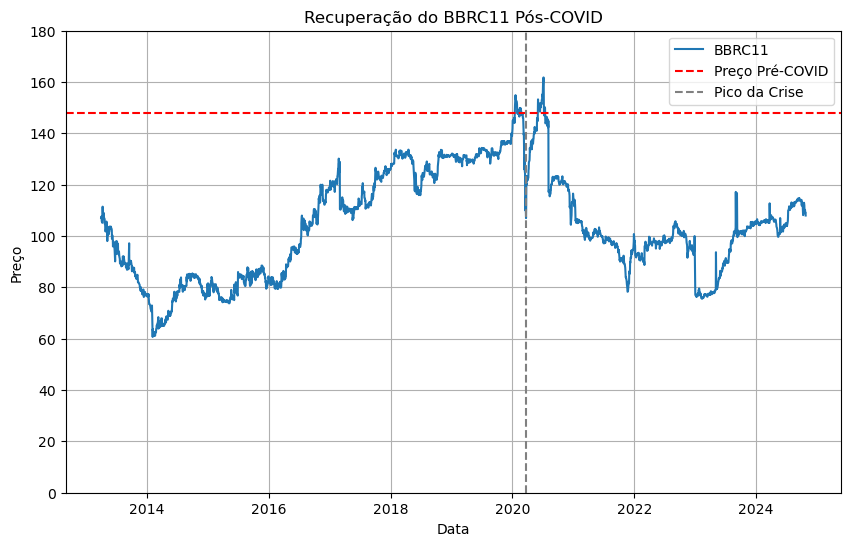

In [267]:
plt.figure(figsize=(10, 6))
plt.plot(df_bbrc.index, df_bbrc["Ultimo"], label="BBRC11")
plt.axhline(pre_covid_price, color="red", linestyle="--", label="Preço Pré-COVID")
plt.axvline(pd.to_datetime("2020-03-20"), color="gray", linestyle="--", label="Pico da Crise")
plt.title("Recuperação do BBRC11 Pós-COVID")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.ylim(0,180)
plt.grid(True) 
plt.legend()
plt.show()

In [268]:
# Preço pré-COVID (final de fevereiro de 2020)
pre_covid_price = df_jsre.loc["2020-02-28", "Ultimo"]

# Preço no pico da crise (março de 2020)
pico_crise_price =df_jsre.loc["2020-03-20", "Ultimo"]

preco_recente = df_jsre["Ultimo"].iloc[-1]

recuperado = preco_recente >= pre_covid_price
print(f"FII JSRE11 recuperado? {recuperado}")

# Calcular variação percentual
variacao = ((preco_recente - pre_covid_price) / pre_covid_price) * 100
print(f"Variação percentual desde o pré-COVID: {variacao:.2f}%")

FII JSRE11 recuperado? False
Variação percentual desde o pré-COVID: -40.61%


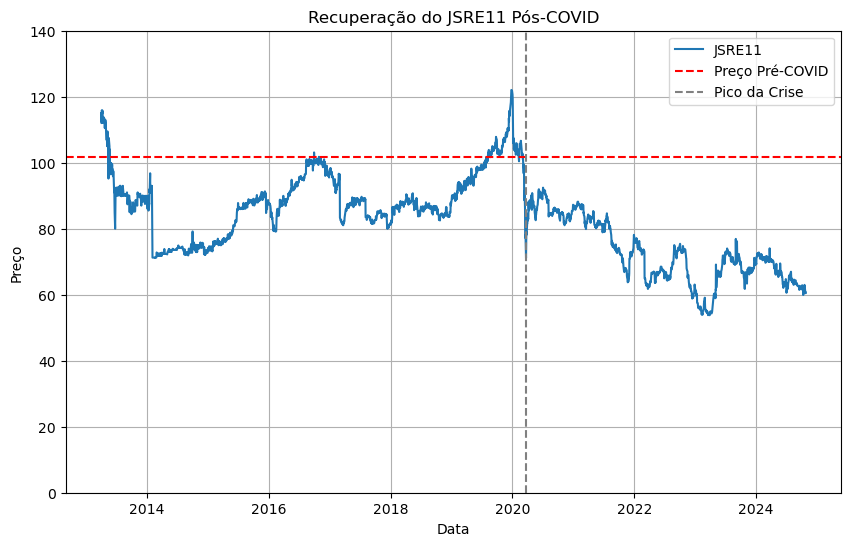

In [269]:
plt.figure(figsize=(10, 6))
plt.plot(df_jsre.index, df_jsre["Ultimo"], label="JSRE11")
plt.axhline(pre_covid_price, color="red", linestyle="--", label="Preço Pré-COVID")
plt.axvline(pd.to_datetime("2020-03-20"), color="gray", linestyle="--", label="Pico da Crise")
plt.title("Recuperação do JSRE11 Pós-COVID")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.ylim(0,140)
plt.grid(True) 
plt.legend()
plt.show()

In [270]:
# Preço pré-COVID (final de fevereiro de 2020)
pre_covid_price = df_kncr.loc["2020-02-28", "Ultimo"]

# Preço no pico da crise (março de 2020)
pico_crise_price =df_kncr.loc["2020-03-20", "Ultimo"]

preco_recente = df_kncr["Ultimo"].iloc[-1]

recuperado = preco_recente >= pre_covid_price
print(f"FII KNCR11 recuperado? {recuperado}")

# Calcular variação percentual
variacao = ((preco_recente - pre_covid_price) / pre_covid_price) * 100
print(f"Variação percentual desde o pré-COVID: {variacao:.2f}%")

FII KNCR11 recuperado? True
Variação percentual desde o pré-COVID: 11.33%


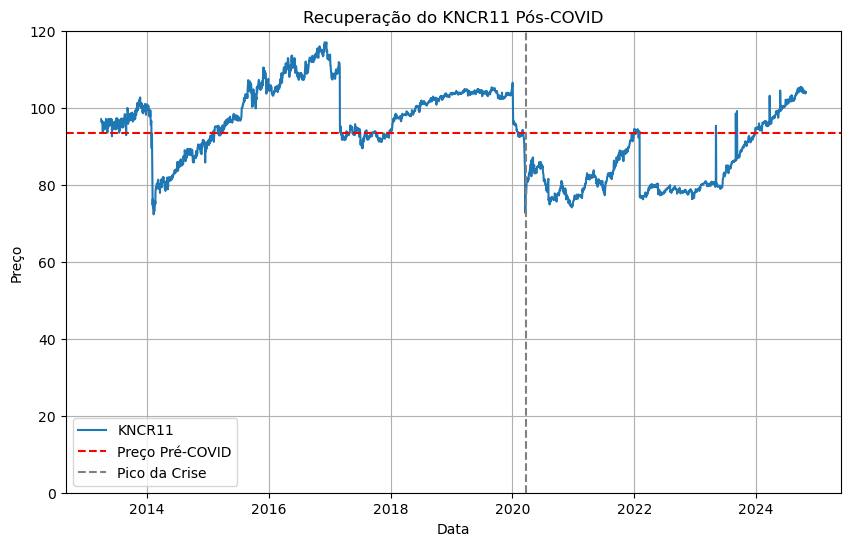

In [271]:
plt.figure(figsize=(10, 6))
plt.plot(df_kncr.index, df_kncr["Ultimo"], label="KNCR11")
plt.axhline(pre_covid_price, color="red", linestyle="--", label="Preço Pré-COVID")
plt.axvline(pd.to_datetime("2020-03-20"), color="gray", linestyle="--", label="Pico da Crise")
plt.title("Recuperação do KNCR11 Pós-COVID")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.ylim(0,120)
plt.grid(True) 
plt.legend()
plt.show()

In [272]:
# Preço pré-COVID (final de fevereiro de 2020)
pre_covid_price = df_knri.loc["2020-02-28", "Ultimo"]

# Preço no pico da crise (março de 2020)
pico_crise_price =df_knri.loc["2020-03-20", "Ultimo"]

preco_recente = df_knri["Ultimo"].iloc[-1]

recuperado = preco_recente >= pre_covid_price
print(f"FII KNRI11 recuperado? {recuperado}")

# Calcular variação percentual
variacao = ((preco_recente - pre_covid_price) / pre_covid_price) * 100
print(f"Variação percentual desde o pré-COVID: {variacao:.2f}%")

FII KNRI11 recuperado? False
Variação percentual desde o pré-COVID: -19.27%


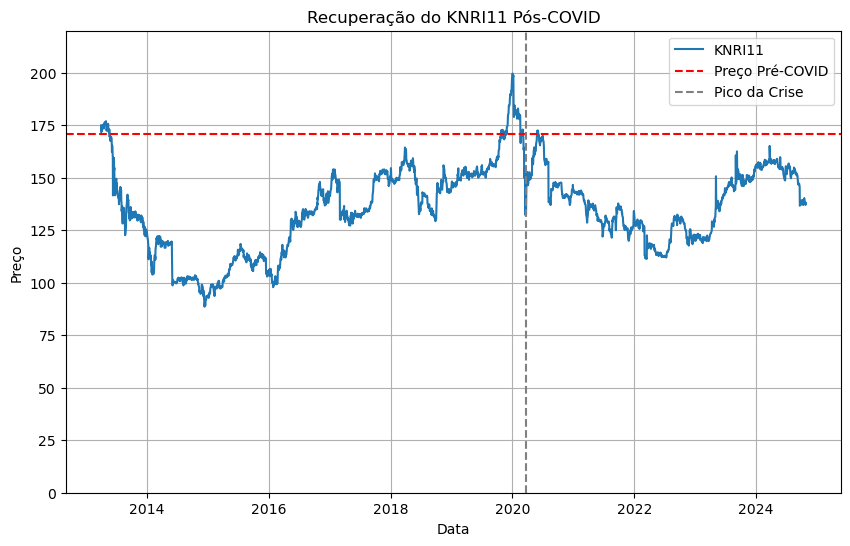

In [273]:
plt.figure(figsize=(10, 6))
plt.plot(df_knri.index, df_knri["Ultimo"], label="KNRI11")
plt.axhline(pre_covid_price, color="red", linestyle="--", label="Preço Pré-COVID")
plt.axvline(pd.to_datetime("2020-03-20"), color="gray", linestyle="--", label="Pico da Crise")
plt.title("Recuperação do KNRI11 Pós-COVID")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.ylim(0,220)
plt.grid(True) 
plt.legend()
plt.show()

In [274]:
# Preço pré-COVID (final de fevereiro de 2020)
pre_covid_price = df_mxrf.loc["2020-02-28", "Ultimo"]

# Preço no pico da crise (março de 2020)
pico_crise_price =df_mxrf.loc["2020-03-20", "Ultimo"]

preco_recente = df_mxrf["Ultimo"].iloc[-1]

recuperado = preco_recente >= pre_covid_price
print(f"FII MXRF11 recuperado? {recuperado}")

# Calcular variação percentual
variacao = ((preco_recente - pre_covid_price) / pre_covid_price) * 100
print(f"Variação percentual desde o pré-COVID: {variacao:.2f}%")

FII MXRF11 recuperado? True
Variação percentual desde o pré-COVID: 0.00%


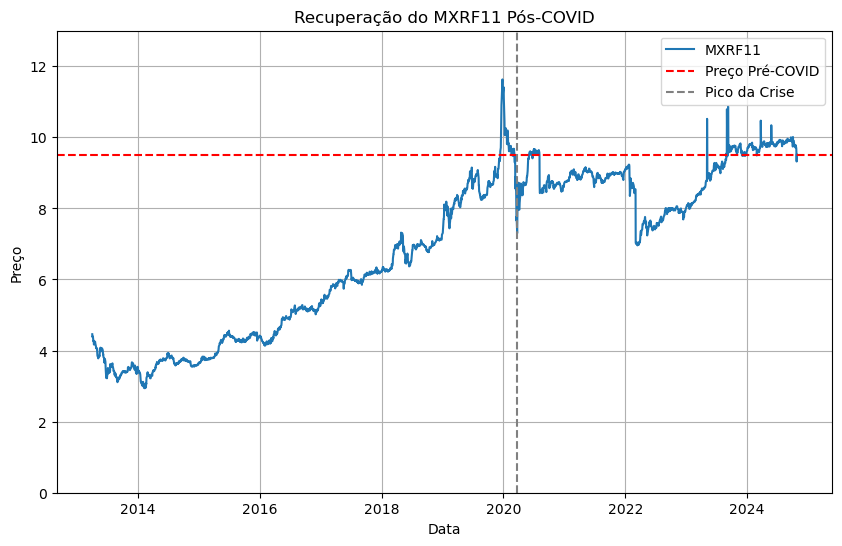

In [275]:
plt.figure(figsize=(10, 6))
plt.plot(df_mxrf.index, df_mxrf["Ultimo"], label="MXRF11")
plt.axhline(pre_covid_price, color="red", linestyle="--", label="Preço Pré-COVID")
plt.axvline(pd.to_datetime("2020-03-20"), color="gray", linestyle="--", label="Pico da Crise")
plt.title("Recuperação do MXRF11 Pós-COVID")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.ylim(0,13)
plt.grid(True) 
plt.legend()
plt.show()

In [276]:
# Preço pré-COVID (final de fevereiro de 2020)
pre_covid_price = df_rbvo.loc["2020-02-28", "Ultimo"]

# Preço no pico da crise (março de 2020)
pico_crise_price =df_rbvo.loc["2020-03-20", "Ultimo"]

preco_recente = df_rbvo["Ultimo"].iloc[-1]

recuperado = preco_recente >= pre_covid_price
print(f"FII RBVO11 recuperado? {recuperado}")

# Calcular variação percentual
variacao = ((preco_recente - pre_covid_price) / pre_covid_price) * 100
print(f"Variação percentual desde o pré-COVID: {variacao:.2f}%")

FII RBVO11 recuperado? False
Variação percentual desde o pré-COVID: -58.63%


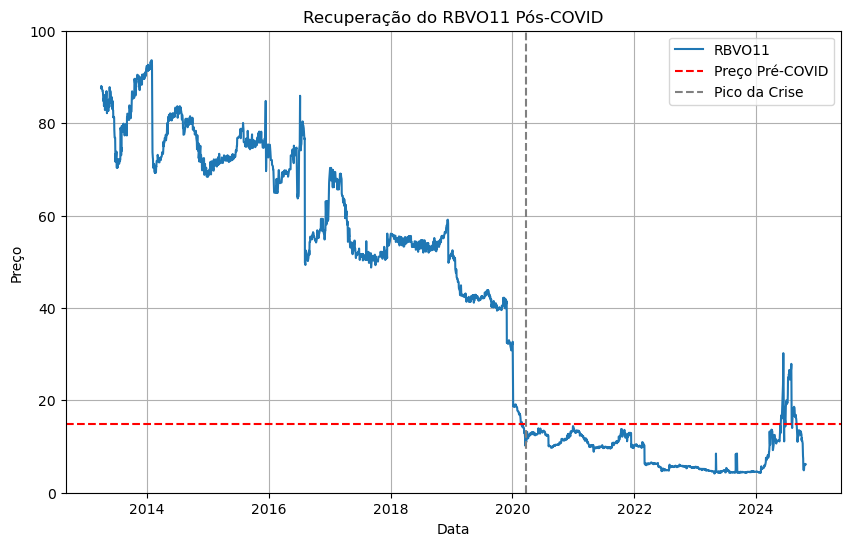

In [277]:
plt.figure(figsize=(10, 6))
plt.plot(df_rbvo.index, df_rbvo["Ultimo"], label="RBVO11")
plt.axhline(pre_covid_price, color="red", linestyle="--", label="Preço Pré-COVID")
plt.axvline(pd.to_datetime("2020-03-20"), color="gray", linestyle="--", label="Pico da Crise")
plt.title("Recuperação do RBVO11 Pós-COVID")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.ylim(0,100)
plt.grid(True) 
plt.legend()
plt.show()

In [278]:
# Preço pré-COVID (final de fevereiro de 2020)
pre_covid_price = df_sptw.loc["2020-02-28", "Ultimo"]

# Preço no pico da crise (março de 2020)
pico_crise_price =df_sptw.loc["2020-03-20", "Ultimo"]

preco_recente = df_sptw["Ultimo"].iloc[-1]

recuperado = preco_recente >= pre_covid_price
print(f"FII SPTW11 recuperado? {recuperado}")

# Calcular variação percentual
variacao = ((preco_recente - pre_covid_price) / pre_covid_price) * 100
print(f"Variação percentual desde o pré-COVID: {variacao:.2f}%")

FII SPTW11 recuperado? False
Variação percentual desde o pré-COVID: -57.50%


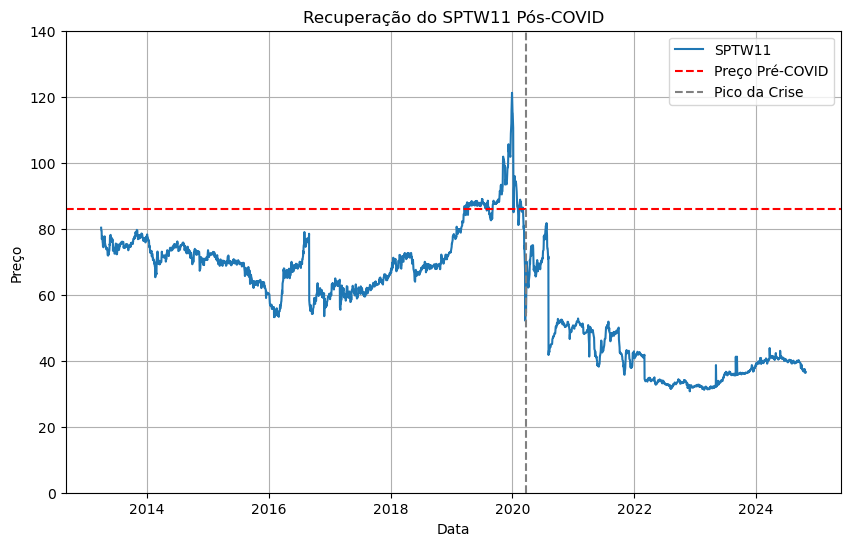

In [279]:
plt.figure(figsize=(10, 6))
plt.plot(df_sptw.index, df_sptw["Ultimo"], label="SPTW11")
plt.axhline(pre_covid_price, color="red", linestyle="--", label="Preço Pré-COVID")
plt.axvline(pd.to_datetime("2020-03-20"), color="gray", linestyle="--", label="Pico da Crise")
plt.title("Recuperação do SPTW11 Pós-COVID")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.ylim(0,140)
plt.grid(True) 
plt.legend()
plt.show()

In [280]:
# Preço pré-COVID (final de fevereiro de 2020)
pre_covid_price = df_vrta.loc["2020-02-28", "Ultimo"]

# Preço no pico da crise (março de 2020)
pico_crise_price =df_vrta.loc["2020-03-20", "Ultimo"]

preco_recente = df_vrta["Ultimo"].iloc[-1]

recuperado = preco_recente >= pre_covid_price
print(f"FII VRTA11 recuperado? {recuperado}")

# Calcular variação percentual
variacao = ((preco_recente - pre_covid_price) / pre_covid_price) * 100
print(f"Variação percentual desde o pré-COVID: {variacao:.2f}%")

FII VRTA11 recuperado? False
Variação percentual desde o pré-COVID: -34.63%


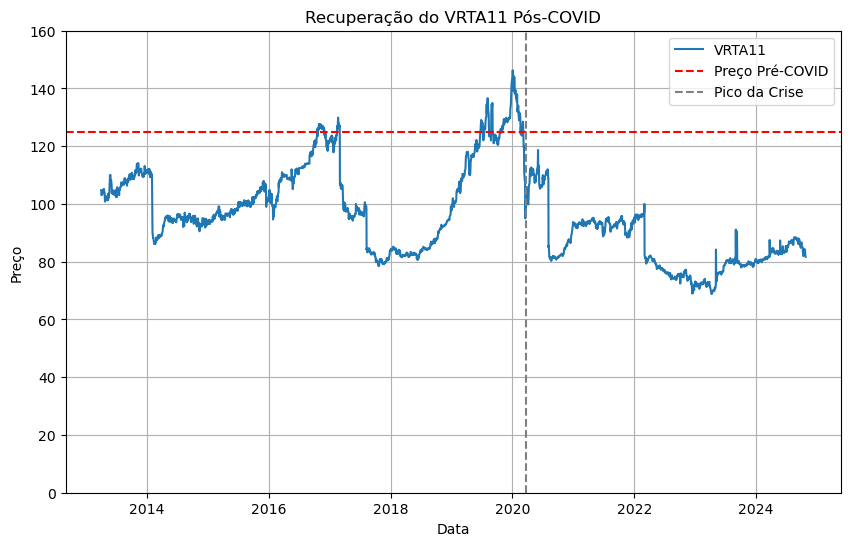

In [281]:
plt.figure(figsize=(10, 6))
plt.plot(df_vrta.index, df_vrta["Ultimo"], label="VRTA11")
plt.axhline(pre_covid_price, color="red", linestyle="--", label="Preço Pré-COVID")
plt.axvline(pd.to_datetime("2020-03-20"), color="gray", linestyle="--", label="Pico da Crise")
plt.title("Recuperação do VRTA11 Pós-COVID")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.ylim(0,160)
plt.grid(True) 
plt.legend()
plt.show()

# Dividendos

## Setando os dataframes

In [284]:
df_abcp_div = pd.read_csv("./ABCP11 Dividendos.csv")
df_abcp_div.head()

Data Dividendo
0  04/2013      0,04
1  05/2013      0,04
2  06/2013      0,05
3  07/2013      0,06
4  08/2013      0,06

In [285]:
df_abcp_div.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Data       139 non-null    object
 1   Dividendo  139 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [286]:
df_abcp_div["Data"] = pd.to_datetime(df_abcp_div["Data"], format="%m/%Y")
df_abcp_div.set_index("Data", inplace=True)
df_abcp_div["Dividendo"] = df_abcp_div["Dividendo"].str.replace(".", "").str.replace(",", ".").astype(float)
df_abcp_div.head()

Dividendo
Data                 
2013-04-01       0.04
2013-05-01       0.04
2013-06-01       0.05
2013-07-01       0.06
2013-08-01       0.06

In [287]:
df_abcp_div.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 2013-04-01 to 2024-10-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Dividendo  139 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [288]:
def limpar_dividendos(data_frame):
    data_frame["Data"] = pd.to_datetime(data_frame["Data"], format="%m/%Y")
    data_frame.set_index("Data", inplace=True)
    data_frame["Dividendo"] = data_frame["Dividendo"].str.replace(".", "").str.replace(",", ".").astype(float)
    return data_frame

In [289]:
df_bbrc_div = pd.read_csv("./BBRC11 Dividendos.csv")
df_bbrc_div = limpar_dividendos(df_bbrc_div)
df_bbrc_div.head()

Dividendo
Data                 
2013-04-01       0.18
2013-05-01       0.19
2013-06-01       0.18
2013-07-01       0.18
2013-08-01       0.21

In [290]:
df_jsre_div = pd.read_csv("./JSRE11 Dividendos.csv")
df_jsre_div = limpar_dividendos(df_jsre_div)
df_jsre_div.head()

Dividendo
Data                 
2013-04-01       0.60
2013-05-01       0.60
2013-06-01       0.67
2013-07-01       0.30
2013-08-01       0.15

In [291]:
df_kncr_div = pd.read_csv("./KNCR11 Dividendos.csv")
df_kncr_div = limpar_dividendos(df_kncr_div)
df_kncr_div.head()

Dividendo
Data                 
2013-04-01       0.61
2013-05-01       0.61
2013-06-01       0.61
2013-07-01       0.74
2013-08-01       0.72

In [292]:
df_knri_div = pd.read_csv("./KNRI11 Dividendos.csv")
df_knri_div = limpar_dividendos(df_knri_div)
df_knri_div.head()

Dividendo
Data                 
2013-04-01       0.72
2013-05-01       0.74
2013-06-01       0.80
2013-07-01       0.80
2013-08-01       0.84

In [293]:
df_mxrf_div = pd.read_csv("./MXRF11 Dividendos.csv")
df_mxrf_div = limpar_dividendos(df_mxrf_div)
df_mxrf_div.head()

Dividendo
Data                 
2013-04-01       0.00
2013-05-01       0.08
2013-06-01       0.08
2013-07-01       0.00
2013-08-01       0.07

In [294]:
df_rbvo_div = pd.read_csv("./RBVO11 Dividendos.csv")
df_rbvo_div = limpar_dividendos(df_rbvo_div)
df_rbvo_div.head()

Dividendo
Data                 
2013-04-01       0.46
2013-05-01       0.67
2013-06-01       0.49
2013-07-01       0.61
2013-08-01       0.73

In [295]:
df_sptw_div = pd.read_csv("./SPTW11 Dividendos.csv")
df_sptw_div = limpar_dividendos(df_sptw_div)
df_sptw_div.head()

Dividendo
Data                 
2013-04-01       0.77
2013-05-01       0.77
2013-06-01       0.77
2013-07-01       0.77
2013-08-01       0.77

In [296]:
df_vrta_div = pd.read_csv("./VRTA11 Dividendos.csv")
df_vrta_div = limpar_dividendos(df_vrta_div)
df_vrta_div.head()

Dividendo
Data                 
2013-04-01       1.04
2013-05-01       1.09
2013-06-01       1.10
2013-07-01       1.06
2013-08-01       1.06

## Plot dos dividendos

In [586]:
pre_covid_div = df_abcp_div.loc["2020-02-01", "Dividendo"]

# Dividendo na crise (abril de 2020)
pico_crise_div =df_abcp_div.loc["2020-04-01", "Dividendo"]

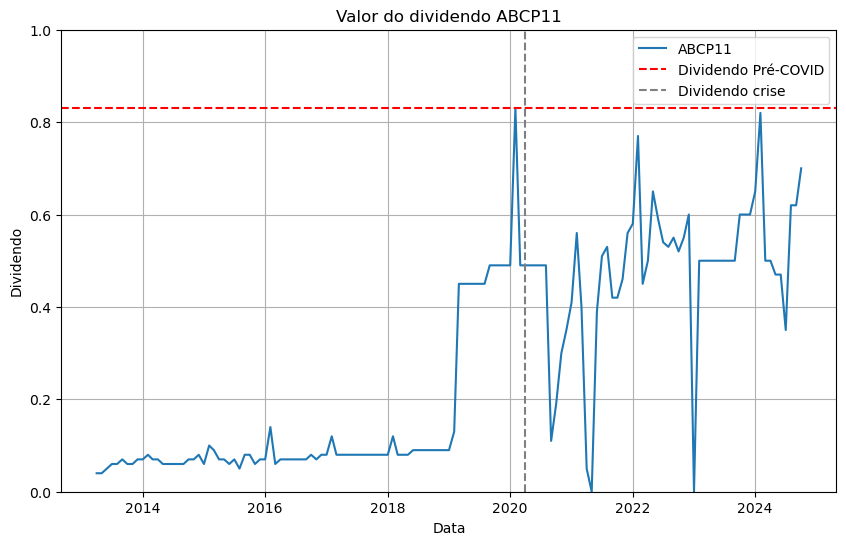

In [592]:
plt.figure(figsize=(10, 6))
plt.plot(df_abcp_div.index, df_abcp_div["Dividendo"], label="ABCP11")
plt.axhline(pre_covid_div, color="red", linestyle="--", label="Dividendo Pré-COVID")
plt.axvline(pd.to_datetime("2020-04-01"), color="gray", linestyle="--", label="Dividendo crise")
plt.title("Valor do dividendo ABCP11")
plt.xlabel("Data")
plt.ylabel("Dividendo")
plt.ylim(0,1)
plt.grid(True) 
plt.legend()
plt.show()

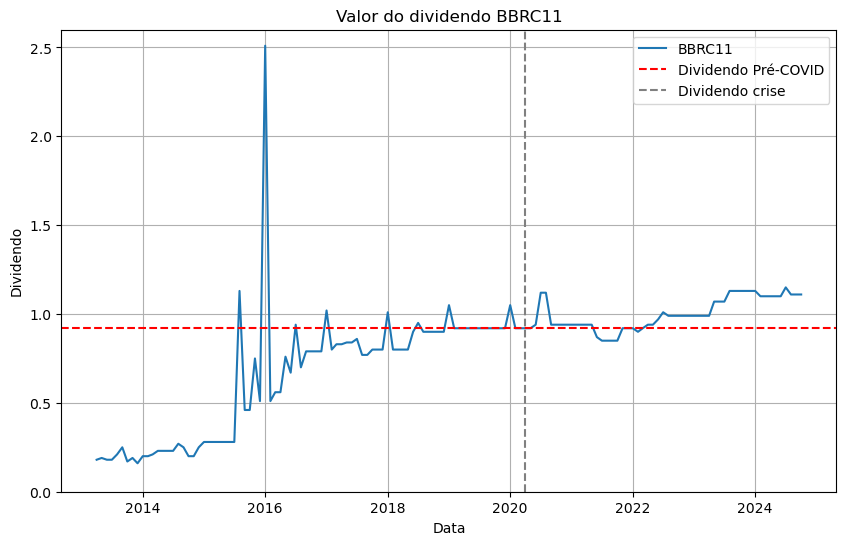

In [663]:
pre_covid_div = df_bbrc_div.loc["2020-02-01", "Dividendo"]
pico_crise_div =df_bbrc_div.loc["2020-04-01", "Dividendo"]
plt.figure(figsize=(10, 6))
plt.plot(df_bbrc_div.index, df_bbrc_div["Dividendo"], label="BBRC11")
plt.axhline(pre_covid_div, color="red", linestyle="--", label="Dividendo Pré-COVID")
plt.axvline(pd.to_datetime("2020-04-01"), color="gray", linestyle="--", label="Dividendo crise")
plt.title("Valor do dividendo BBRC11")
plt.xlabel("Data")
plt.ylabel("Dividendo")
plt.ylim(0,2.6)
plt.grid(True) 
plt.legend()
plt.show()

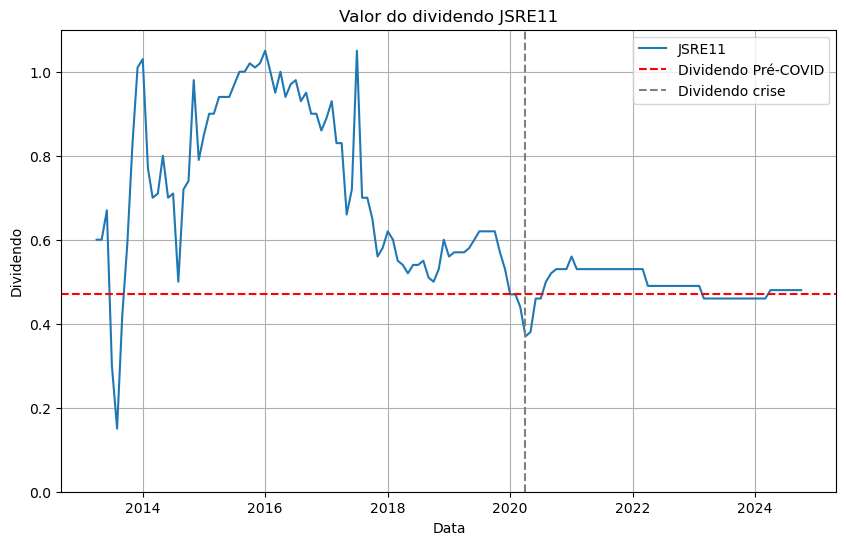

In [667]:
pre_covid_div = df_jsre_div.loc["2020-02-01", "Dividendo"]
pico_crise_div =df_jsre_div.loc["2020-04-01", "Dividendo"]
plt.figure(figsize=(10, 6))
plt.plot(df_jsre_div.index, df_jsre_div["Dividendo"], label="JSRE11")
plt.axhline(pre_covid_div, color="red", linestyle="--", label="Dividendo Pré-COVID")
plt.axvline(pd.to_datetime("2020-04-01"), color="gray", linestyle="--", label="Dividendo crise")
plt.title("Valor do dividendo JSRE11")
plt.xlabel("Data")
plt.ylabel("Dividendo")
plt.ylim(0,1.1)
plt.grid(True) 
plt.legend()
plt.show()

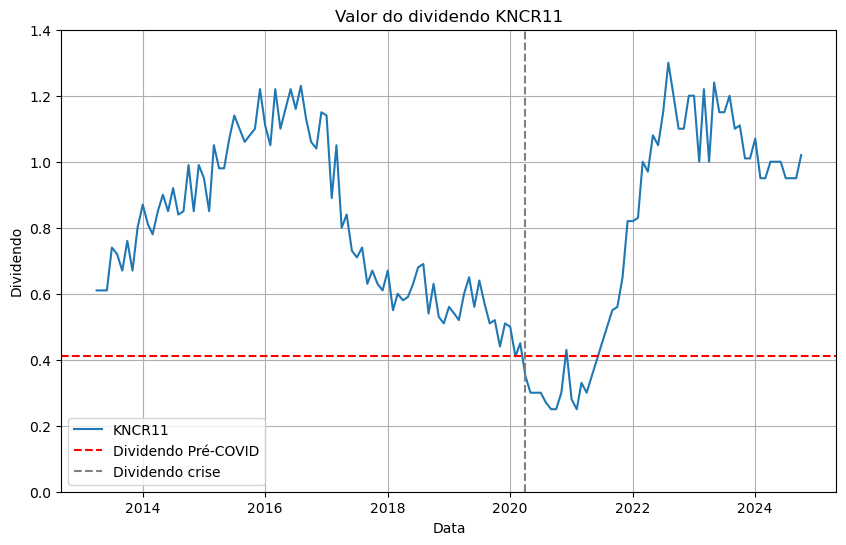

In [673]:
pre_covid_div = df_kncr_div.loc["2020-02-01", "Dividendo"]
pico_crise_div =df_kncr_div.loc["2020-04-01", "Dividendo"]
plt.figure(figsize=(10, 6))
plt.plot(df_kncr_div.index, df_kncr_div["Dividendo"], label="KNCR11")
plt.axhline(pre_covid_div, color="red", linestyle="--", label="Dividendo Pré-COVID")
plt.axvline(pd.to_datetime("2020-04-01"), color="gray", linestyle="--", label="Dividendo crise")
plt.title("Valor do dividendo KNCR11")
plt.xlabel("Data")
plt.ylabel("Dividendo")
plt.ylim(0,1.4)
plt.grid(True) 
plt.legend()
plt.show()

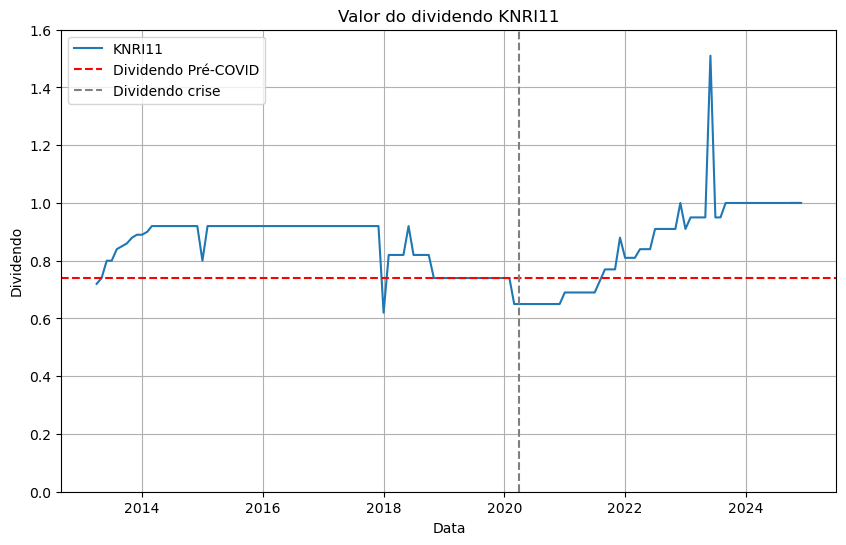

In [675]:
pre_covid_div = df_knri_div.loc["2020-02-01", "Dividendo"]
pico_crise_div =df_knri_div.loc["2020-04-01", "Dividendo"]
plt.figure(figsize=(10, 6))
plt.plot(df_knri_div.index, df_knri_div["Dividendo"], label="KNRI11")
plt.axhline(pre_covid_div, color="red", linestyle="--", label="Dividendo Pré-COVID")
plt.axvline(pd.to_datetime("2020-04-01"), color="gray", linestyle="--", label="Dividendo crise")
plt.title("Valor do dividendo KNRI11")
plt.xlabel("Data")
plt.ylabel("Dividendo")
plt.ylim(0,1.6)
plt.grid(True) 
plt.legend()
plt.show()

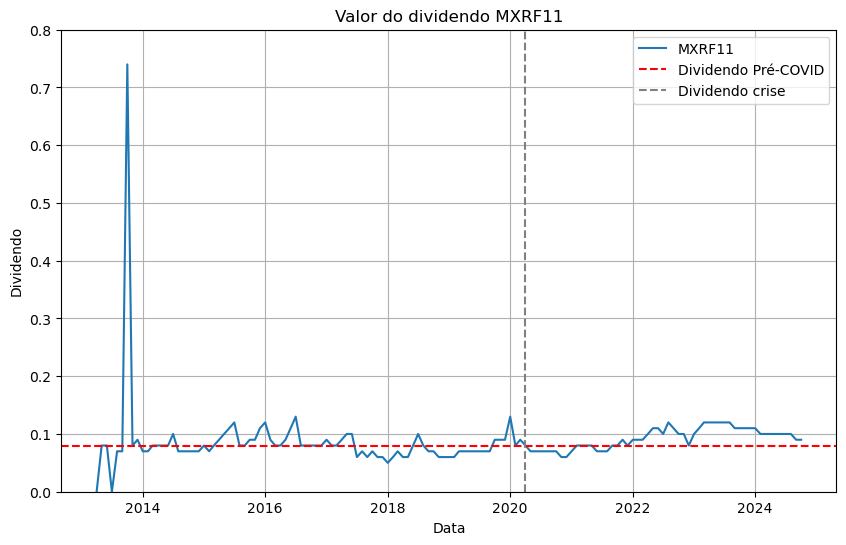

In [679]:
pre_covid_div = df_mxrf_div.loc["2020-02-01", "Dividendo"]
pico_crise_div =df_mxrf_div.loc["2020-04-01", "Dividendo"]
plt.figure(figsize=(10, 6))
plt.plot(df_mxrf_div.index, df_mxrf_div["Dividendo"], label="MXRF11")
plt.axhline(pre_covid_div, color="red", linestyle="--", label="Dividendo Pré-COVID")
plt.axvline(pd.to_datetime("2020-04-01"), color="gray", linestyle="--", label="Dividendo crise")
plt.title("Valor do dividendo MXRF11")
plt.xlabel("Data")
plt.ylabel("Dividendo")
plt.ylim(0,0.8)
plt.grid(True) 
plt.legend()
plt.show()

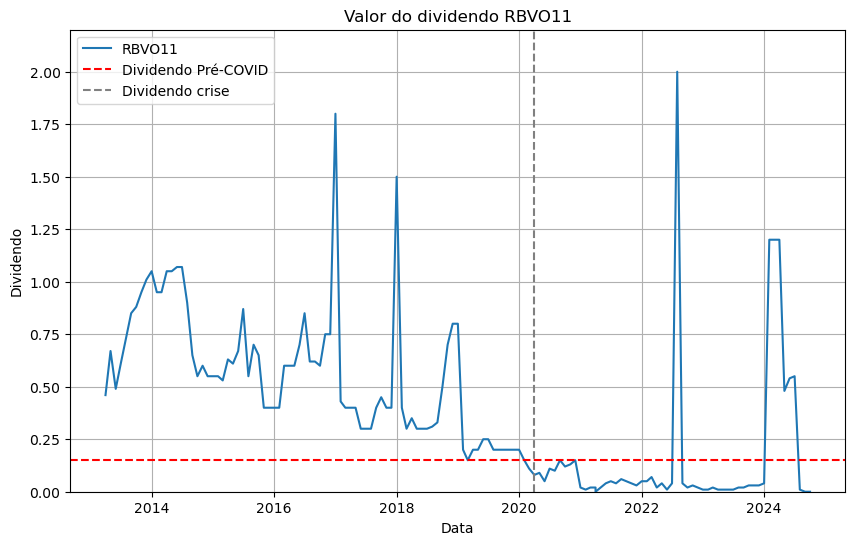

In [681]:
pre_covid_div = df_rbvo_div.loc["2020-02-01", "Dividendo"]
pico_crise_div =df_rbvo_div.loc["2020-04-01", "Dividendo"]
plt.figure(figsize=(10, 6))
plt.plot(df_rbvo_div.index, df_rbvo_div["Dividendo"], label="RBVO11")
plt.axhline(pre_covid_div, color="red", linestyle="--", label="Dividendo Pré-COVID")
plt.axvline(pd.to_datetime("2020-04-01"), color="gray", linestyle="--", label="Dividendo crise")
plt.title("Valor do dividendo RBVO11")
plt.xlabel("Data")
plt.ylabel("Dividendo")
plt.ylim(0,2.2)
plt.grid(True) 
plt.legend()
plt.show()

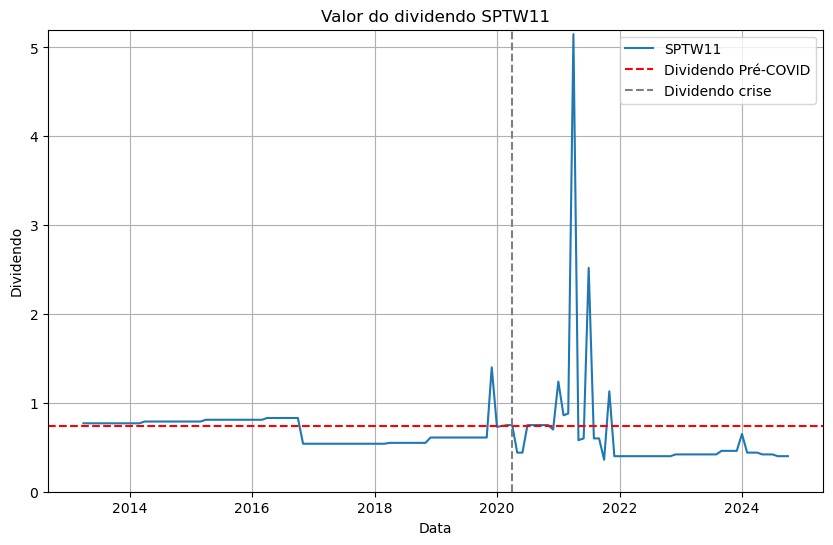

In [685]:
pre_covid_div = df_sptw_div.loc["2020-02-01", "Dividendo"]
pico_crise_div =df_sptw_div.loc["2020-04-01", "Dividendo"]
plt.figure(figsize=(10, 6))
plt.plot(df_sptw_div.index, df_sptw_div["Dividendo"], label="SPTW11")
plt.axhline(pre_covid_div, color="red", linestyle="--", label="Dividendo Pré-COVID")
plt.axvline(pd.to_datetime("2020-04-01"), color="gray", linestyle="--", label="Dividendo crise")
plt.title("Valor do dividendo SPTW11")
plt.xlabel("Data")
plt.ylabel("Dividendo")
plt.ylim(0,5.2)
plt.grid(True) 
plt.legend()
plt.show()

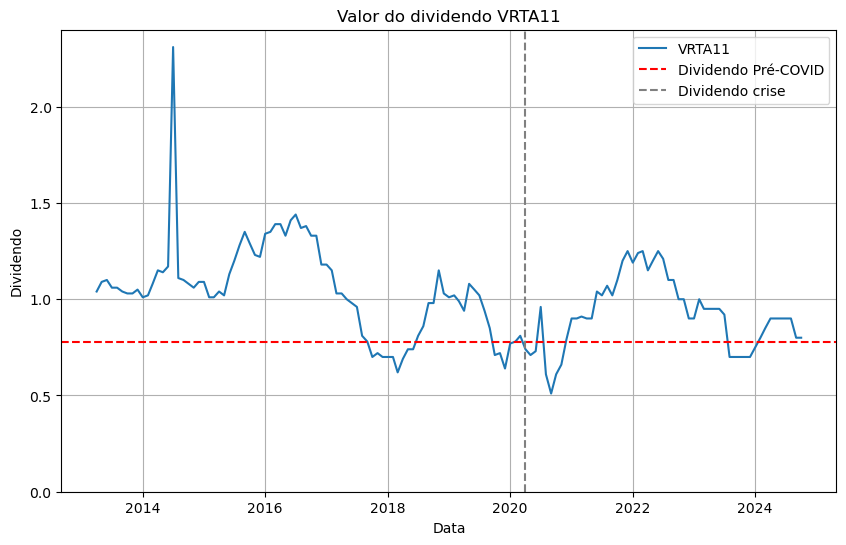

In [687]:
pre_covid_div = df_vrta_div.loc["2020-02-01", "Dividendo"]
pico_crise_div =df_vrta_div.loc["2020-04-01", "Dividendo"]
plt.figure(figsize=(10, 6))
plt.plot(df_vrta_div.index, df_vrta_div["Dividendo"], label="VRTA11")
plt.axhline(pre_covid_div, color="red", linestyle="--", label="Dividendo Pré-COVID")
plt.axvline(pd.to_datetime("2020-04-01"), color="gray", linestyle="--", label="Dividendo crise")
plt.title("Valor do dividendo VRTA11")
plt.xlabel("Data")
plt.ylabel("Dividendo")
plt.ylim(0,2.4)
plt.grid(True) 
plt.legend()
plt.show()

## Análise

## Análises

# teste

In [299]:
precos = df_bbrc["Ultimo"]
pico_acumulado = precos.cummax()

drawdown_diario = (precos - pico_acumulado) / pico_acumulado

drawdown_maximo = drawdown_diario.min()
print(f"Drawdown Máximo: {drawdown_maximo:.2%}")

Drawdown Máximo: -53.27%


Mostra a maior queda que um investidor teria enfrentado mantendo o ativo.

Quanto menor o drawdown máximo, menor o risco de grandes perdas em eventos extremos.